In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

%load_ext autoreload
%autoreload 2
import preprocessing
import models

In [2]:
# Suppress all warnings globally (adjust based on specific warnings you want to ignore)
# Suppress convergence warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Suppress user warnings (such as inappropriate l1_ratio usage)
warnings.filterwarnings('ignore', category=UserWarning)
#warnings.filterwarnings("ignore", message=".*l1_ratio parameter is only used when penalty is 'elasticnet'")

In [3]:

# Example usage:
param_grid_rf = {
    'n_estimators': [100, 500, 1000, 5000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

In [4]:
CNA_file = '/Users/irf3irf3/Desktop/offline_workspace/Jessica/Jessica_Model code & inputs/CNA_no_trim_low_1Mb_irf.tsv'
Ratio_file = '/Users/irf3irf3/Desktop/offline_workspace/Jessica/Jessica_Model code & inputs/ratios_150_ratio.centered_irf.tsv' ## for non serial files
EndMotif_file_with_rest_5 = '/Users/irf3irf3/Desktop/offline_workspace/data/tissue_of_origin/EndMotif_frequency_withRest5.txt'
EndMotif_file = '/Users/irf3irf3/Desktop/offline_workspace/data/tissue_of_origin/Not Normalized/EndMotif_frequency_ALL.txt'
Output_dir = '/Users/irf3irf3/Desktop/offline_workspace/data/tissue_of_origin/ML_output_dissertation'

CNA = pd.read_csv(CNA_file, sep='\t', index_col=[0,1,2])
Ratio = pd.read_csv(Ratio_file, sep='\t', index_col=[0,1,2])
EndMotif = pd.read_csv(EndMotif_file, sep='\t', index_col=0)

Endmotif_file_with_rest5_df = pd.read_csv(EndMotif_file_with_rest_5, sep='\t', index_col=0)




print(f'before filtering {EndMotif.shape}')
# Filter the columns in the first file
EndMotif = EndMotif[Endmotif_file_with_rest5_df.columns]

print(f'after filtering {EndMotif.shape}')





display(CNA.head())
display(Ratio.head())
display(EndMotif.head())

before filtering (256, 243)
after filtering (256, 204)


58        73        74        81        83  \
chr  start    end                                                          
chr1 3000001  4000000        NaN       NaN       NaN       NaN       NaN   
     4000001  5000000   0.015625  2.151004  0.015625  0.015625  0.922560   
     5000001  6000000   0.105375  1.091101       inf  0.015625  1.740708   
     7000001  8000000   4.207382  2.421009       inf  0.869690  4.901697   
     14000001 15000000  0.061670  2.455380  0.015625  0.015625  2.733544   

                        BC001_UC1  BC002_UC1  BC003_UC1  BC004_UC1  BC005_UC1  \
chr  start    end                                                               
chr1 3000001  4000000         NaN        NaN        NaN        NaN        NaN   
     4000001  5000000    4.682815   1.686778   0.015625   0.015625   0.015625   
     5000001  6000000    4.739285   1.708846   0.015625   0.015625        inf   
     7000001  8000000    6.268193   2.516174   2.773132   4.300194        inf   
     14000001 15000000   2.639199   1.129221   1.580682   1.073177   0.015625   

                        ...  WBC1324_UC1  WBC1324_UC2  WBC1324_UC3  \
chr  start    end       ...                                          
chr1 3000001  4000000   ...          NaN          NaN          NaN   
     4000001  5000000   ...     0.015625     0.374554     2.153216   
     5000001  6000000   ...     1.199363     0.681652     2.152142   
     7000001  8000000   ...     4.955670     1.415199     2.571430   
     14000001 15000000  ...     0.015625     0.449969     1.554665   

                        WBC1324_UC4  WBC1324_UC5  WBC1325_UC2  WBC1325_UC3  \
chr  start    end                                                            
chr1 3000001  4000000           NaN          NaN          NaN          NaN   
     4000001  5000000      0.015625     0.015625     0.015625     0.015625   
     5000001  6000000      0.258161     0.015625     1.050342     0.015625   
     7000001  8000000      2.628545     2.723716     2.605381     4.064862   
     14000001 15000000     0.015625     0.251518     2.169661     0.246217   

                        WBC1325_UC4  WBC1325_UC5  WBC1325_UC5b  
chr  start    end                                               
chr1 3000001  4000000           NaN          NaN           NaN  
     4000001  5000000      1.067131     0.015625      0.015625  
     5000001  6000000      0.892972     0.015625      0.019046  
     7000001  8000000      3.416386     2.808183      1.777171  
     14000001 15000000     0.360449     4.636063      2.102079  

[5 rows x 242 columns]

58        73        74        81        83  \
chr  start    end                                                          
chr1 5000000  10000000 -0.021039  0.051770  0.035062  0.028886 -0.033048   
     10000000 15000000 -0.019367  0.024914  0.033907  0.018559 -0.037325   
     15000000 20000000 -0.030353  0.036842  0.021390  0.021573 -0.048439   
     20000000 25000000 -0.020654  0.059739  0.031846  0.024240 -0.041196   
     25000000 30000000 -0.020983  0.026992  0.014885  0.020358 -0.034455   

                        BC001_UC1  BC002_UC1  BC003_UC1     BC004_UC1  \
chr  start    end                                                       
chr1 5000000  10000000   0.001773   0.021462   0.012149  1.277114e-02   
     10000000 15000000   0.005899   0.015108   0.011341  1.282568e-02   
     15000000 20000000   0.001090   0.008654  -0.002082 -5.997953e-03   
     20000000 25000000   0.004013   0.012817   0.010174  6.564354e-03   
     25000000 30000000   0.009259   0.015607   0.011452 -9.560000e-07   

                        BC005_UC1  ...  WBC1324_UC1  WBC1324_UC2  WBC1324_UC3  \
chr  start    end                  ...                                          
chr1 5000000  10000000   0.034097  ...     0.019924    -0.025483     0.037087   
     10000000 15000000   0.033062  ...     0.014763    -0.009470     0.025152   
     15000000 20000000   0.006861  ...     0.006242    -0.033472     0.021073   
     20000000 25000000   0.037555  ...     0.015166    -0.022688     0.030645   
     25000000 30000000   0.028230  ...     0.018853    -0.015850     0.025356   

                        WBC1324_UC4  WBC1324_UC5  WBC1325_UC2  WBC1325_UC3  \
chr  start    end                                                            
chr1 5000000  10000000    -0.020098    -0.003235     0.014730     0.046827   
     10000000 15000000    -0.027964    -0.008776     0.009590     0.036753   
     15000000 20000000    -0.034212    -0.015775     0.009115     0.036248   
     20000000 25000000    -0.019502    -0.008385     0.011670     0.040518   
     25000000 30000000    -0.009840    -0.009665     0.010743     0.042024   

                        WBC1325_UC4  WBC1325_UC5  WBC1325_UC5b  
chr  start    end                                               
chr1 5000000  10000000     0.037673     0.094724      0.021397  
     10000000 15000000     0.032190     0.073988     -0.000120  
     15000000 20000000     0.028780     0.097517      0.001499  
     20000000 25000000     0.027899     0.096164      0.014928  
     25000000 30000000     0.030353     0.093724      0.017164  

[5 rows x 241 columns]

,WBC1116_UC1_motifs.txt,WBC1207_UC1_motifs.txt,WBC1135_UC1_motifs.txt,WBC1198_UC1_motifs.txt,WBC1202_UC1_motifs.txt,PB-278_UC1_sorted_motifs.txt,PB046_UC1_sorted_motifs.txt,NU90_sorted_motifs.txt,RCC013_UC1_sorted_motifs.txt,NU71_sorted_motifs.txt,...,WBC1222_UC1.dup_mk_motifs.txt,BC020_UC1.dup_mk_motifs.txt,WBC1196_UC1.dup_mk_motifs.txt,WBC1111_UC1.dup_mk_motifs.txt,WBC1188_UC1.dup_mk_motifs.txt,BC016_UC1.dup_mk_motifs.txt,WBC1309_UC1.dup_mk_motifs.txt,WBC1304_UC1.dup_mk_motifs.txt,WBC1322_UC1.dup_mk_motifs.txt,BC011_UC1.dup_mk_motifs.txt
AAAA,1363822,1649522,1477007,1699021,220132,1697863,2047129,2053065,1694213,1874416,...,3387457,4008682,4443565,3525488,3312042,5670317,3231885,3880230,7808827,3840687
AAAC,442016,492222,505023,516155,62552,558742,655722,645064,545181,612951,...,764229,1109904,1278700,1011524,950838,1407264,1012539,1127552,2241726,1107479
AAAG,554817,629741,641695,672116,81528,718290,842404,823364,722142,799007,...,982137,1451558,1638985,1288801,1283328,1895845,1325801,1488290,2918270,1468987
AAAT,739560,808725,801612,888519,110969,1002696,1147014,1098857,917790,1075842,...,1085110,1954151,2228700,1779818,1614284,2389220,1755192,1912909,3622751,1674478
AACA,488506,547214,567452,562754,69428,640921,759313,711681,622732,684254,...,935029,1242647,1491640,1197716,1126611,1728622,1152911,1377830,2690625,1398048


In [5]:
EndMotif.columns = EndMotif.columns.str.replace('_sorted_motifs.txt', '')
EndMotif.columns = EndMotif.columns.str.replace('.dup_mk_motifs.txt', '')
EndMotif.columns = EndMotif.columns.str.replace('_motifs.txt', '')
display(EndMotif.head())

,WBC1116_UC1,WBC1207_UC1,WBC1135_UC1,WBC1198_UC1,WBC1202_UC1,PB-278_UC1,PB046_UC1,NU90,RCC013_UC1,NU71,...,WBC1222_UC1,BC020_UC1,WBC1196_UC1,WBC1111_UC1,WBC1188_UC1,BC016_UC1,WBC1309_UC1,WBC1304_UC1,WBC1322_UC1,BC011_UC1
AAAA,1363822,1649522,1477007,1699021,220132,1697863,2047129,2053065,1694213,1874416,...,3387457,4008682,4443565,3525488,3312042,5670317,3231885,3880230,7808827,3840687
AAAC,442016,492222,505023,516155,62552,558742,655722,645064,545181,612951,...,764229,1109904,1278700,1011524,950838,1407264,1012539,1127552,2241726,1107479
AAAG,554817,629741,641695,672116,81528,718290,842404,823364,722142,799007,...,982137,1451558,1638985,1288801,1283328,1895845,1325801,1488290,2918270,1468987
AAAT,739560,808725,801612,888519,110969,1002696,1147014,1098857,917790,1075842,...,1085110,1954151,2228700,1779818,1614284,2389220,1755192,1912909,3622751,1674478
AACA,488506,547214,567452,562754,69428,640921,759313,711681,622732,684254,...,935029,1242647,1491640,1197716,1126611,1728622,1152911,1377830,2690625,1398048


In [6]:
# Step 1: Find common columns
common_columns = set(EndMotif.columns) & set(CNA.columns) & set(Ratio.columns)
common_columns_list = list(common_columns)  # Convert to list

# Step 2: Find non-common columns
non_common_endmotif = set(EndMotif.columns) - common_columns
non_common_cna = set(CNA.columns) - common_columns
non_common_ratio = set(Ratio.columns) - common_columns

# Print non-common columns
print("Non-common columns in EndMotif:", non_common_endmotif)
print("Non-common columns in CNA:", non_common_cna)
print("Non-common columns in Ratio:", non_common_ratio)

# Step 3: Filter DataFrames to keep only common columns
EndMotif = EndMotif[common_columns_list]
CNA = CNA[common_columns_list]
Ratio = Ratio[common_columns_list]


print(CNA.shape)
display(CNA.head())

print(Ratio.shape)
display(Ratio.head())

print(EndMotif.shape)
display(EndMotif.head())

Non-common columns in EndMotif: {'WBC1291_UC1'}
Non-common columns in CNA: {'WBC1317_UC3', 'WBC1320_UC1b', 'WBC1291_UC1', 'NU19R_UC1', 'WBC1322_UC4', 'WBC1045_UC2', 'NU70_UC1', 'WBC1050_UC2', 'WBC1045_UC3', 'WBC1050_UC3', 'WBC1320_UC2', 'WBC1325_UC5b', 'WBC1317_UC2', 'NU18_UC1', 'WBC1325_UC3', 'WBC1325_UC4', 'NU68_UC1', 'NU36_UC1', 'NU71_UC1', 'WBC1325_UC2', 'NU16_UC1', 'WBC1317_UC4', 'WBC1324_UC4', 'WBC1320_UC5', 'NU32_UC1', 'WBC1320_UC3', 'WBC1322_UC2', 'NU19_UC1', 'WBC1325_UC5', 'NU33_UC1', 'WBC1324_UC5', 'NU3_UC1', 'NU75_UC1', 'NU1_UC1', 'WBC1320_UC4', 'WBC1322_UC5', 'WBC1322_UC3', 'WBC1324_UC2', 'WBC1324_UC3'}
Non-common columns in Ratio: {'WBC1317_UC3', 'WBC1320_UC1b', 'NU19R_UC1', 'WBC1322_UC4', 'WBC1045_UC2', 'NU70_UC1', 'WBC1050_UC2', 'WBC1045_UC3', 'WBC1050_UC3', 'WBC1320_UC2', 'WBC1325_UC5b', 'WBC1317_UC2', 'NU18_UC1', 'WBC1325_UC3', 'WBC1325_UC4', 'NU68_UC1', 'NU36_UC1', 'NU71_UC1', 'WBC1325_UC2', 'NU16_UC1', 'WBC1317_UC4', 'WBC1324_UC4', 'WBC1320_UC5', 'NU32_UC1', 'WBC1320

WBC1064_UC1  RCC008_UC2  RCC013_UC2  BC018_UC1  \
chr  start    end                                                        
chr1 3000001  4000000           NaN         NaN         NaN        NaN   
     4000001  5000000      0.015625         inf    0.015625   1.613066   
     5000001  6000000      0.015625         inf    0.015625   1.746262   
     7000001  8000000           inf         inf         inf   1.860410   
     14000001 15000000     0.015625    0.015625    0.015625   1.778985   

                        WBC1104_UC1  WBC1313_UC1  WBC1265_UC1  RCC008_UC1  \
chr  start    end                                                           
chr1 3000001  4000000           NaN          NaN          NaN         NaN   
     4000001  5000000      0.015625     1.524870     1.866272    0.189716   
     5000001  6000000           inf     1.566301     2.153510    1.019177   
     7000001  8000000           inf     1.752591     2.639690    2.510366   
     14000001 15000000     0.015625     1.126022     1.980917    1.225165   

                        RCC010_UC2  PB242_UC1  ...  BC003_UC1      NU90  \
chr  start    end                              ...                        
chr1 3000001  4000000          NaN        NaN  ...        NaN       NaN   
     4000001  5000000     4.302758  16.948120  ...   0.015625  0.015625   
     5000001  6000000     3.685390  16.609928  ...   0.015625  0.559019   
     7000001  8000000     6.853631  14.649429  ...   2.773132  5.381004   
     14000001 15000000    0.451385   7.421583  ...   1.580682  0.015625   

                        PB-209_UC1  PB-177_UC1      NU97       NU3  \
chr  start    end                                                    
chr1 3000001  4000000          NaN         NaN       NaN       NaN   
     4000001  5000000     1.801950    0.015625  0.015625  0.015625   
     5000001  6000000     3.749663    0.015625  0.015625  0.015625   
     7000001  8000000     7.282242    3.042685  0.015625  3.303140   
     14000001 15000000    0.015625    0.015625  0.015625  1.306753   

                        WBC1071_UC1  WBC1111_UC1  PB266_UC1  BC004_UC1  
chr  start    end                                                       
chr1 3000001  4000000           NaN          NaN        NaN        NaN  
     4000001  5000000      2.004163     0.473061   0.015625   0.015625  
     5000001  6000000      2.075005     1.816513   0.015625   0.015625  
     7000001  8000000      2.160071     3.680796   3.355959   4.300194  
     14000001 15000000     2.094665     1.680183   1.541759   1.073177  

[5 rows x 203 columns]

(312, 203)


WBC1064_UC1  RCC008_UC2  RCC013_UC2  BC018_UC1  \
chr  start    end                                                        
chr1 5000000  10000000    -0.035289    0.023725    0.013904  -0.011214   
     10000000 15000000    -0.036990    0.024973    0.007824  -0.012229   
     15000000 20000000    -0.050989    0.013154    0.005323  -0.027360   
     20000000 25000000    -0.036880    0.014681    0.008538  -0.012294   
     25000000 30000000    -0.032808    0.015031   -0.003054  -0.007486   

                        WBC1104_UC1  WBC1313_UC1  WBC1265_UC1  RCC008_UC1  \
chr  start    end                                                           
chr1 5000000  10000000    -0.004462    -0.017025     0.017310   -0.002426   
     10000000 15000000    -0.017276    -0.011186     0.014825   -0.008487   
     15000000 20000000    -0.021416    -0.021590     0.014735   -0.019291   
     20000000 25000000    -0.004270    -0.008415     0.015632   -0.006435   
     25000000 30000000    -0.004069    -0.005249     0.024288   -0.008693   

                        RCC010_UC2  PB242_UC1  ...  BC003_UC1      NU90  \
chr  start    end                              ...                        
chr1 5000000  10000000    0.048503  -0.003297  ...   0.012149  0.022068   
     10000000 15000000    0.040256  -0.014764  ...   0.011341  0.013985   
     15000000 20000000    0.044215  -0.018648  ...  -0.002082  0.018577   
     20000000 25000000    0.037734   0.001088  ...   0.010174  0.016142   
     25000000 30000000    0.028129   0.015535  ...   0.011452  0.016110   

                        PB-209_UC1  PB-177_UC1      NU97       NU3  \
chr  start    end                                                    
chr1 5000000  10000000    0.007399   -0.003572  0.064435 -0.011802   
     10000000 15000000    0.007978   -0.000221  0.070660 -0.011381   
     15000000 20000000    0.005013   -0.021748  0.078783 -0.020040   
     20000000 25000000    0.006133   -0.013685  0.090739 -0.013185   
     25000000 30000000    0.007966   -0.031045  0.143551 -0.013654   

                        WBC1071_UC1  WBC1111_UC1  PB266_UC1     BC004_UC1  
chr  start    end                                                          
chr1 5000000  10000000    -0.004340    -0.021695  -0.000915  1.277114e-02  
     10000000 15000000    -0.007247    -0.023782   0.000148  1.282568e-02  
     15000000 20000000    -0.011129    -0.043571  -0.018731 -5.997953e-03  
     20000000 25000000    -0.005068    -0.007940  -0.006099  6.564354e-03  
     25000000 30000000    -0.003272    -0.023933  -0.007333 -9.560000e-07  

[5 rows x 203 columns]

(256, 203)


,WBC1064_UC1,RCC008_UC2,RCC013_UC2,BC018_UC1,WBC1104_UC1,WBC1313_UC1,WBC1265_UC1,RCC008_UC1,RCC010_UC2,PB242_UC1,...,BC003_UC1,NU90,PB-209_UC1,PB-177_UC1,NU97,NU3,WBC1071_UC1,WBC1111_UC1,PB266_UC1,BC004_UC1
AAAA,3404669,1831324,2157425,1788067,1821260,5442866,1146576,2079323,1922726,2387192,...,2215453,2053065,2110892,1947737,6615373,1872509,3261082,3525488,2145775,2194241
AAAC,1030906,635665,639663,571948,577940,1716645,359311,610138,626578,785988,...,656513,645064,637991,544819,1960903,590649,1042303,1011524,654382,599598
AAAG,1379669,807647,866374,729599,744805,2350170,464958,821480,832785,1025115,...,889613,823364,856263,700790,2625731,758111,1326265,1288801,853723,787765
AAAT,1799128,1043739,1083959,963953,942990,3089527,614003,1051902,1057685,1299429,...,1125191,1098857,1145846,934512,3387300,1039669,1602631,1779818,1157126,1050821
AACA,1182564,754719,725643,656107,660068,1868176,410304,697591,769336,933265,...,741675,711681,700797,639070,2205793,654767,1104645,1197716,732909,667928


In [7]:
# Sort the common columns list alphabetically
common_columns_list = sorted(list(common_columns))

# Reassign the DataFrames using the sorted common columns list
EndMotif = EndMotif[common_columns_list]
CNA = CNA[common_columns_list]
Ratio = Ratio[common_columns_list]


print(CNA.shape)
display(CNA.head())

print(Ratio.shape)
display(Ratio.head())

print(EndMotif.shape)
display(EndMotif.head())

(1352, 203)


58        73        74        81        83  \
chr  start    end                                                          
chr1 3000001  4000000        NaN       NaN       NaN       NaN       NaN   
     4000001  5000000   0.015625  2.151004  0.015625  0.015625  0.922560   
     5000001  6000000   0.105375  1.091101       inf  0.015625  1.740708   
     7000001  8000000   4.207382  2.421009       inf  0.869690  4.901697   
     14000001 15000000  0.061670  2.455380  0.015625  0.015625  2.733544   

                        BC001_UC1  BC002_UC1  BC003_UC1  BC004_UC1  BC005_UC1  \
chr  start    end                                                               
chr1 3000001  4000000         NaN        NaN        NaN        NaN        NaN   
     4000001  5000000    4.682815   1.686778   0.015625   0.015625   0.015625   
     5000001  6000000    4.739285   1.708846   0.015625   0.015625        inf   
     7000001  8000000    6.268193   2.516174   2.773132   4.300194        inf   
     14000001 15000000   2.639199   1.129221   1.580682   1.073177   0.015625   

                        ...  WBC1310_UC1  WBC1311_UC1  WBC1312_UC1  \
chr  start    end       ...                                          
chr1 3000001  4000000   ...          NaN          NaN          NaN   
     4000001  5000000   ...     2.145869     0.015625     2.539834   
     5000001  6000000   ...     2.208658     0.015625     2.917542   
     7000001  8000000   ...     2.643738          inf     7.692731   
     14000001 15000000  ...     1.782044     0.015625     0.015625   

                        WBC1313_UC1  WBC1314_UC1  WBC1315_UC1  WBC1317_UC1  \
chr  start    end                                                            
chr1 3000001  4000000           NaN          NaN          NaN          NaN   
     4000001  5000000      1.524870     7.162511     1.771867     1.382492   
     5000001  6000000      1.566301     6.742773     1.839251     1.392199   
     7000001  8000000      1.752591    10.071579     2.570771     2.711366   
     14000001 15000000     1.126022     1.472195     1.861022     0.966995   

                        WBC1320_UC1  WBC1322_UC1  WBC1324_UC1  
chr  start    end                                              
chr1 3000001  4000000           NaN          NaN          NaN  
     4000001  5000000           inf     0.784409     0.015625  
     5000001  6000000           inf     1.083908     1.199363  
     7000001  8000000           inf     1.571305     4.955670  
     14000001 15000000     0.015625     0.648787     0.015625  

[5 rows x 203 columns]

(312, 203)


58        73        74        81        83  \
chr  start    end                                                          
chr1 5000000  10000000 -0.021039  0.051770  0.035062  0.028886 -0.033048   
     10000000 15000000 -0.019367  0.024914  0.033907  0.018559 -0.037325   
     15000000 20000000 -0.030353  0.036842  0.021390  0.021573 -0.048439   
     20000000 25000000 -0.020654  0.059739  0.031846  0.024240 -0.041196   
     25000000 30000000 -0.020983  0.026992  0.014885  0.020358 -0.034455   

                        BC001_UC1  BC002_UC1  BC003_UC1     BC004_UC1  \
chr  start    end                                                       
chr1 5000000  10000000   0.001773   0.021462   0.012149  1.277114e-02   
     10000000 15000000   0.005899   0.015108   0.011341  1.282568e-02   
     15000000 20000000   0.001090   0.008654  -0.002082 -5.997953e-03   
     20000000 25000000   0.004013   0.012817   0.010174  6.564354e-03   
     25000000 30000000   0.009259   0.015607   0.011452 -9.560000e-07   

                        BC005_UC1  ...  WBC1310_UC1  WBC1311_UC1  WBC1312_UC1  \
chr  start    end                  ...                                          
chr1 5000000  10000000   0.034097  ...     0.028533     0.018560    -0.011622   
     10000000 15000000   0.033062  ...     0.023055     0.014002    -0.003107   
     15000000 20000000   0.006861  ...     0.014475    -0.006208    -0.013992   
     20000000 25000000   0.037555  ...     0.025398     0.018111    -0.005459   
     25000000 30000000   0.028230  ...     0.024660     0.006256    -0.014720   

                        WBC1313_UC1  WBC1314_UC1  WBC1315_UC1  WBC1317_UC1  \
chr  start    end                                                            
chr1 5000000  10000000    -0.017025     0.003578     0.073420     0.030748   
     10000000 15000000    -0.011186     0.004146     0.069920     0.022014   
     15000000 20000000    -0.021590     0.000763     0.055114     0.016451   
     20000000 25000000    -0.008415     0.002161     0.073577     0.025016   
     25000000 30000000    -0.005249     0.009170     0.026160     0.028319   

                        WBC1320_UC1  WBC1322_UC1  WBC1324_UC1  
chr  start    end                                              
chr1 5000000  10000000     0.045943    -0.048431     0.019924  
     10000000 15000000     0.039728    -0.045393     0.014763  
     15000000 20000000     0.024183    -0.079331     0.006242  
     20000000 25000000     0.031184    -0.048032     0.015166  
     25000000 30000000     0.049296    -0.058022     0.018853  

[5 rows x 203 columns]

(256, 203)


,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1310_UC1,WBC1311_UC1,WBC1312_UC1,WBC1313_UC1,WBC1314_UC1,WBC1315_UC1,WBC1317_UC1,WBC1320_UC1,WBC1322_UC1,WBC1324_UC1
AAAA,1773406,1587091,1887836,1692740,1351234,1947498,1772534,2215453,2194241,4373856,...,3404578,6396863,4114169,5442866,3373010,1828537,4126103,5080512,7808827,2200138
AAAC,560709,501785,517189,515721,594904,659277,549197,656513,599598,1203850,...,999934,1733476,1228579,1716645,1083556,505765,1241514,1593973,2241726,698165
AAAG,736759,646249,692175,676333,723339,901326,734643,889613,787765,1533031,...,1283426,2209077,1541324,2350170,1455933,709674,1592712,2130402,2918270,972379
AAAT,986962,828327,885726,885751,1042110,1137365,912342,1125191,1050821,2079990,...,1679510,2942472,2032709,3089527,1818640,888758,2121078,2802885,3622751,1220497
AACA,628611,613356,590285,618050,629813,721027,615778,741675,667928,1472676,...,1167888,2110289,1435625,1868176,1187004,606221,1417487,1959415,2690625,750111


In [8]:
CNA_t  = preprocessing.preprocess_dataframe(CNA)
display(CNA_t.head(n=10))

chr          chr1                                                              \
start     3000001   4000001   5000001   7000001  14000001  17000001  18000001   
end       4000000   5000000   6000000   8000000  15000000  18000000  19000000   
58            NaN  0.015625  0.105375  4.207382  0.061670  0.015625  2.352325   
73            NaN  2.151004  1.091101  2.421009  2.455380  0.015625  0.015625   
74            NaN  0.015625       inf       inf  0.015625  0.015625       inf   
81            NaN  0.015625  0.015625  0.869690  0.015625  0.015625  0.015625   
83            NaN  0.922560  1.740708  4.901697  2.733544  0.015625  3.825098   
BC001_UC1     NaN  4.682815  4.739285  6.268193  2.639199  0.015625  2.177672   
BC002_UC1     NaN  1.686778  1.708846  2.516174  1.129221  0.015625  1.468900   
BC003_UC1     NaN  0.015625  0.015625  2.773132  1.580682  0.015625  0.098665   
BC004_UC1     NaN  0.015625  0.015625  4.300194  1.073177  0.015625  0.631417   
BC005_UC1     NaN  0.015625       inf       inf  0.015625  0.015625       inf   

chr                                     ...      chr9                      \
start      22000001 29000001  33000001  ... 123000001 124000001 126000001   
end        23000000 30000000  34000000  ... 124000000 125000000 127000000   
58         4.258621      NaN  2.742873  ...  2.520066  3.618625  3.614009   
73         0.015625      NaN  0.986117  ...  6.304718  5.515289  0.835260   
74              inf      NaN  0.015625  ...  0.015625       inf       inf   
81         0.351419      NaN  0.387245  ...  3.450159  3.992970  1.442585   
83         2.934842      NaN  4.816821  ...  2.806672  2.242043  2.838691   
BC001_UC1  3.568086      NaN  1.417457  ...  0.388875  1.823752  1.979704   
BC002_UC1  1.883352      NaN  1.726733  ...  1.430656  1.735158  1.771016   
BC003_UC1  1.689060      NaN  2.088575  ...  3.645189  4.064631  1.577402   
BC004_UC1  3.118153      NaN  2.297596  ...  1.448075  4.423699  1.675844   
BC005_UC1       inf      NaN       inf  ...  0.015625       inf       inf   

chr                                                                     \
start      127000001 132000001 133000001 134000001 135000001 136000001   
end        128000000 133000000 134000000 135000000 136000000 137000000   
58          6.924299  3.863697  0.015625       NaN  4.534116       NaN   
73         12.289532  5.456690  0.015625       NaN  3.823995       NaN   
74               inf       inf  0.015625       NaN       inf       NaN   
81          5.506857  2.193202  0.015625       NaN  2.874923       NaN   
83          6.670038  3.815812  0.015625       NaN  3.422317       NaN   
BC001_UC1   3.531405  1.437824  0.015625       NaN  2.774121       NaN   
BC002_UC1   2.120234  1.756240  0.015625       NaN  1.636460       NaN   
BC003_UC1   6.360148  3.012500  0.015625       NaN  4.442390       NaN   
BC004_UC1   5.587627  3.006049  0.015625       NaN  2.577370       NaN   
BC005_UC1        inf       inf  0.015625       NaN       inf       NaN   

chr         target  
start               
end                 
58         Healthy  
73         Healthy  
74         Healthy  
81         Healthy  
83         Healthy  
BC001_UC1  Bladder  
BC002_UC1  Bladder  
BC003_UC1  Bladder  
BC004_UC1  Bladder  
BC005_UC1  Bladder  

[10 rows x 1353 columns]

In [9]:
Ratio_t = preprocessing.preprocess_dataframe(Ratio)
display(Ratio_t.head(n=10))

chr            chr1                                                        \
start       5000000  10000000  15000000  20000000      25000000  30000000   
end        10000000  15000000  20000000  25000000      30000000  35000000   
58        -0.021039 -0.019367 -0.030353 -0.020654 -2.098302e-02 -0.011688   
73         0.051770  0.024914  0.036842  0.059739  2.699196e-02  0.059263   
74         0.035062  0.033907  0.021390  0.031846  1.488474e-02  0.024985   
81         0.028886  0.018559  0.021573  0.024240  2.035761e-02  0.019593   
83        -0.033048 -0.037325 -0.048439 -0.041196 -3.445464e-02 -0.029842   
BC001_UC1  0.001773  0.005899  0.001090  0.004013  9.259055e-03  0.001114   
BC002_UC1  0.021462  0.015108  0.008654  0.012817  1.560669e-02  0.012384   
BC003_UC1  0.012149  0.011341 -0.002082  0.010174  1.145213e-02  0.013576   
BC004_UC1  0.012771  0.012826 -0.005998  0.006564 -9.560000e-07  0.023310   
BC005_UC1  0.034097  0.033062  0.006861  0.037555  2.822959e-02  0.034255   

chr                                                ...      chr9            \
start      35000000  40000000  45000000  50000000  ...  20000000  25000000   
end        40000000  45000000  50000000  55000000  ...  25000000  30000000   
58        -0.010893 -0.020116 -0.014497 -0.018139  ...  0.015006  0.011725   
73         0.024624  0.042534  0.010221  0.001072  ... -0.033648 -0.036388   
74         0.018009  0.017431 -0.009482  0.005712  ... -0.021091 -0.019005   
81         0.003843  0.012119 -0.009127 -0.012554  ...  0.001900 -0.002607   
83        -0.020518 -0.021768 -0.022954 -0.017482  ...  0.017985  0.019683   
BC001_UC1  0.003944  0.005430  0.000056  0.004991  ... -0.005370 -0.001673   
BC002_UC1  0.007988  0.005751 -0.003250  0.005263  ... -0.010184 -0.021263   
BC003_UC1  0.013175  0.001322 -0.010533  0.000986  ... -0.006689 -0.005413   
BC004_UC1  0.013885 -0.000274 -0.006900 -0.000430  ... -0.011044 -0.004128   
BC005_UC1  0.016869  0.017036 -0.006845  0.018240  ... -0.014738 -0.009885   

chr                                                                    \
start      90000000  95000000 100000000 110000000 115000000 120000000   
end        95000000 100000000 105000000 115000000 120000000 125000000   
58        -0.009685 -0.017064  0.015936 -0.017214  0.002501 -0.012768   
73         0.038446 -0.007840 -0.057904  0.039415  0.014236 -0.000344   
74        -0.005667  0.010702 -0.020067  0.003183  0.008317  0.014109   
81         0.014636 -0.013138 -0.011739  0.010163 -0.009431 -0.009023   
83        -0.017984 -0.011737  0.017108 -0.017930  0.009451 -0.019297   
BC001_UC1  0.000619  0.002758 -0.004630  0.006037 -0.006101 -0.000322   
BC002_UC1  0.000904  0.004138 -0.010135  0.007143  0.000489  0.008998   
BC003_UC1  0.001644 -0.004609 -0.007393  0.008884  0.009904 -0.005574   
BC004_UC1  0.002584 -0.001808 -0.005359 -0.005403  0.007719  0.002094   
BC005_UC1 -0.002098 -0.000740 -0.014605  0.004030  0.010796  0.007706   

chr                   target  
start     125000000           
end       130000000           
58        -0.025228  Healthy  
73         0.032791  Healthy  
74         0.023628  Healthy  
81         0.011814  Healthy  
83        -0.045386  Healthy  
BC001_UC1  0.006258  Bladder  
BC002_UC1  0.022992  Bladder  
BC003_UC1  0.012285  Bladder  
BC004_UC1  0.008729  Bladder  
BC005_UC1  0.023855  Bladder  

[10 rows x 313 columns]

In [10]:
EndMotif_t = preprocessing.preprocess_dataframe(EndMotif)
display(EndMotif_t.head(n=10))

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT,target
58,1773406,560709,736759,986962,628611,321587,90911,475110,668171,277184,...,492672,293362,126111,225688,367892,589155,480160,376707,1173413,Healthy
73,1587091,501785,646249,828327,613356,306271,83869,436504,612742,246958,...,455947,264024,108622,201397,348060,509079,423960,325374,1075806,Healthy
74,1887836,517189,692175,885726,590285,298465,88066,423570,664680,254706,...,506800,287325,125198,218660,363725,568509,479018,367728,1337271,Healthy
81,1692740,515721,676333,885751,618050,312410,88345,450700,642054,261437,...,484428,295011,123366,222690,372001,566296,456914,363952,1181875,Healthy
83,1351234,594904,723339,1042110,629813,371051,78817,493783,563214,287541,...,346972,243441,94095,210660,306356,471020,380509,310184,834192,Healthy
BC001_UC1,1947498,659277,901326,1137365,721027,377518,108398,564919,777499,340058,...,573934,343768,148300,261403,425147,692014,583740,445498,1332659,Bladder
BC002_UC1,1772534,549197,734643,912342,615778,315533,89938,451553,668957,280878,...,478633,290004,122769,222283,369658,558754,470002,374161,1208929,Bladder
BC003_UC1,2215453,656513,889613,1125191,741675,380403,107406,548199,814501,327281,...,602520,333955,140717,260656,427519,677354,576728,437252,1544787,Bladder
BC004_UC1,2194241,599598,787765,1050821,667928,343498,104040,496820,739142,289379,...,574220,347869,152872,261557,424017,683217,555755,442021,1588384,Bladder
BC005_UC1,4373856,1203850,1533031,2079990,1472676,680520,185266,1014609,1453279,511460,...,1088041,633755,230600,433284,804106,1319622,1033215,787967,2876733,Bladder


# Data preparation

In [11]:
CNA_t = preprocessing.remove_nan_inf_columns(CNA_t)
Ratio_t = preprocessing.remove_nan_inf_columns(Ratio_t)
EndMotif_t = preprocessing.normalize_features_by_sample(preprocessing.remove_nan_inf_columns(EndMotif_t))

display(CNA_t.head(n=10))
display(Ratio_t.head(n=10))
display(EndMotif_t.head(n=10))

chr            chr1                                                    \
start      14000001  17000001  41000001  56000001  57000001  60000001   
end        15000000  18000000  42000000  57000000  58000000  61000000   
58         0.061670  0.015625  0.015625  0.015625  0.015625  0.429733   
73         2.455380  0.015625  0.015625  0.015625  2.360906  0.015625   
74         0.015625  0.015625  0.015625  0.015625  0.015625  0.015625   
81         0.015625  0.015625  0.015625  0.015625  0.921143  0.015625   
83         2.733544  0.015625  0.015625  1.225360  0.015625  1.637310   
BC001_UC1  2.639199  0.015625  0.015625  0.015625  1.130458  0.868384   
BC002_UC1  1.129221  0.015625  0.015625  1.244978  1.637506  1.925958   
BC003_UC1  1.580682  0.015625  0.015625  0.051024  0.015625  0.015625   
BC004_UC1  1.073177  0.015625  0.015625  0.015625  0.015625  0.519311   
BC005_UC1  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625   

chr                                                ...      chr9            \
start      63000001  64000001  66000001  72000001  ...  25000001  76000001   
end        64000000  65000000  67000000  73000000  ...  26000000  77000000   
58         0.015625  1.797781  2.063192  0.015625  ...  0.015625  0.015625   
73         0.015625  0.015625  0.015625  0.015625  ...  0.015625  1.015494   
74         0.015625  0.015625  0.015625  0.015625  ...  0.015625  0.015625   
81         1.429497  1.375022  0.015625  0.015625  ...  0.015625  1.205667   
83         0.603499  2.856995  1.984119  0.015625  ...  0.015625  0.922560   
BC001_UC1  0.015625  0.739396  0.015625  0.015625  ...  0.015625  0.659340   
BC002_UC1  1.675232  1.916361  1.927025  0.156795  ...  3.955098  0.900434   
BC003_UC1  0.312066  1.777918  1.646336  0.015625  ...  0.015625  0.015625   
BC004_UC1  0.622787  1.961712  1.553097  0.015625  ...  0.015625  0.015625   
BC005_UC1  0.015625  0.015625  0.015625  0.015625  ...  0.015625  0.015625   

chr                                                                    \
start      79000001  80000001  82000001  84000001 107000001 108000001   
end        80000000  81000000  83000000  85000000 108000000 109000000   
58         0.015625  0.122865  0.015625  0.258580  1.681164  0.015625   
73         0.015625  0.015625  0.015625  0.015625  0.015625  0.015625   
74         0.015625  0.015625  0.015625  0.015625  0.015625  0.015625   
81         0.015625  0.015625  0.015625  0.015625  0.099730  0.015625   
83         0.855958  1.087142  0.044579  0.215693  0.015625  0.272834   
BC001_UC1  0.417261  0.145565  0.015625  0.696489  0.822475  0.030077   
BC002_UC1  0.764690  1.132256  1.082771  1.327784  1.085796  0.769622   
BC003_UC1  0.015625  1.949520  0.015625  0.356783  0.022463  0.015625   
BC004_UC1  0.015625  0.377312  0.015625  1.029729  0.214200  0.015625   
BC005_UC1  0.015625  0.015625  0.015625  0.015625  0.015625  0.015625   

chr                   target  
start     133000001           
end       134000000           
58         0.015625  Healthy  
73         0.015625  Healthy  
74         0.015625  Healthy  
81         0.015625  Healthy  
83         0.015625  Healthy  
BC001_UC1  0.015625  Bladder  
BC002_UC1  0.015625  Bladder  
BC003_UC1  0.015625  Bladder  
BC004_UC1  0.015625  Bladder  
BC005_UC1  0.015625  Bladder  

[10 rows x 331 columns]

chr            chr1                                                        \
start       5000000  10000000  15000000  20000000      25000000  30000000   
end        10000000  15000000  20000000  25000000      30000000  35000000   
58        -0.021039 -0.019367 -0.030353 -0.020654 -2.098302e-02 -0.011688   
73         0.051770  0.024914  0.036842  0.059739  2.699196e-02  0.059263   
74         0.035062  0.033907  0.021390  0.031846  1.488474e-02  0.024985   
81         0.028886  0.018559  0.021573  0.024240  2.035761e-02  0.019593   
83        -0.033048 -0.037325 -0.048439 -0.041196 -3.445464e-02 -0.029842   
BC001_UC1  0.001773  0.005899  0.001090  0.004013  9.259055e-03  0.001114   
BC002_UC1  0.021462  0.015108  0.008654  0.012817  1.560669e-02  0.012384   
BC003_UC1  0.012149  0.011341 -0.002082  0.010174  1.145213e-02  0.013576   
BC004_UC1  0.012771  0.012826 -0.005998  0.006564 -9.560000e-07  0.023310   
BC005_UC1  0.034097  0.033062  0.006861  0.037555  2.822959e-02  0.034255   

chr                                                ...      chr9            \
start      35000000  40000000  45000000  50000000  ...  20000000  25000000   
end        40000000  45000000  50000000  55000000  ...  25000000  30000000   
58        -0.010893 -0.020116 -0.014497 -0.018139  ...  0.015006  0.011725   
73         0.024624  0.042534  0.010221  0.001072  ... -0.033648 -0.036388   
74         0.018009  0.017431 -0.009482  0.005712  ... -0.021091 -0.019005   
81         0.003843  0.012119 -0.009127 -0.012554  ...  0.001900 -0.002607   
83        -0.020518 -0.021768 -0.022954 -0.017482  ...  0.017985  0.019683   
BC001_UC1  0.003944  0.005430  0.000056  0.004991  ... -0.005370 -0.001673   
BC002_UC1  0.007988  0.005751 -0.003250  0.005263  ... -0.010184 -0.021263   
BC003_UC1  0.013175  0.001322 -0.010533  0.000986  ... -0.006689 -0.005413   
BC004_UC1  0.013885 -0.000274 -0.006900 -0.000430  ... -0.011044 -0.004128   
BC005_UC1  0.016869  0.017036 -0.006845  0.018240  ... -0.014738 -0.009885   

chr                                                                    \
start      90000000  95000000 100000000 110000000 115000000 120000000   
end        95000000 100000000 105000000 115000000 120000000 125000000   
58        -0.009685 -0.017064  0.015936 -0.017214  0.002501 -0.012768   
73         0.038446 -0.007840 -0.057904  0.039415  0.014236 -0.000344   
74        -0.005667  0.010702 -0.020067  0.003183  0.008317  0.014109   
81         0.014636 -0.013138 -0.011739  0.010163 -0.009431 -0.009023   
83        -0.017984 -0.011737  0.017108 -0.017930  0.009451 -0.019297   
BC001_UC1  0.000619  0.002758 -0.004630  0.006037 -0.006101 -0.000322   
BC002_UC1  0.000904  0.004138 -0.010135  0.007143  0.000489  0.008998   
BC003_UC1  0.001644 -0.004609 -0.007393  0.008884  0.009904 -0.005574   
BC004_UC1  0.002584 -0.001808 -0.005359 -0.005403  0.007719  0.002094   
BC005_UC1 -0.002098 -0.000740 -0.014605  0.004030  0.010796  0.007706   

chr                   target  
start     125000000           
end       130000000           
58        -0.025228  Healthy  
73         0.032791  Healthy  
74         0.023628  Healthy  
81         0.011814  Healthy  
83        -0.045386  Healthy  
BC001_UC1  0.006258  Bladder  
BC002_UC1  0.022992  Bladder  
BC003_UC1  0.012285  Bladder  
BC004_UC1  0.008729  Bladder  
BC005_UC1  0.023855  Bladder  

[10 rows x 313 columns]

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT,target
58,15089.985883,4771.096350,6269.113169,8398.100969,5348.877311,2736.397244,773.565504,4042.730877,5685.495006,2358.570258,...,4192.166670,2496.229537,1073.083778,1920.388639,3130.408427,5013.144555,4085.701538,3205.415631,9984.620332,Healthy
73,13830.525129,4372.748665,5631.663864,7218.362015,5345.021534,2668.964011,730.866921,3803.864770,5339.670900,2152.087577,...,3973.298595,2300.807305,946.574141,1755.051392,3033.129529,4436.311404,3694.551499,2835.434946,9374.989788,Healthy
74,16582.400609,4542.892067,6079.936574,7780.052590,5184.953748,2621.661097,773.555379,3720.560168,5838.425603,2237.290172,...,4451.637022,2523.809407,1099.715967,1920.668807,3194.892809,4993.677411,4207.605097,3230.054417,11746.339960,Healthy
81,14656.527583,4465.351478,5856.004625,7669.242744,5351.363395,2704.990596,764.931962,3902.369520,5559.201154,2263.642734,...,4194.402179,2554.341989,1068.160014,1928.153247,3220.957098,4903.253272,3956.173213,3151.265124,10233.221603,Healthy
83,12480.529336,5494.767615,6681.043853,9625.338339,5817.200886,3427.173155,727.984850,4560.774238,5202.066296,2655.841909,...,3204.770028,2248.516942,869.098474,1945.738717,2829.624658,4350.526206,3514.530967,2864.981573,7704.925814,Healthy
BC001_UC1,14112.179486,4777.327296,6531.290038,8241.702441,5224.787105,2735.613477,785.485804,4093.579723,5634.000876,2464.166603,...,4158.905232,2491.050423,1074.628173,1894.207878,3080.748104,5014.549835,4229.962574,3228.217814,9656.863833,Bladder
BC002_UC1,14948.187414,4631.504774,6195.413598,7693.990187,5192.997680,2660.962452,758.467866,3808.050436,5641.468433,2368.708857,...,4036.422312,2445.670516,1035.339249,1874.563728,3117.411041,4712.101156,3963.635101,3155.385877,10195.176658,Bladder
BC003_UC1,15733.329387,4662.312979,6317.703131,7990.691125,5267.102066,2701.481683,762.757764,3893.106934,5784.285435,2324.228848,...,4278.874624,2371.625133,999.320189,1851.082693,3036.082122,4810.318067,4095.709361,3105.202295,10970.507026,Bladder
BC004_UC1,17264.891751,4717.801994,6198.351708,8268.148674,5255.441229,2702.736749,818.615338,3909.116419,5815.772570,2276.913571,...,4518.120909,2737.128979,1202.838946,2058.002422,3336.282389,5375.739286,4372.833210,3477.942813,12497.842224,Bladder
BC005_UC1,16446.718222,4526.756649,5764.553950,7821.247301,5537.605080,2558.913847,696.643350,3815.166372,5464.667838,1923.208835,...,4091.287811,2383.066545,867.109759,1629.248850,3023.626019,4962.086359,3885.129270,2962.939616,10817.186723,Bladder


In [12]:


CNA_t_unique = preprocessing.make_value_unique(CNA_t, 0.015625)
display(CNA_t_unique.head(n=10))

chr            chr1                                                    \
start      14000001  17000001  41000001  56000001  57000001  60000001   
end        15000000  18000000  42000000  57000000  58000000  61000000   
58         0.061670  0.015626  0.015627  0.015627  0.015627  0.429733   
73         2.455380  0.015626  0.015627  0.015627  2.360906  0.015627   
74         0.015627  0.015627  0.015626  0.015626  0.015627  0.015627   
81         0.015627  0.015626  0.015626  0.015626  0.921143  0.015626   
83         2.733544  0.015627  0.015626  1.225360  0.015626  1.637310   
BC001_UC1  2.639199  0.015627  0.015626  0.015627  1.130458  0.868384   
BC002_UC1  1.129221  0.015627  0.015627  1.244978  1.637506  1.925958   
BC003_UC1  1.580682  0.015627  0.015627  0.051024  0.015627  0.015626   
BC004_UC1  1.073177  0.015627  0.015626  0.015626  0.015627  0.519311   
BC005_UC1  0.015627  0.015626  0.015627  0.015626  0.015627  0.015626   

chr                                                ...      chr9            \
start      63000001  64000001  66000001  72000001  ...  25000001  76000001   
end        64000000  65000000  67000000  73000000  ...  26000000  77000000   
58         0.015626  1.797781  2.063192  0.015627  ...  0.015626  0.015627   
73         0.015627  0.015627  0.015627  0.015627  ...  0.015626  1.015494   
74         0.015627  0.015627  0.015627  0.015627  ...  0.015626  0.015626   
81         1.429497  1.375022  0.015626  0.015626  ...  0.015626  1.205667   
83         0.603499  2.856995  1.984119  0.015627  ...  0.015626  0.922560   
BC001_UC1  0.015626  0.739396  0.015626  0.015627  ...  0.015627  0.659340   
BC002_UC1  1.675232  1.916361  1.927025  0.156795  ...  3.955098  0.900434   
BC003_UC1  0.312066  1.777918  1.646336  0.015626  ...  0.015626  0.015627   
BC004_UC1  0.622787  1.961712  1.553097  0.015626  ...  0.015627  0.015627   
BC005_UC1  0.015626  0.015626  0.015627  0.015627  ...  0.015627  0.015626   

chr                                                                    \
start      79000001  80000001  82000001  84000001 107000001 108000001   
end        80000000  81000000  83000000  85000000 108000000 109000000   
58         0.015626  0.122865  0.015626  0.258580  1.681164  0.015627   
73         0.015626  0.015626  0.015626  0.015627  0.015627  0.015626   
74         0.015627  0.015627  0.015627  0.015626  0.015626  0.015626   
81         0.015627  0.015626  0.015627  0.015626  0.099730  0.015626   
83         0.855958  1.087142  0.044579  0.215693  0.015627  0.272834   
BC001_UC1  0.417261  0.145565  0.015627  0.696489  0.822475  0.030077   
BC002_UC1  0.764690  1.132256  1.082771  1.327784  1.085796  0.769622   
BC003_UC1  0.015626  1.949520  0.015627  0.356783  0.022463  0.015626   
BC004_UC1  0.015627  0.377312  0.015626  1.029729  0.214200  0.015626   
BC005_UC1  0.015627  0.015626  0.015626  0.015627  0.015626  0.015626   

chr                   target  
start     133000001           
end       134000000           
58         0.015626  Healthy  
73         0.015626  Healthy  
74         0.015627  Healthy  
81         0.015626  Healthy  
83         0.015626  Healthy  
BC001_UC1  0.015626  Bladder  
BC002_UC1  0.015627  Bladder  
BC003_UC1  0.015626  Bladder  
BC004_UC1  0.015627  Bladder  
BC005_UC1  0.015626  Bladder  

[10 rows x 331 columns]

In [13]:
display(CNA_t_unique.describe())
display(Ratio_t.describe())
display(EndMotif_t.describe())

chr          chr1                                                              \
start   14000001    17000001    41000001    56000001    57000001    60000001    
end     15000000    18000000    42000000    57000000    58000000    61000000    
count  203.000000  203.000000  203.000000  203.000000  203.000000  203.000000   
mean     1.041954    0.059203    0.106585    0.352497    0.472275    0.580225   
std      1.173147    0.252478    0.391178    0.599456    0.800535    0.807242   
min      0.015626    0.015626    0.015626    0.015626    0.015626    0.015626   
25%      0.015627    0.015626    0.015626    0.015626    0.015626    0.015626   
50%      0.855328    0.015627    0.015627    0.015627    0.015627    0.015627   
75%      1.770611    0.015627    0.015627    0.515515    0.630262    1.075856   
max      7.421583    2.132907    3.609856    2.859925    4.591634    4.947437   

chr                                                    ...        chr9  \
start   63000001    64000001    66000001    72000001   ...   20000001    
end     64000000    65000000    67000000    73000000   ...   21000000    
count  203.000000  203.000000  203.000000  203.000000  ...  203.000000   
mean     0.412488    1.100131    0.688863    0.129541  ...    1.149610   
std      0.633455    0.855144    0.780538    0.388032  ...    1.289973   
min      0.015626    0.015626    0.015626    0.015626  ...    0.015626   
25%      0.015626    0.029996    0.015627    0.015626  ...    0.015627   
50%      0.015627    1.201728    0.179249    0.015627  ...    0.857946   
75%      0.676447    1.799059    1.354371    0.015627  ...    1.989086   
max      2.967657    3.098589    2.748442    2.451997  ...    7.267276   

chr                                                                            \
start   25000001    76000001    79000001    80000001    82000001    84000001    
end     26000000    77000000    80000000    81000000    83000000    85000000    
count  203.000000  203.000000  203.000000  203.000000  203.000000  203.000000   
mean     0.230441    0.415043    0.304945    0.710004    0.433190    0.630617   
std      0.730285    0.593096    0.563071    0.915775    0.725206    0.818868   
min      0.015626    0.015626    0.015626    0.015626    0.015626    0.015626   
25%      0.015626    0.015626    0.015626    0.015627    0.015626    0.015627   
50%      0.015627    0.015627    0.015627    0.262940    0.015627    0.217703   
75%      0.015627    0.683553    0.454362    1.221155    0.657139    1.032234   
max      4.994072    3.210317    3.249797    4.913643    3.468710    4.218951   

chr                                        
start   107000001   108000001   133000001  
end     108000000   109000000   134000000  
count  203.000000  203.000000  203.000000  
mean     0.608971    0.321234    0.043894  
std      0.695576    0.577413    0.188429  
min      0.015626    0.015626    0.015626  
25%      0.015627    0.015626    0.015626  
50%      0.426953    0.015627    0.015627  
75%      1.026875    0.441925    0.015627  
max      3.616329    3.219082    1.608367  

[8 rows x 330 columns]

chr          chr1                                                              \
start   5000000     10000000    15000000    20000000    25000000    30000000    
end     10000000    15000000    20000000    25000000    30000000    35000000    
count  203.000000  203.000000  203.000000  203.000000  203.000000  203.000000   
mean     0.052081    0.046006    0.046375    0.045464    0.047590    0.050651   
std      0.427366    0.421947    0.552676    0.411134    0.466278    0.448745   
min     -0.217251   -0.189567   -0.279060   -0.210258   -0.218705   -0.181453   
25%     -0.004069   -0.006402   -0.019493   -0.005557   -0.007932   -0.003255   
50%      0.009863    0.006485    0.002022    0.006937    0.008423    0.009308   
75%      0.029559    0.023209    0.018761    0.027343    0.027194    0.027726   
max      5.923864    5.883368    7.727941    5.729002    6.513192    6.279382   

chr                                                    ...        chr9  \
start   35000000    40000000    45000000    50000000   ...   15000000    
end     40000000    45000000    50000000    55000000   ...   20000000    
count  203.000000  203.000000  203.000000  203.000000  ...  203.000000   
mean     0.032687    0.030900   -0.001807    0.013418  ...   -0.011941   
std      0.256159    0.296815    0.061812    0.114302  ...    0.122144   
min     -0.160301   -0.158480   -0.096279   -0.102085  ...   -1.708884   
25%     -0.004611   -0.008832   -0.012002   -0.006121  ...   -0.007980   
50%      0.006524    0.003986   -0.006156    0.001758  ...   -0.002259   
75%      0.020388    0.017682    0.000642    0.010771  ...    0.002674   
max      3.472960    4.129102    0.787161    1.471701  ...    0.127637   

chr                                                                            \
start   20000000    25000000    90000000    95000000    100000000   110000000   
end     25000000    30000000    95000000    100000000   105000000   115000000   
count  203.000000  203.000000  203.000000  203.000000  203.000000  203.000000   
mean    -0.024018   -0.022868    0.004377    0.013432   -0.023519    0.012874   
std      0.198296    0.219502    0.074981    0.183645    0.192767    0.111793   
min     -2.730597   -3.042161   -0.109134   -0.075988   -2.663955   -0.090137   
25%     -0.017745   -0.014084   -0.008675   -0.007821   -0.015072   -0.004057   
50%     -0.005569   -0.004042   -0.000839   -0.000908   -0.005335    0.002870   
75%      0.003674    0.006376    0.006109    0.007000    0.002639    0.010530   
max      0.243442    0.204607    0.932350    2.585937    0.177880    1.531955   

chr                                        
start   115000000   120000000   125000000  
end     120000000   125000000   130000000  
count  203.000000  203.000000  203.000000  
mean     0.007311    0.022391    0.047280  
std      0.040874    0.207481    0.385438  
min     -0.223804   -0.083387   -0.161744  
25%     -0.002228   -0.006068   -0.008268  
50%      0.002800    0.001294    0.008729  
75%      0.010337    0.015026    0.027859  
max      0.429678    2.863477    5.246793  

[8 rows x 312 columns]

,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,...,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT
count,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,...,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000
mean,15274.196039,4673.816775,6095.716692,8007.163018,5379.734274,2698.488226,767.167521,3926.235398,5564.367715,2228.865586,...,797.661263,4144.462025,2522.041055,1053.736465,1899.130600,3167.898085,4936.624910,4046.892450,3184.065665,10531.096295
std,1269.547569,264.771922,368.614713,620.471338,263.715376,140.728090,60.883495,293.945192,271.805274,178.747034,...,63.671869,259.802372,237.338830,152.642422,202.849085,180.855215,355.425205,241.593330,244.861711,1042.901278
min,11534.311664,3662.023154,4706.192038,5199.616797,4480.460501,2245.517584,623.958609,2879.706304,4323.940618,1579.952017,...,570.569472,3163.400923,1807.486416,669.560492,1436.817012,2642.739878,3338.245117,3119.815538,2455.135400,7469.041394
25%,14616.529244,4548.691420,5880.381414,7679.958146,5210.452221,2623.700156,730.986843,3775.596757,5430.283545,2147.102560,...,768.223137,4030.900954,2374.423586,948.769879,1802.957543,3074.031408,4739.658346,3902.506409,3006.261582,9973.414858
50%,15308.353654,4689.271922,6141.126521,8000.447524,5351.363395,2708.552385,764.138958,3914.594265,5561.709147,2267.238717,...,805.039371,4164.932025,2485.776887,1047.944732,1884.644962,3162.698452,4965.484852,4082.943546,3192.239753,10533.618266
75%,15960.234731,4831.918714,6302.181449,8402.057520,5555.903388,2787.033314,793.599701,4070.419203,5735.531372,2340.349877,...,837.794093,4301.392137,2629.454040,1119.433417,1958.943890,3256.580564,5164.786957,4198.822260,3324.425093,11008.575471
max,20003.317496,5494.767615,7202.170736,9625.338339,6022.718312,3427.173155,963.347092,5688.539705,6398.871377,2680.760410,...,944.198014,5242.465626,3834.297352,1750.078982,3097.548760,4448.570429,5789.363740,4791.761593,3800.903677,15105.706635


# ML model

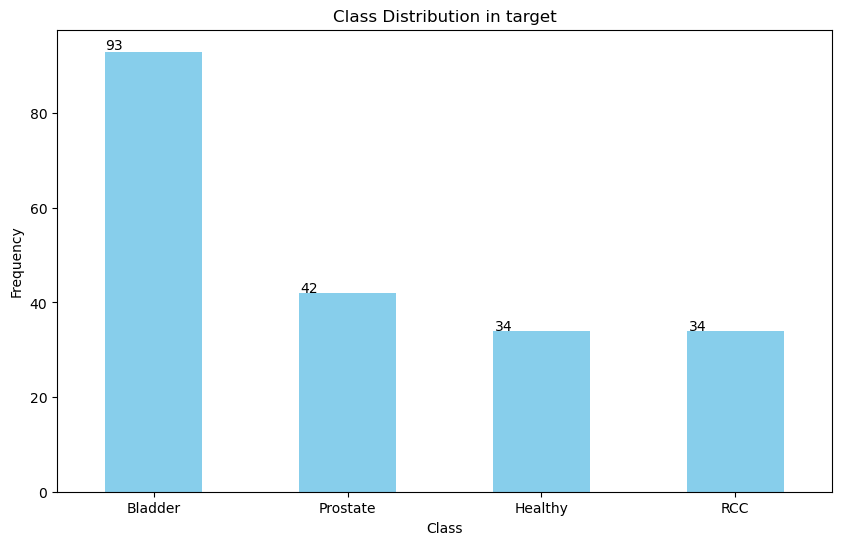

In [14]:

preprocessing.plot_class_distribution(EndMotif_t)

In [15]:


TEST_SIZE = 0.3
CNA_train, CNA_test = preprocessing.stratified_train_test_split(CNA_t_unique, test_size=TEST_SIZE)

Ratio_train, Ratio_test = preprocessing.stratified_train_test_split(Ratio_t, test_size=TEST_SIZE)

EndMotif_train, EndMotif_test = preprocessing.stratified_train_test_split(EndMotif_t, test_size=TEST_SIZE)




Cross-validated Accuracy: 0.5700


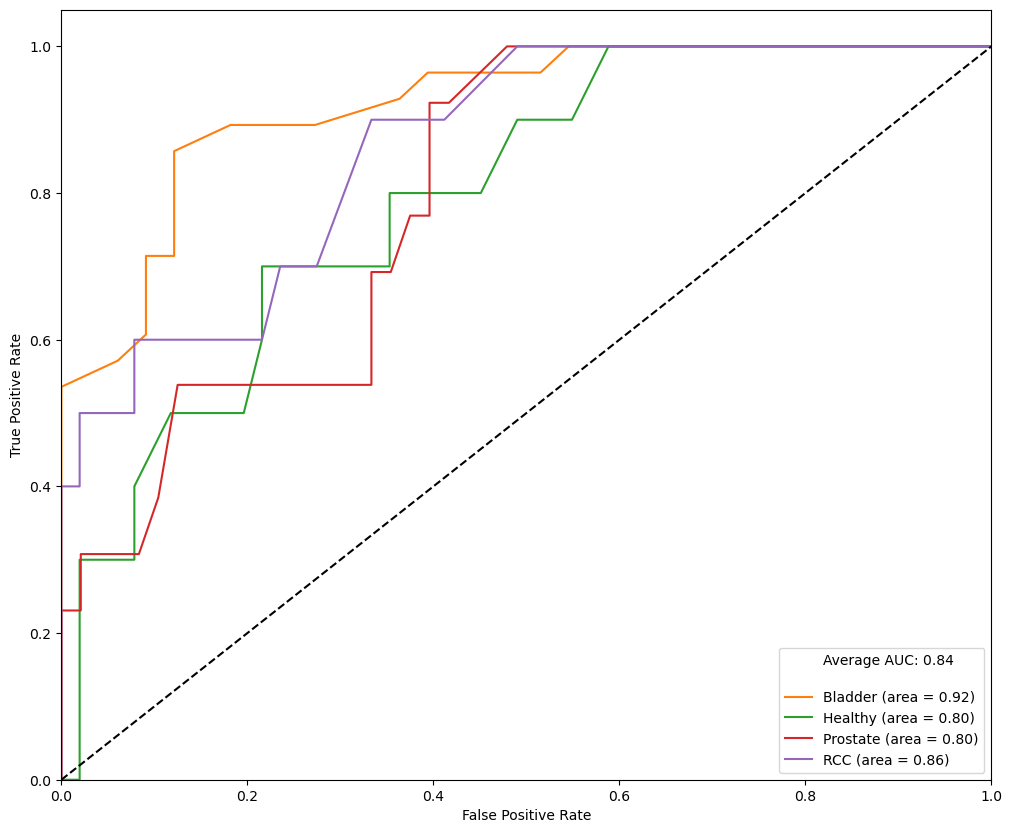

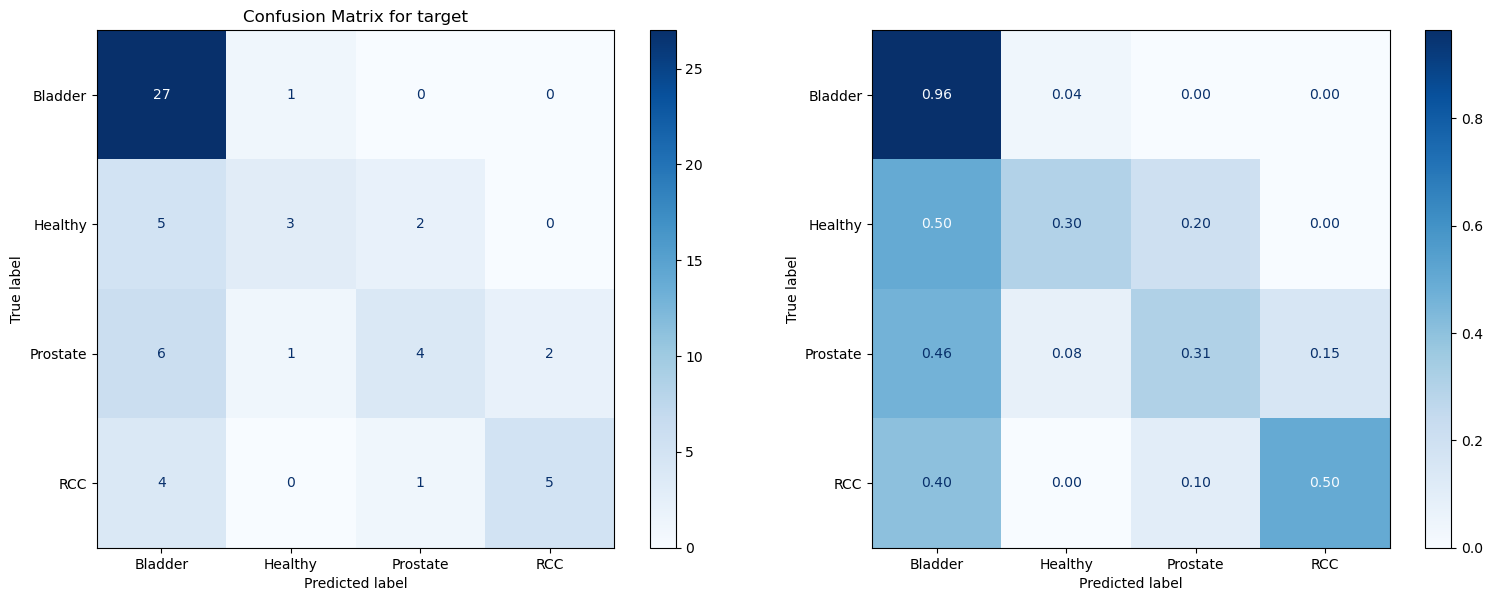

In [16]:
EndMotif_rf = models.train_model(EndMotif_train, EndMotif_test)

Cross-validated Accuracy: 0.5135


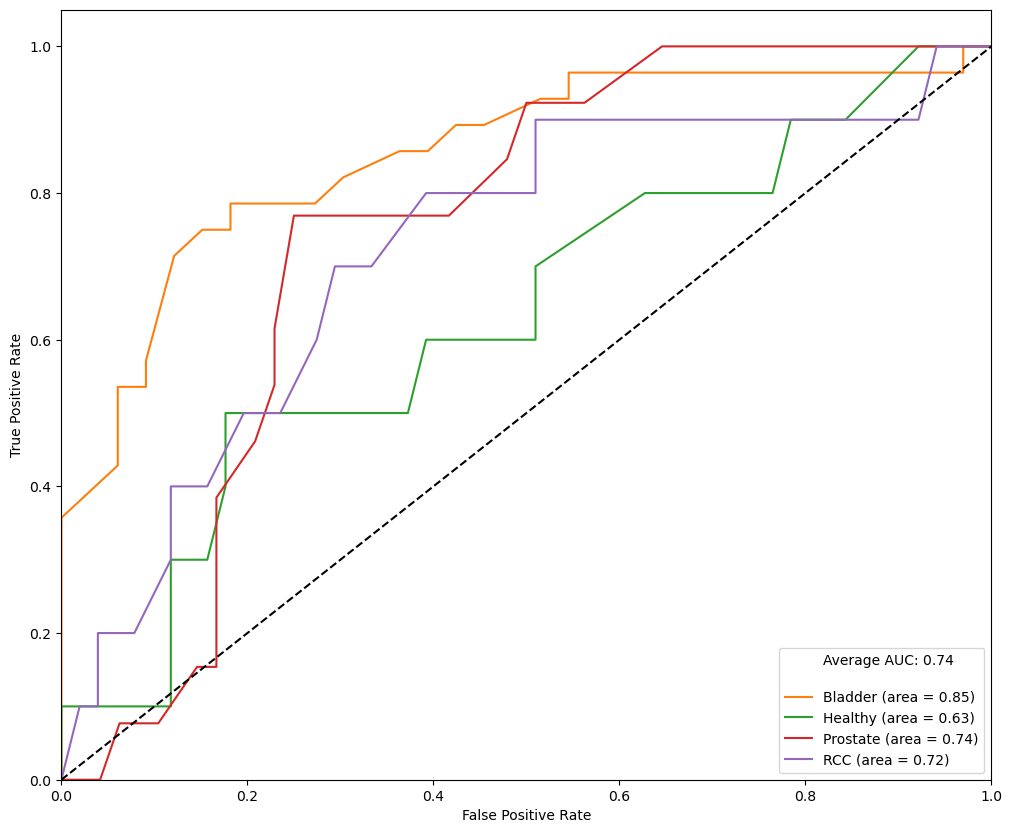

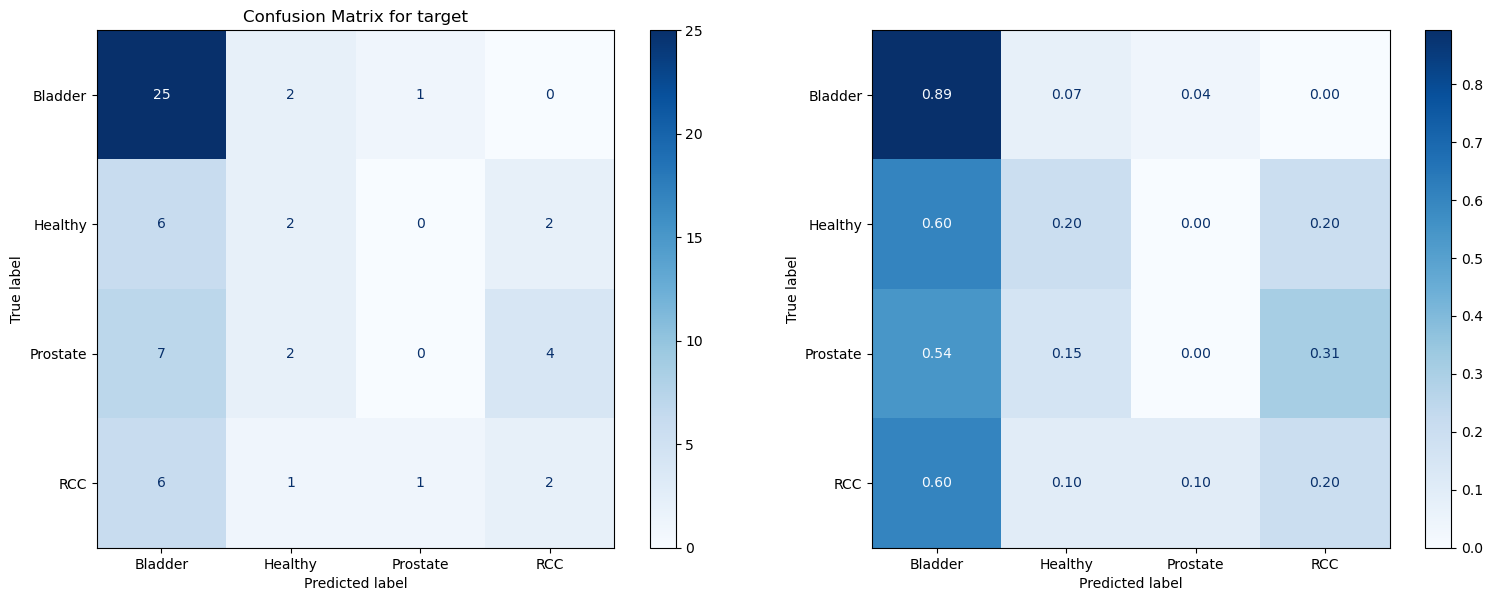

In [17]:
Ratio_rf = models.train_model(Ratio_train, Ratio_test)

Cross-validated Accuracy: 0.5281


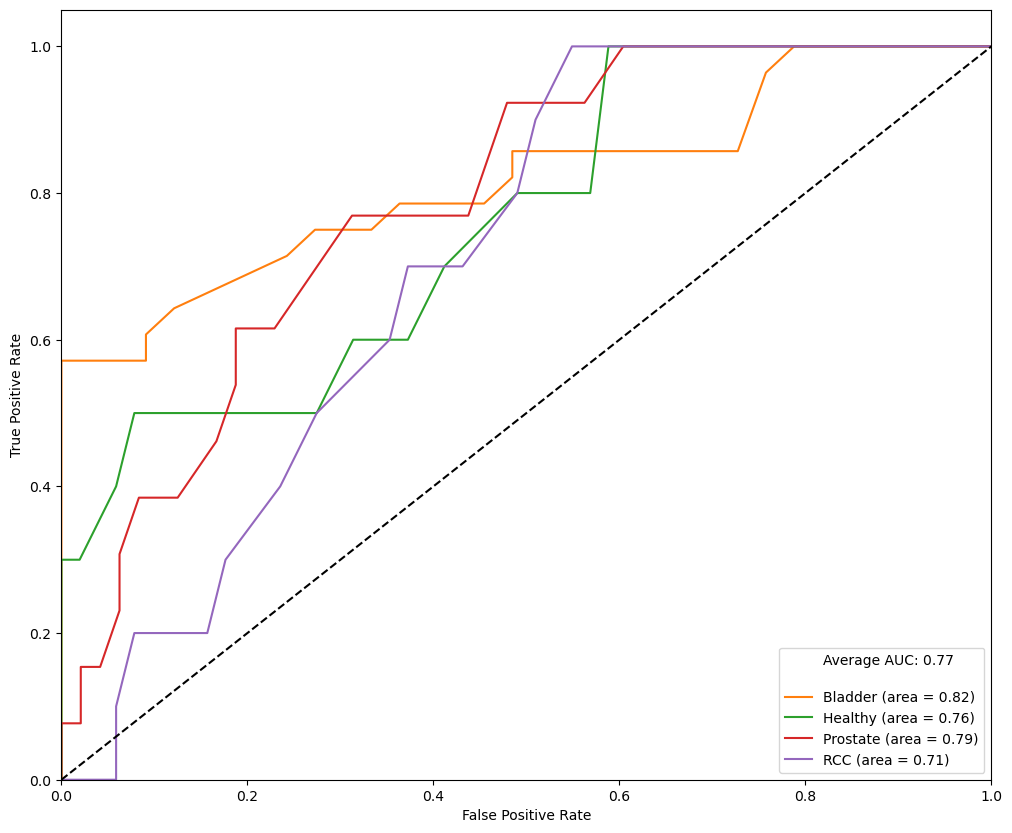

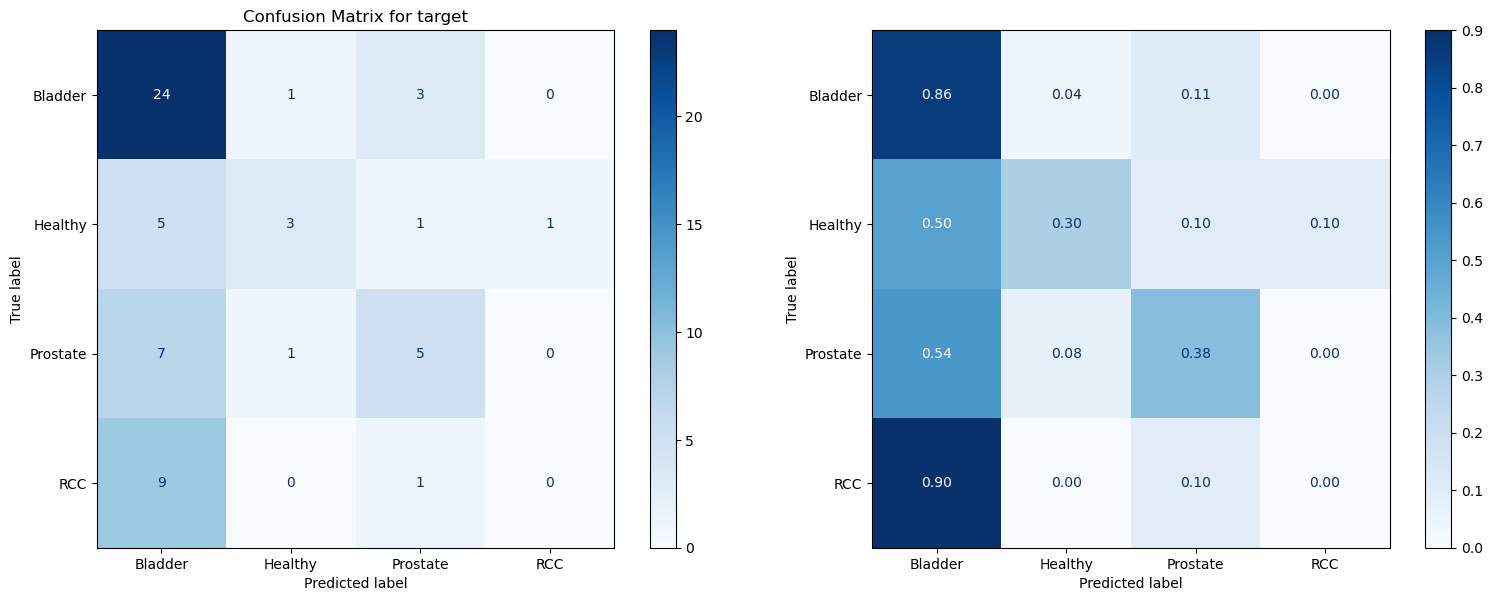

In [18]:
CNA_rf = models.train_model(CNA_train, CNA_test)

# Meta Model

## Combine all features to a single dataframe

In [19]:

CNA_scaled = preprocessing.standardize_dataframe(CNA_t_unique)
Ratio_scaled = preprocessing.standardize_dataframe(Ratio_t)
EndMotif_scaled = preprocessing.standardize_dataframe(EndMotif_t)





# CNA_train, CNA_test = preprocessing.stratified_train_test_split(CNA_t_unique, test_size=TEST_SIZE)

# Ratio_train, Ratio_test = preprocessing.stratified_train_test_split(Ratio_t, test_size=TEST_SIZE)

# EndMotif_train, EndMotif_test = preprocessing.stratified_train_test_split(EndMotif_t, test_size=TEST_SIZE)

display(CNA_scaled.head())

chr        chr1                                                              \
start  14000001  17000001  41000001  56000001  57000001  60000001  63000001   
end    15000000  18000000  42000000  57000000  58000000  61000000  64000000   
58    -0.837668 -0.173025 -0.233098 -0.563349 -0.571839 -0.186888 -0.628053   
73     1.207794 -0.173024 -0.233099 -0.563349  2.365044 -0.701145 -0.628051   
74    -0.877012 -0.173023 -0.233100 -0.563350 -0.571839 -0.701145 -0.628052   
81    -0.877012 -0.173025 -0.233099 -0.563349  0.562096 -0.701146  1.609464   
83     1.445489 -0.173023 -0.233099  1.459693 -0.571839  1.312740  0.302284   

chr                                  ...      chr9                      \
start  64000001  66000001  72000001  ...  25000001  76000001  79000001   
end    65000000  67000000  73000000  ...  26000000  77000000  80000000   
58     0.817844  1.765099 -0.294294  ... -0.294878 -0.675107 -0.515093   
73    -1.271348 -0.864661 -0.294294  ... -0.294878  1.014905 -0.515093   
74    -1.271348 -0.864661 -0.294294  ... -0.294879 -0.675108 -0.515092   
81     0.322251 -0.864661 -0.294295  ... -0.294879  1.336342 -0.515092   
83     2.059545  1.663543 -0.294294  ... -0.294878  0.857824  0.981003   

chr                                                                 target  
start  80000001  82000001  84000001 107000001 108000001 133000001           
end    81000000  83000000  85000000 108000000 109000000 134000000           
58    -0.642723 -0.577211 -0.455453  1.545257 -0.530578 -0.150392  Healthy  
73    -0.760115 -0.577211 -0.752881 -0.855134 -0.530578 -0.150391  Healthy  
74    -0.760114 -0.577210 -0.752881 -0.855135 -0.530579 -0.150390  Healthy  
81    -0.760115 -0.577210 -0.752881 -0.733924 -0.530578 -0.150391  Healthy  
83     0.412842 -0.537188 -0.507957 -0.855134 -0.084030 -0.150391  Healthy  

[5 rows x 331 columns]

In [20]:
preprocessing.check_scaling(CNA_scaled)

Means:
 chr   start      end      
chr1  14000001   15000000     1.257888e-17
      17000001   18000000    -6.918385e-17
      41000001   42000000    -7.041439e-17
      56000001   57000000    -2.532184e-16
      57000001   58000000     2.123370e-16
                                  ...     
chr9  82000001   83000000     1.082878e-16
      84000001   85000000     5.012411e-16
      107000001  108000000   -2.433740e-16
      108000001  109000000   -2.187632e-17
      133000001  134000000   -1.244215e-17
Length: 330, dtype: float64
Standard Deviations:
 chr   start      end      
chr1  14000001   15000000     1.002472
      17000001   18000000     1.002472
      41000001   42000000     1.002472
      56000001   57000000     1.002472
      57000001   58000000     1.002472
                                ...   
chr9  82000001   83000000     1.002472
      84000001   85000000     1.002472
      107000001  108000000    1.002472
      108000001  109000000    1.002472
      133000001  13400000

(chr   start      end      
 chr1  14000001   15000000     1.257888e-17
       17000001   18000000    -6.918385e-17
       41000001   42000000    -7.041439e-17
       56000001   57000000    -2.532184e-16
       57000001   58000000     2.123370e-16
                                   ...     
 chr9  82000001   83000000     1.082878e-16
       84000001   85000000     5.012411e-16
       107000001  108000000   -2.433740e-16
       108000001  109000000   -2.187632e-17
       133000001  134000000   -1.244215e-17
 Length: 330, dtype: float64,
 chr   start      end      
 chr1  14000001   15000000     1.002472
       17000001   18000000     1.002472
       41000001   42000000     1.002472
       56000001   57000000     1.002472
       57000001   58000000     1.002472
                                 ...   
 chr9  82000001   83000000     1.002472
       84000001   85000000     1.002472
       107000001  108000000    1.002472
       108000001  109000000    1.002472
       133000001  134000000   

In [21]:
preprocessing.check_scaling(EndMotif_scaled)

Means:
 AAAA   -1.645099e-15
AAAC   -5.250316e-16
AAAG   -2.778292e-15
AAAT    1.767606e-15
AACA    2.537653e-15
            ...     
TTGT   -5.250316e-16
TTTA   -5.031553e-16
TTTC   -1.614472e-15
TTTG    1.408835e-15
TTTT   -6.037863e-16
Length: 256, dtype: float64
Standard Deviations:
 AAAA    1.002472
AAAC    1.002472
AAAG    1.002472
AAAT    1.002472
AACA    1.002472
          ...   
TTGT    1.002472
TTTA    1.002472
TTTC    1.002472
TTTG    1.002472
TTTT    1.002472
Length: 256, dtype: float64


(AAAA   -1.645099e-15
 AAAC   -5.250316e-16
 AAAG   -2.778292e-15
 AAAT    1.767606e-15
 AACA    2.537653e-15
             ...     
 TTGT   -5.250316e-16
 TTTA   -5.031553e-16
 TTTC   -1.614472e-15
 TTTG    1.408835e-15
 TTTT   -6.037863e-16
 Length: 256, dtype: float64,
 AAAA    1.002472
 AAAC    1.002472
 AAAG    1.002472
 AAAT    1.002472
 AACA    1.002472
           ...   
 TTGT    1.002472
 TTTA    1.002472
 TTTC    1.002472
 TTTG    1.002472
 TTTT    1.002472
 Length: 256, dtype: float64)

In [22]:
import preprocessing

combined_df = preprocessing.combine_feature_dfs_with_target([(CNA_scaled, 'CNA_'), (Ratio_scaled, 'Ratio_'), (EndMotif_scaled, 'EndMotif_')])

display(combined_df)

,CNA_chr1-CNA_14000001-CNA_15000000,CNA_chr1-CNA_17000001-CNA_18000000,CNA_chr1-CNA_41000001-CNA_42000000,CNA_chr1-CNA_56000001-CNA_57000000,CNA_chr1-CNA_57000001-CNA_58000000,CNA_chr1-CNA_60000001-CNA_61000000,CNA_chr1-CNA_63000001-CNA_64000000,CNA_chr1-CNA_64000001-CNA_65000000,CNA_chr1-CNA_66000001-CNA_67000000,CNA_chr1-CNA_72000001-CNA_73000000,...,EndMotif_TTCT,EndMotif_TTGA,EndMotif_TTGC,EndMotif_TTGG,EndMotif_TTGT,EndMotif_TTTA,EndMotif_TTTC,EndMotif_TTTG,EndMotif_TTTT,target
58,-0.837668,-0.173025,-0.233098,-0.563349,-0.571839,-0.186888,-0.628053,0.817844,1.765099,-0.294294,...,0.184073,-0.109023,0.127063,0.105056,-0.207803,0.215823,0.161035,0.087407,-0.525291,Healthy
73,1.207794,-0.173024,-0.233099,-0.563349,2.365044,-0.701145,-0.628051,-1.271348,-0.864661,-0.294294,...,-0.660450,-0.934448,-0.703784,-0.712034,-0.747016,-1.411128,-1.462011,-1.427306,-1.111289,Healthy
74,-0.877012,-0.173023,-0.233100,-0.563350,-0.571839,-0.701145,-0.628052,-1.271348,-0.864661,-0.294294,...,1.185264,0.007469,0.301968,0.106441,0.149631,0.160916,0.666864,0.188280,1.168134,Healthy
81,-0.877012,-0.173025,-0.233099,-0.563349,0.562096,-0.701146,1.609464,0.322251,-0.864661,-0.294295,...,0.192699,0.136433,0.094726,0.143429,0.294104,-0.094124,-0.376432,-0.134287,-0.286327,Healthy
83,1.445489,-0.173023,-0.233099,1.459693,-0.571839,1.312740,0.302284,2.059545,1.663543,-0.294294,...,-3.625891,-1.155312,-1.212602,0.230335,-1.875034,-1.653084,-2.208991,-1.306341,-2.716611,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBC1315_UC1,0.699906,-0.173025,1.518681,1.395051,0.937420,2.107805,1.841848,0.684713,1.238818,1.175581,...,-0.505055,-0.586011,-0.934022,-1.710300,-1.765584,0.005726,-0.362139,-1.378838,0.057054,Bladder
WBC1317_UC1,-0.064054,-0.173023,-0.233100,0.259298,0.732055,1.258040,-0.095321,0.524779,0.077832,-0.294296,...,0.405715,0.887210,0.252055,0.175750,0.639868,0.669570,0.733605,0.918709,0.700384,Bladder
WBC1320_UC1,-0.877012,-0.173025,-0.233099,-0.563350,-0.571839,-0.701146,-0.628052,-1.271348,-0.864662,-0.294294,...,4.236751,5.542711,4.573198,5.922535,7.098708,1.039208,1.217533,2.154513,-0.110811,Bladder
WBC1322_UC1,-0.335967,-0.173022,-0.233098,-0.177853,-0.115348,-0.134097,-0.015620,-0.288850,-0.694082,-0.294294,...,-1.185402,-0.686563,-0.912504,-0.943943,-1.341512,-1.363584,-1.313869,-1.010976,-0.339636,Bladder


In [23]:
# Assuming 'combined_df' is the DataFrame you've generated
# Split the DataFrame using the predefined function
train_df, test_df = preprocessing.stratified_train_test_split(combined_df, test_size=TEST_SIZE)

# Extract the feature subsets by prefix from train_df and test_df
CNA_train_df = preprocessing.filter_columns_by_prefix(train_df, 'CNA_')
Ratio_train_df = preprocessing.filter_columns_by_prefix(train_df, 'Ratio_')
EndMotif_train_df = preprocessing.filter_columns_by_prefix(train_df, 'EndMotif_')

CNA_test_df = preprocessing.filter_columns_by_prefix(test_df, 'CNA_')
Ratio_test_df = preprocessing.filter_columns_by_prefix(test_df, 'Ratio_')
EndMotif_test_df = preprocessing.filter_columns_by_prefix(test_df, 'EndMotif_')



In [24]:
display(EndMotif_train_df)

,EndMotif_AAAA,EndMotif_AAAC,EndMotif_AAAG,EndMotif_AAAT,EndMotif_AACA,EndMotif_AACC,EndMotif_AACG,EndMotif_AACT,EndMotif_AAGA,EndMotif_AAGC,...,EndMotif_TTCT,EndMotif_TTGA,EndMotif_TTGC,EndMotif_TTGG,EndMotif_TTGT,EndMotif_TTTA,EndMotif_TTTC,EndMotif_TTTG,EndMotif_TTTT,target
PB-239_UC1,0.181216,-0.220420,-0.742860,-0.496816,-0.023397,0.867226,1.658317,0.037385,-0.050250,0.114759,...,0.814944,1.337263,1.603656,1.506599,1.402876,0.371878,0.713188,1.032038,0.755612,Prostate
PB-313_UC1,1.205527,-0.198503,-0.265584,-0.420027,1.610842,0.462894,-1.416194,-0.672767,0.355304,-1.144913,...,-0.456051,-1.468181,-1.442487,-0.824880,-0.548748,-0.942561,-1.373168,-1.598712,0.749736,Prostate
RCC013_UC2,0.285944,-0.142912,0.498993,-0.243929,-0.458092,-0.364940,0.412530,-0.386885,0.801981,0.360776,...,0.681972,0.437633,0.584250,0.475660,0.526173,0.228439,0.650224,0.554093,0.376297,RCC
PB-276_UC1,-0.218743,1.008185,0.515303,1.171091,1.155498,1.131669,-0.004493,1.303444,0.460291,0.228054,...,0.533453,-0.158562,-0.414249,-0.069308,0.085248,0.672944,0.220867,0.114180,-0.363000,Prostate
WBC1206_UC1,1.006391,-0.605221,-0.698392,-0.049018,-0.176601,-1.208643,0.380541,-0.639033,2.254814,0.437643,...,2.385980,0.762182,0.239555,-0.150900,1.323597,1.370349,0.639580,0.479573,1.053380,Bladder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RCC015_UC1,-0.839678,0.516901,0.143089,0.713704,1.506461,0.979451,-0.509112,1.073375,-0.995569,-0.657193,...,-1.473765,-0.822315,-0.891184,-0.382061,-0.711852,-0.951527,-1.352558,-1.109953,-1.344296,RCC
PB032_UC1,-0.143484,1.061925,0.487074,0.758288,1.776430,0.926211,-0.270820,0.872353,0.679510,0.426635,...,-0.051288,-0.153173,-0.393220,-0.187501,0.330538,0.085704,-0.405343,-0.205850,-0.774308,Prostate
BC009_UC1,1.088622,-0.204983,-0.166440,-0.348593,1.066964,-0.978828,-1.856964,-1.035926,-0.146303,-2.008130,...,-0.136059,-1.410930,-1.576092,-1.535190,-1.048647,-0.303678,-0.524536,-1.279930,0.705660,Bladder
WBC1222_UC1,0.756290,-3.830825,-3.778905,-4.536047,-3.418447,-0.630237,0.622552,-3.569088,-2.618372,-1.174358,...,-1.360746,-0.815709,0.645268,1.269783,-1.149329,-3.921105,-2.446432,-1.713372,2.332215,Bladder


In [25]:
display(CNA_train_df)

,CNA_chr1-CNA_14000001-CNA_15000000,CNA_chr1-CNA_17000001-CNA_18000000,CNA_chr1-CNA_41000001-CNA_42000000,CNA_chr1-CNA_56000001-CNA_57000000,CNA_chr1-CNA_57000001-CNA_58000000,CNA_chr1-CNA_60000001-CNA_61000000,CNA_chr1-CNA_63000001-CNA_64000000,CNA_chr1-CNA_64000001-CNA_65000000,CNA_chr1-CNA_66000001-CNA_67000000,CNA_chr1-CNA_72000001-CNA_73000000,...,CNA_chr9-CNA_25000001-CNA_26000000,CNA_chr9-CNA_76000001-CNA_77000000,CNA_chr9-CNA_79000001-CNA_80000000,CNA_chr9-CNA_80000001-CNA_81000000,CNA_chr9-CNA_82000001-CNA_83000000,CNA_chr9-CNA_84000001-CNA_85000000,CNA_chr9-CNA_107000001-CNA_108000000,CNA_chr9-CNA_108000001-CNA_109000000,CNA_chr9-CNA_133000001-CNA_134000000,target
PB-239_UC1,-0.404917,-0.173025,-0.233098,-0.563350,-0.571838,-0.701146,-0.628052,-0.069243,0.574289,-0.294295,...,-0.294878,0.862249,-0.515093,0.166431,-0.577210,-0.249536,-0.141926,-0.530578,-0.150388,Prostate
PB-313_UC1,1.801134,-0.173025,-0.233100,-0.563350,-0.571839,-0.701146,-0.001022,0.502937,0.780533,-0.294294,...,-0.294877,-0.675107,-0.515092,1.723073,-0.577210,-0.580577,-0.855134,-0.530578,-0.150388,Prostate
RCC013_UC2,-0.877012,-0.173024,-0.233098,-0.563349,-0.571838,-0.701146,-0.628051,-1.271348,-0.864661,-0.294295,...,-0.294878,-0.675108,-0.515092,-0.760115,-0.577210,-0.752881,-0.855134,-0.530578,-0.150391,RCC
PB-276_UC1,0.107117,-0.173024,-0.233099,-0.027815,-0.571839,-0.566216,0.571765,1.374554,0.444246,-0.294295,...,-0.294878,1.599106,1.237895,1.905608,-0.577210,-0.170031,0.431492,0.340379,-0.150392,Prostate
WBC1206_UC1,0.639411,-0.173026,-0.233099,-0.563350,-0.248342,0.454661,-0.628052,-0.397207,-0.864661,-0.294294,...,-0.294878,1.586938,1.259964,0.928279,1.283869,2.050391,2.417344,2.296945,-0.150388,Bladder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RCC015_UC1,0.735840,-0.173023,-0.233100,0.563660,0.221457,-0.701145,0.507092,1.675104,0.564175,-0.294295,...,-0.294877,0.468871,-0.397835,3.100393,-0.577211,-0.136117,0.466946,-0.530577,-0.150392,RCC
PB032_UC1,4.614494,-0.173025,-0.233098,-0.519140,0.523528,-0.701146,-0.628052,-1.039571,-0.864662,-0.294294,...,-0.294878,-0.675108,-0.515093,-0.760115,0.436028,2.250149,-0.855134,-0.530578,-0.150388,Prostate
BC009_UC1,-0.877013,-0.173024,-0.233100,-0.563350,-0.571839,-0.701146,-0.628051,-1.271348,-0.864661,-0.294295,...,-0.294879,-0.675107,-0.515093,-0.728773,-0.577211,-0.752881,-0.855134,-0.530579,-0.150388,Bladder
WBC1222_UC1,0.257831,-0.173025,-0.233100,-0.563349,-0.571839,-0.701146,1.890026,-0.226076,0.308968,-0.294295,...,-0.294878,1.394205,0.978484,1.012372,0.418408,0.889926,0.974040,-0.289659,-0.150389,Bladder


Best hyperparameters found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 5000}
Cross-validated Accuracy: 0.5424


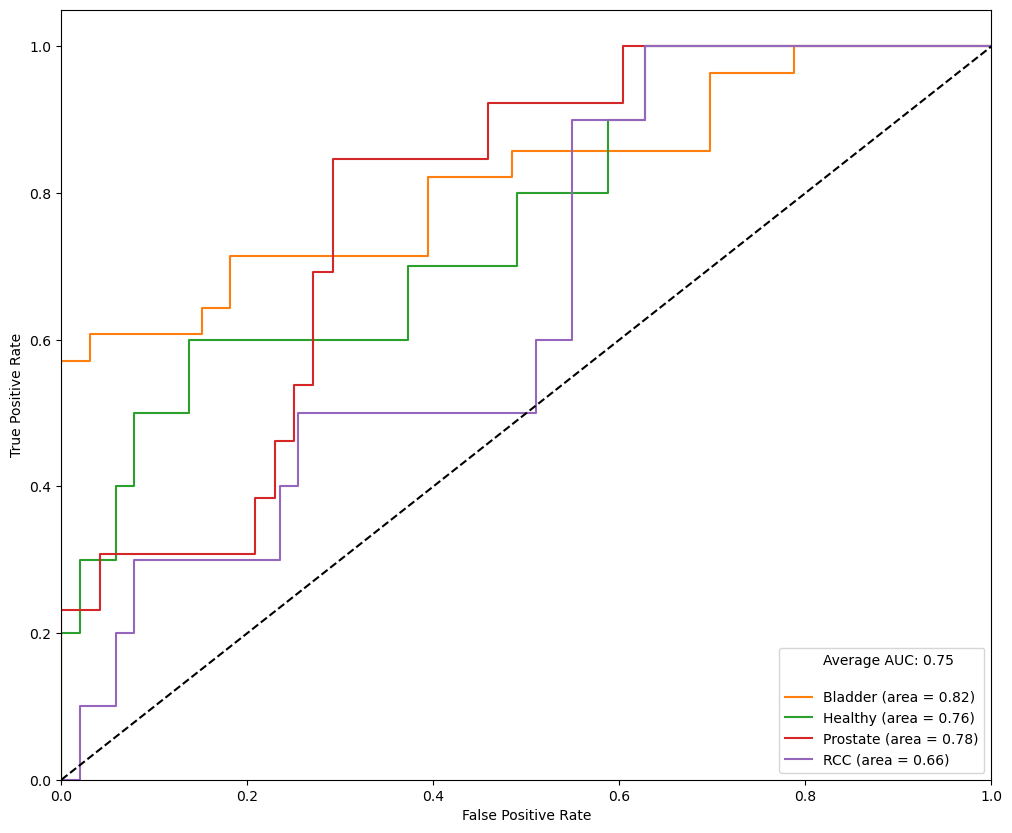

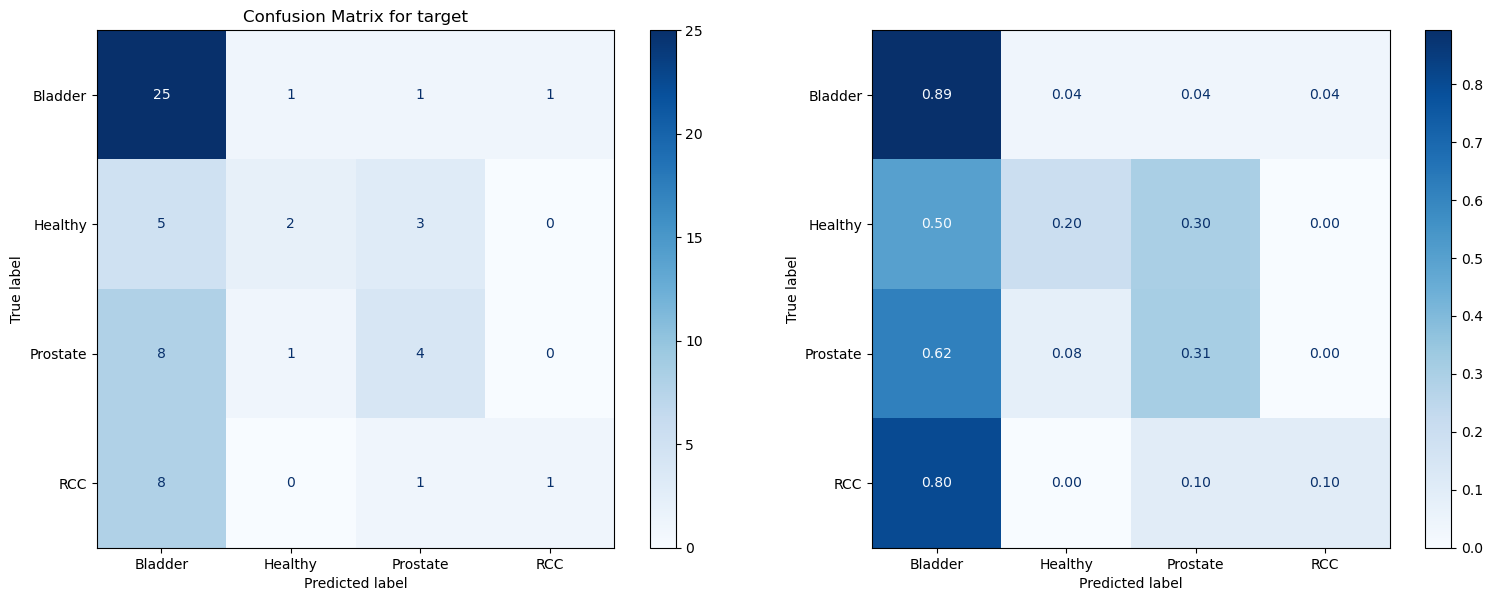

Best hyperparameters found: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 1000}
Cross-validated Accuracy: 0.5214


<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

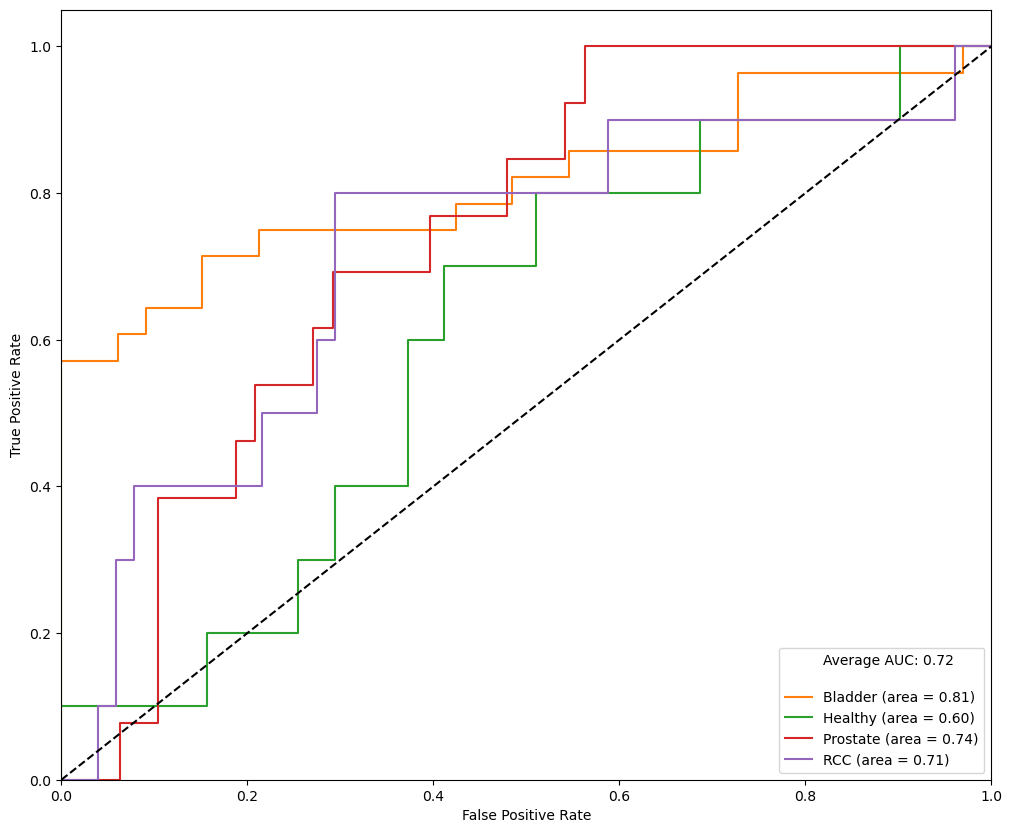

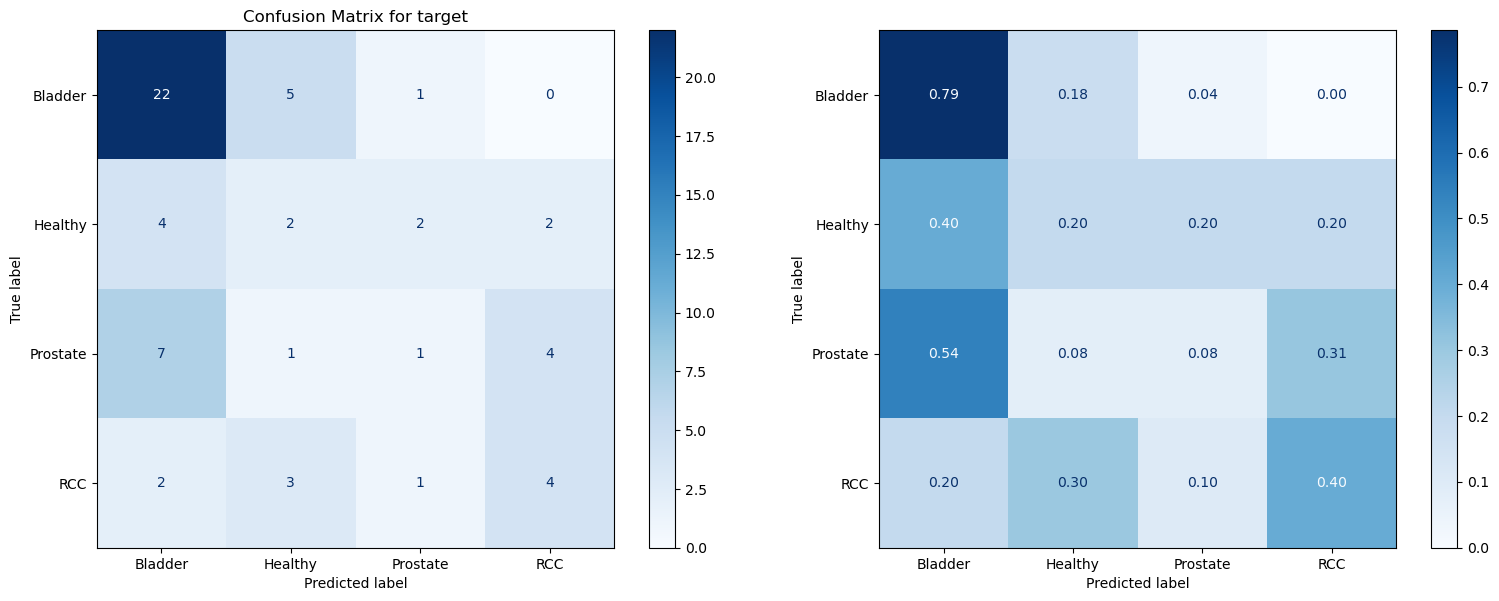

Best hyperparameters found: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Cross-validated Accuracy: 0.5700


<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

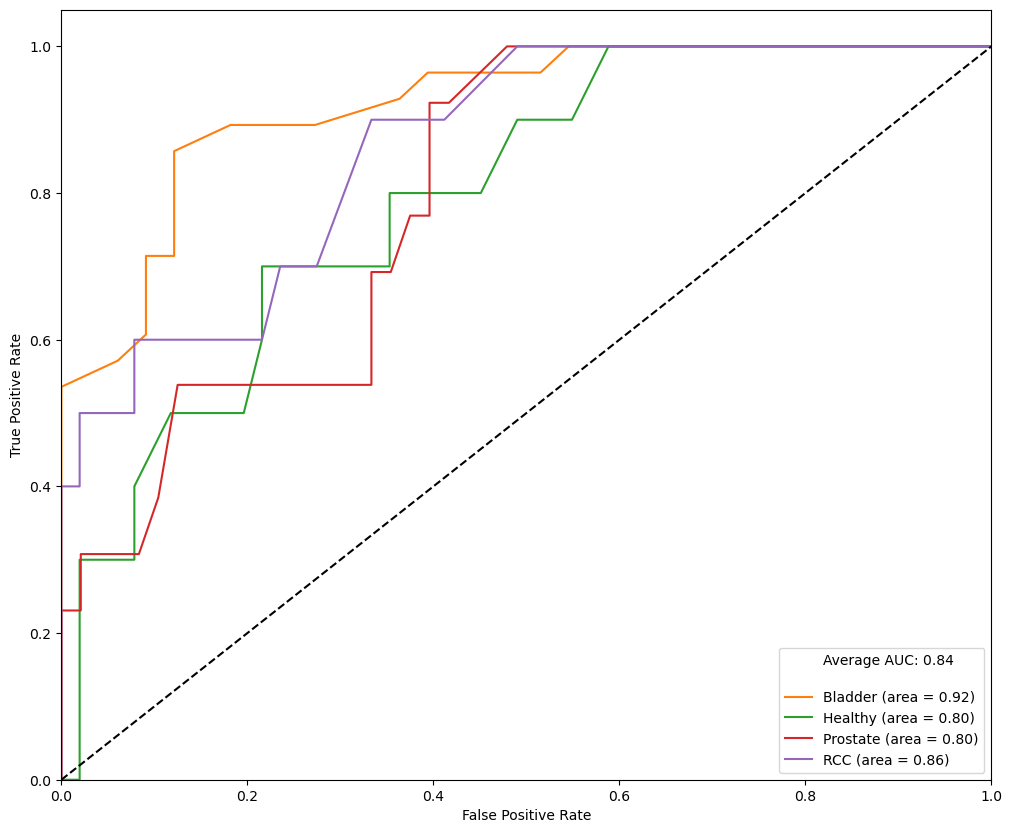

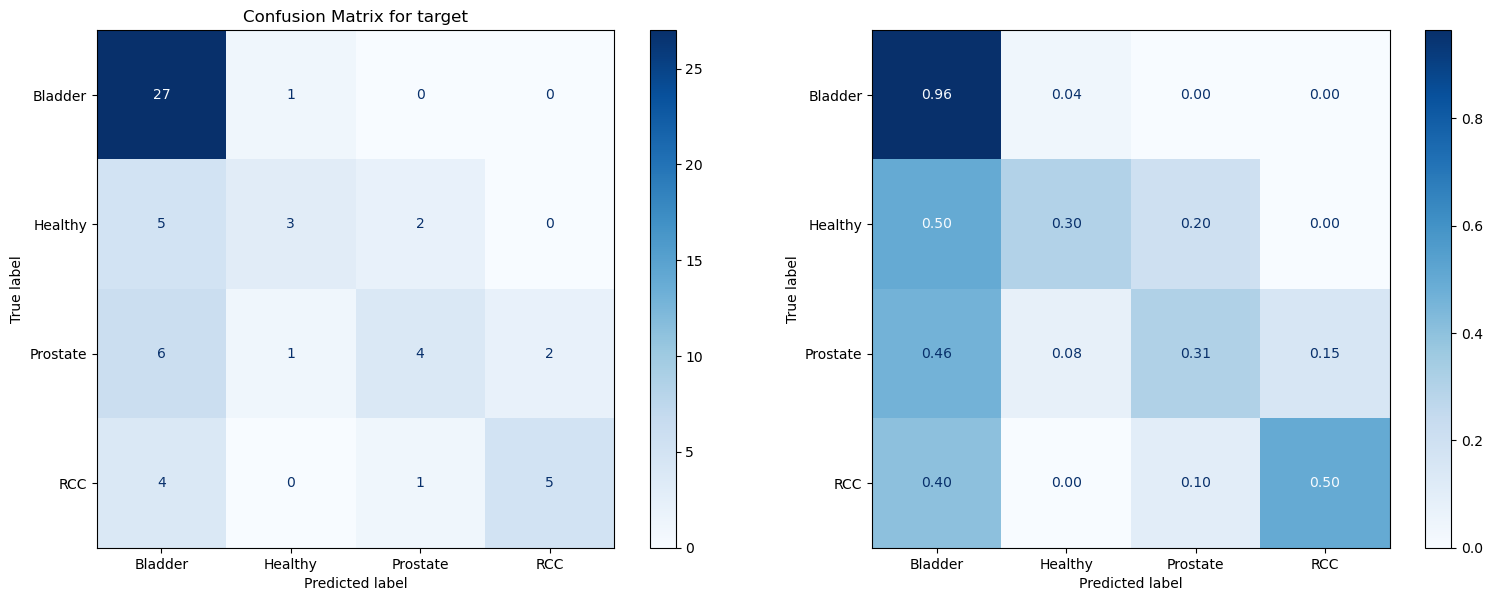

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [26]:
# # Train the models on their respective feature subsets using your train_model( function
from sklearn.ensemble import RandomForestClassifier
model_CNA = models.train_model(CNA_train_df, CNA_test_df, model = RandomForestClassifier(random_state=0, n_estimators=2000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, search_method='grid',
                               save_figures_path=Output_dir+'_/RF_CNA_ROC', 
                               save_folder=Output_dir+'_/RF_CNA_ROC'       )
model_Ratio = models.train_model(Ratio_train_df, Ratio_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=2000, class_weight='balanced'), param_grid=param_grid_rf, cv=5,  search_method='grid',
                                 save_figures_path=Output_dir+'_/RF_Ratio_ROC', 
                                 save_folder=Output_dir+'_/RF_Ratio_ROC'       
                                
                                )
model_EndMotif = models.train_model(EndMotif_train_df, EndMotif_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=2000, class_weight='balanced'), param_grid=param_grid_rf, cv=5,search_method='grid',
                               save_figures_path=Output_dir+'_/RF_EndMotif_ROC', 
                               save_folder=Output_dir+'_/RF_EndMotif_ROC'
                                    
                                   )



Cross-validated Accuracy: 0.5352


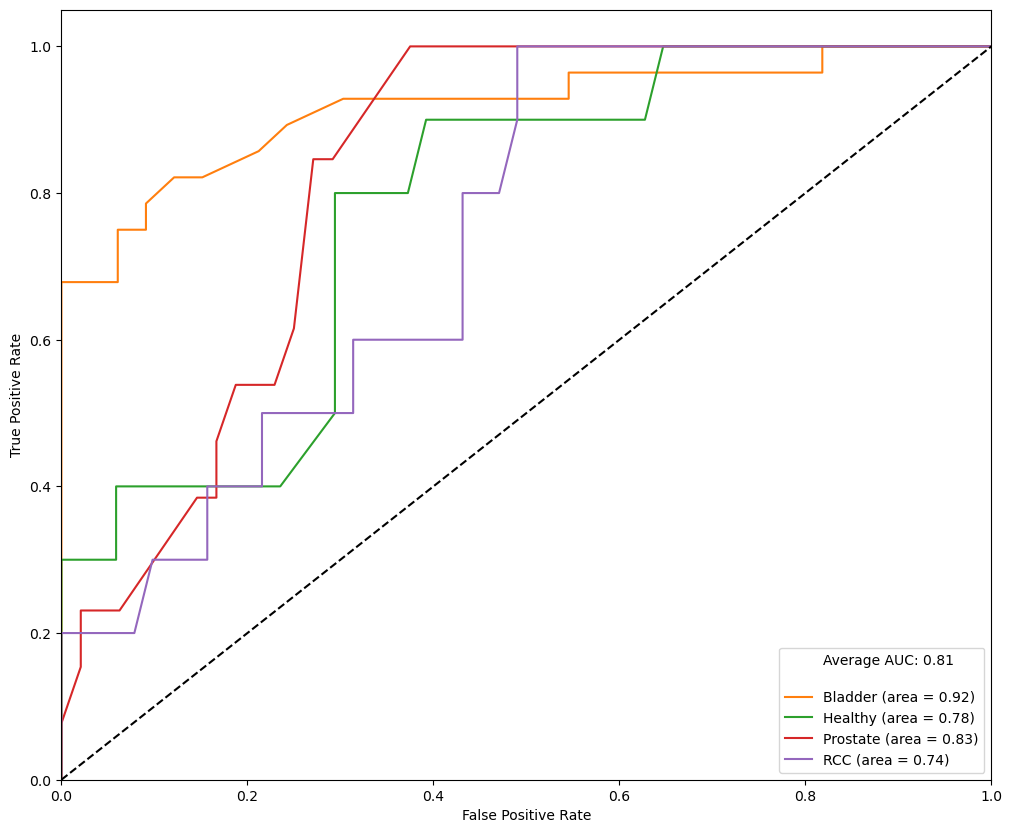

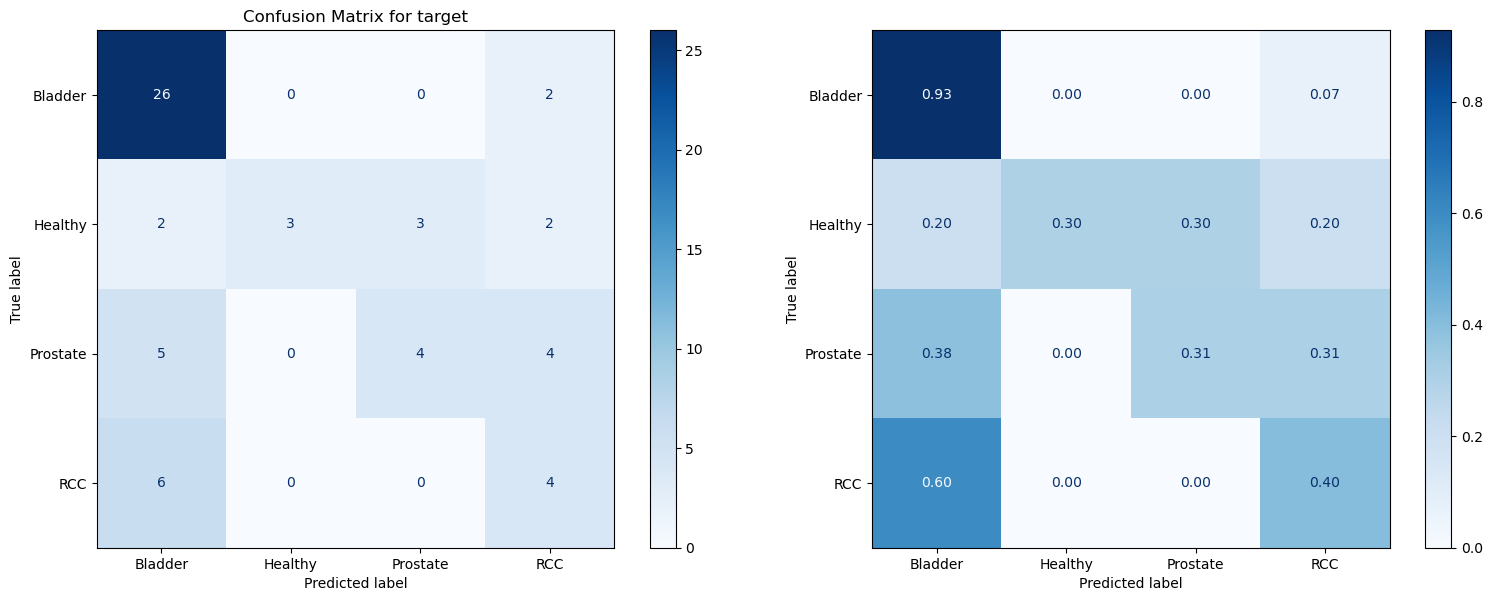

RandomForestClassifier(class_weight='balanced', random_state=0)

In [27]:
models.train_model(train_df, test_df)

Best hyperparameters found: {'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Cross-validated Accuracy: 0.6049


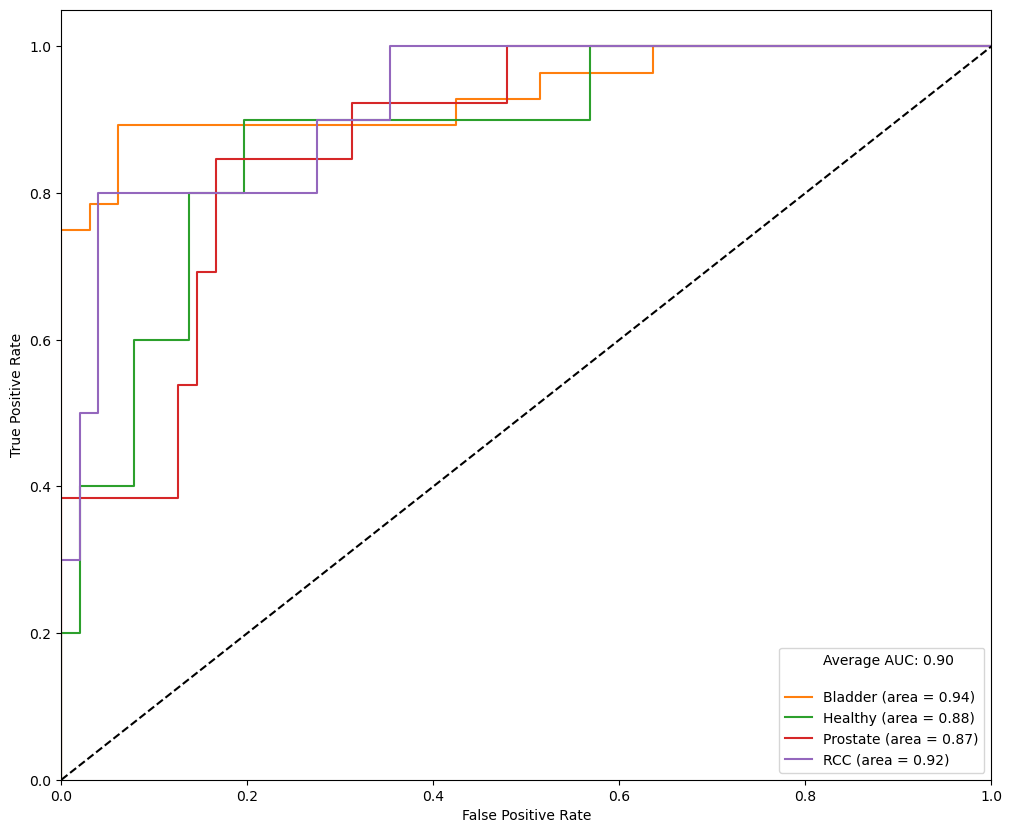

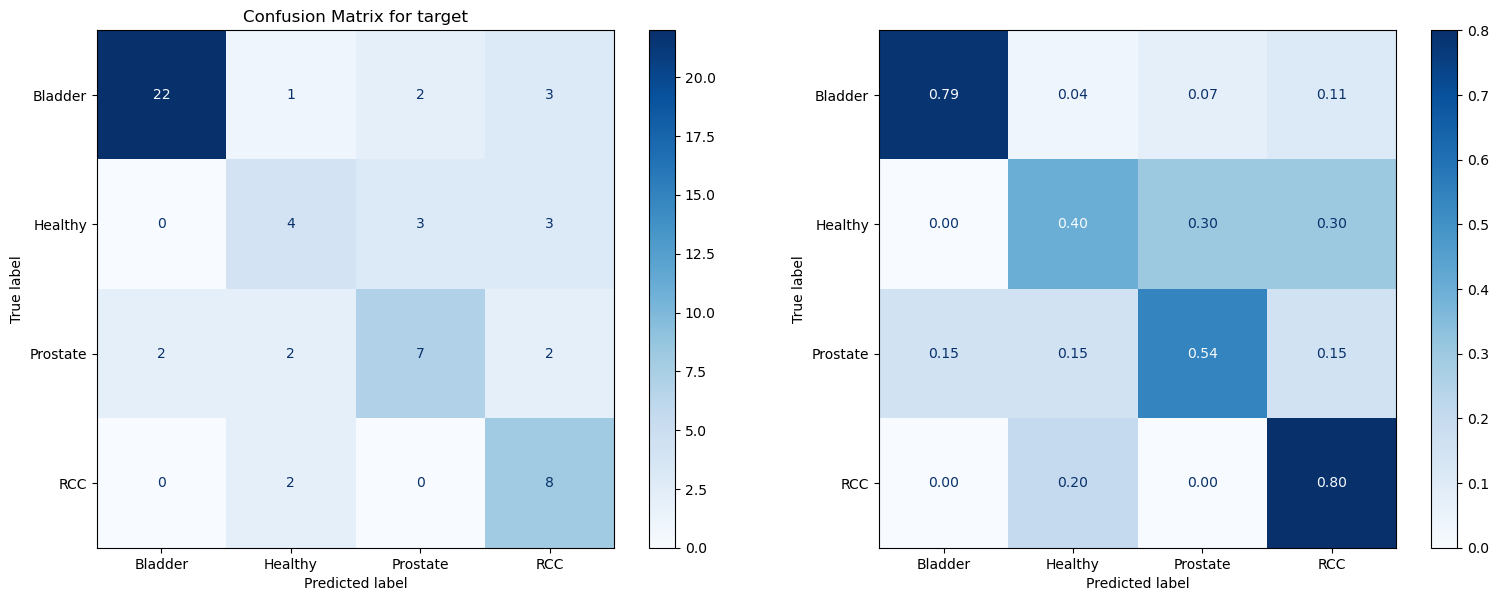

In [28]:
param_grid_log_reg = [
    {
        'penalty': ['l2'],         
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['lbfgs'],       
        'max_iter': [200, 500, 1000]
    },
    {
        'penalty': ['l1', 'l2'],   
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],   
        'max_iter': [200, 500, 1000]
    },
    {
        'penalty': ['elasticnet'],  # Only include 'elasticnet' here
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['saga'],         
        'max_iter': [200, 500, 1000],
        'l1_ratio': [0.5]           # Only used with 'elasticnet'
    }
]





#log_reg_model = LogisticRegression(max_iter=1000, random_state=0, class_weight='balanced')




# Train with LogisticRegression and hyperparameter tuning using GridSearchCV
trained_log_reg_model = models.train_model(
        train_df, 
        test_df, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='roc_auc_micro',
        search_method='grid'
)



Best hyperparameters found: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
Cross-validated Accuracy: 0.6128


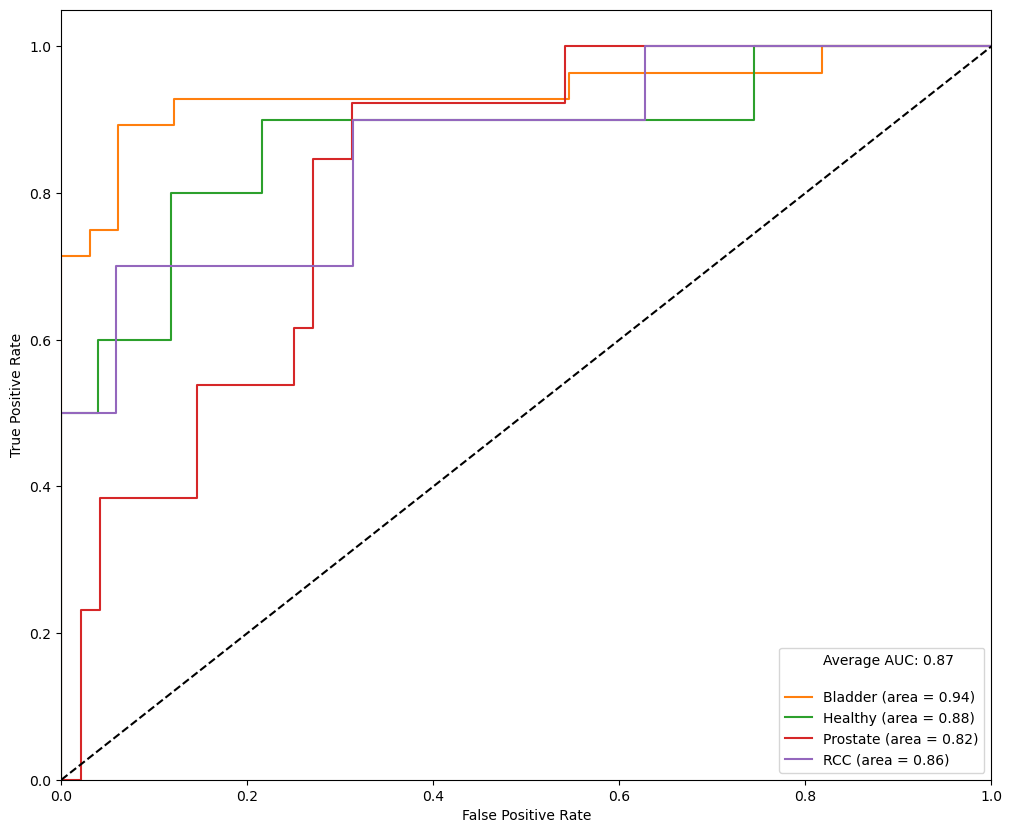

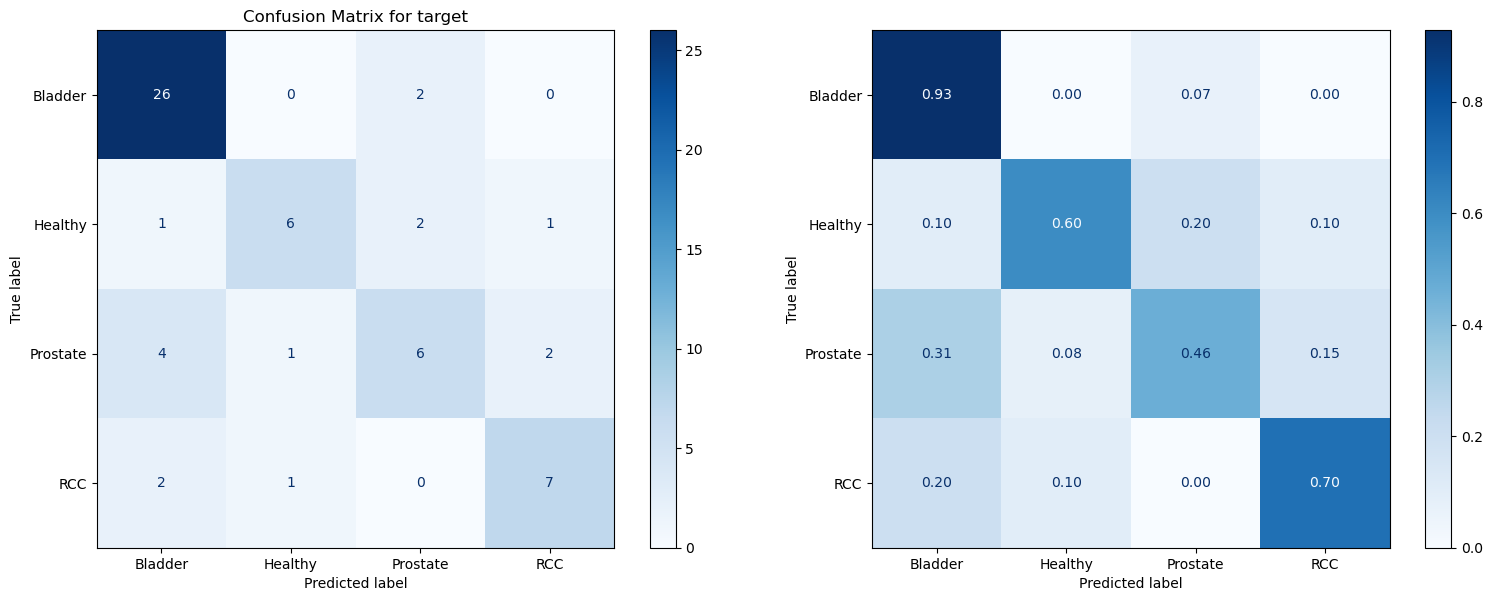

SVC(C=100, class_weight='balanced', gamma=0.001, probability=True,
    random_state=0)

In [29]:
param_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100],  # Small to large values to balance underfitting/overfitting
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Default + specific values
    'kernel': ['rbf']  # Keeping RBF fixed (if you want to try others, add 'linear', 'poly', etc.)
}

models.train_model(
    train_df, 
    test_df, 
    target_name='target', 
    model=SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=0), 
    param_grid=param_grid_svm,  # Ensure you define param_grid for SVM
    cv=5, 
    scoring='roc_auc_micro',
    search_method='grid'
)

Best hyperparameters found: {'C': 0.01, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Cross-validated Accuracy: 0.5135


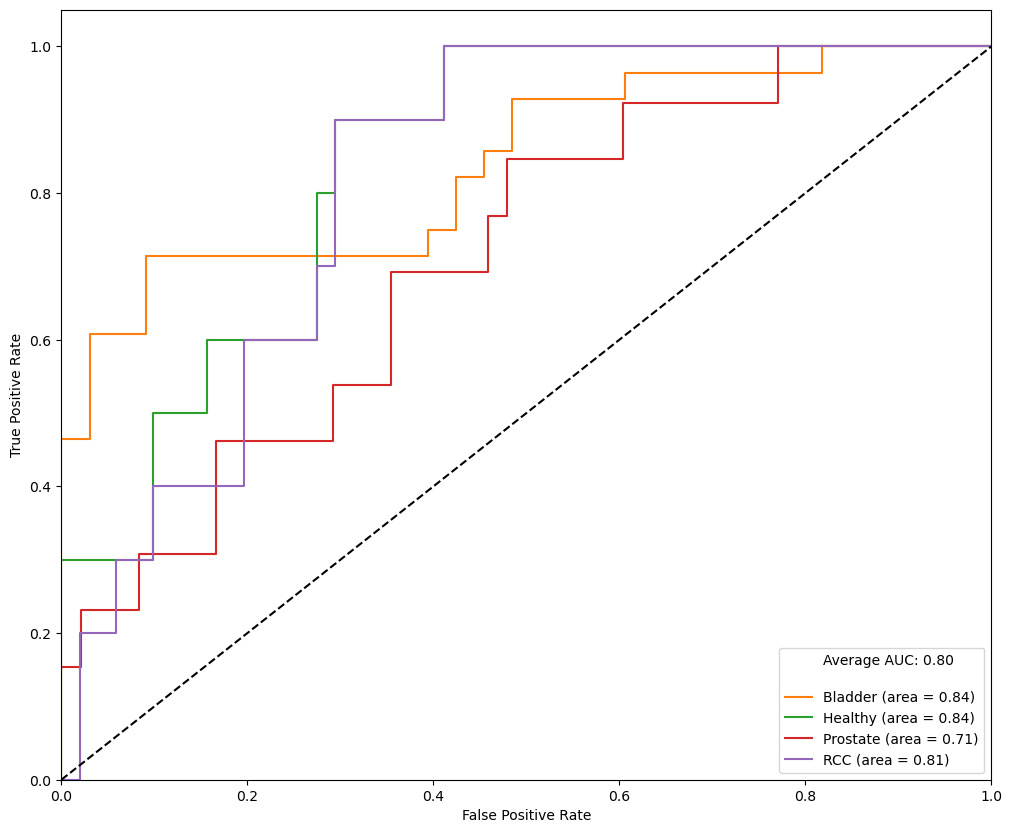

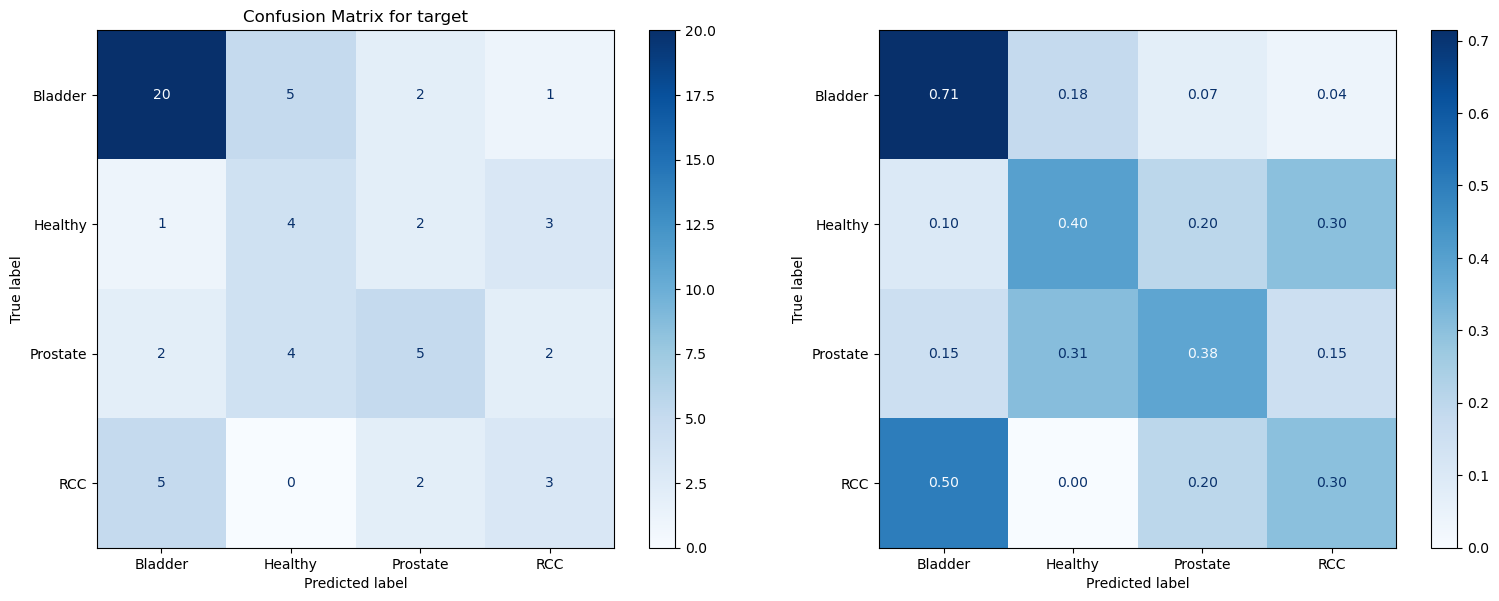

LogisticRegression(C=0.01, class_weight='balanced', max_iter=200,
                   random_state=0)

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [30]:





models.train_model(CNA_train_df, CNA_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
        
            search_method='grid',

            save_figures_path=Output_dir+'_/Log_reg_CNA_ROC', 
            save_folder=Output_dir+'_/Log_reg_CNA_ROC'       
                  )
    



Best hyperparameters found: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Cross-validated Accuracy: 0.5204


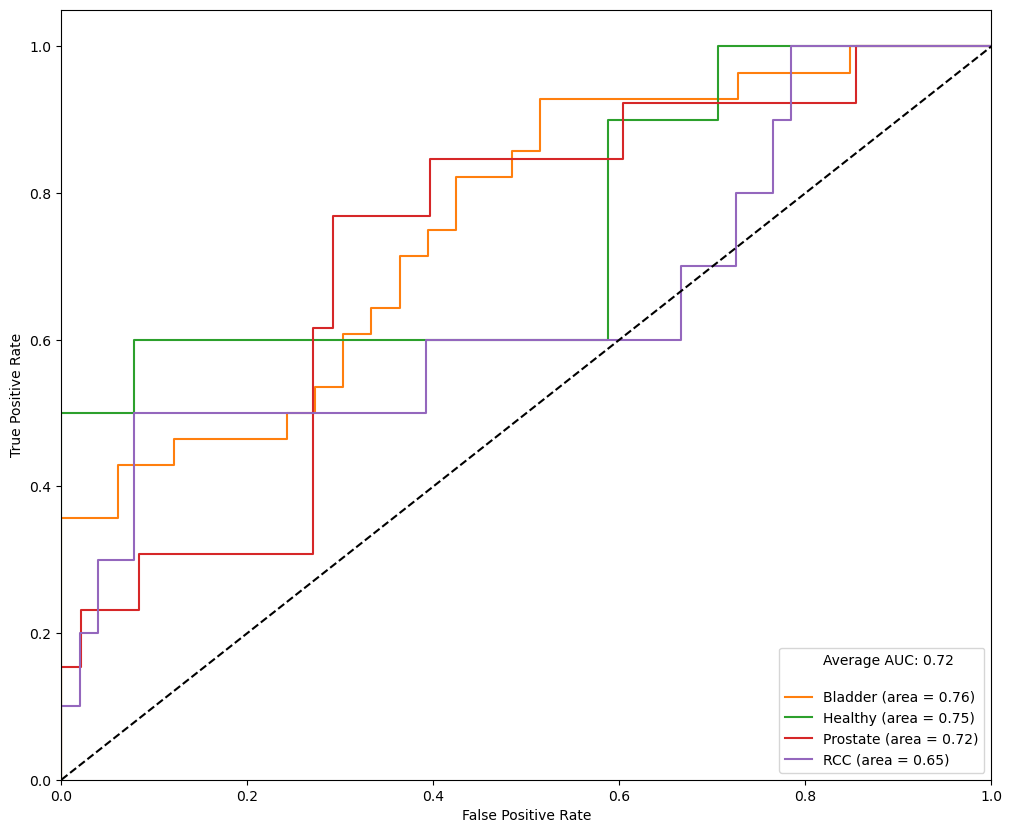

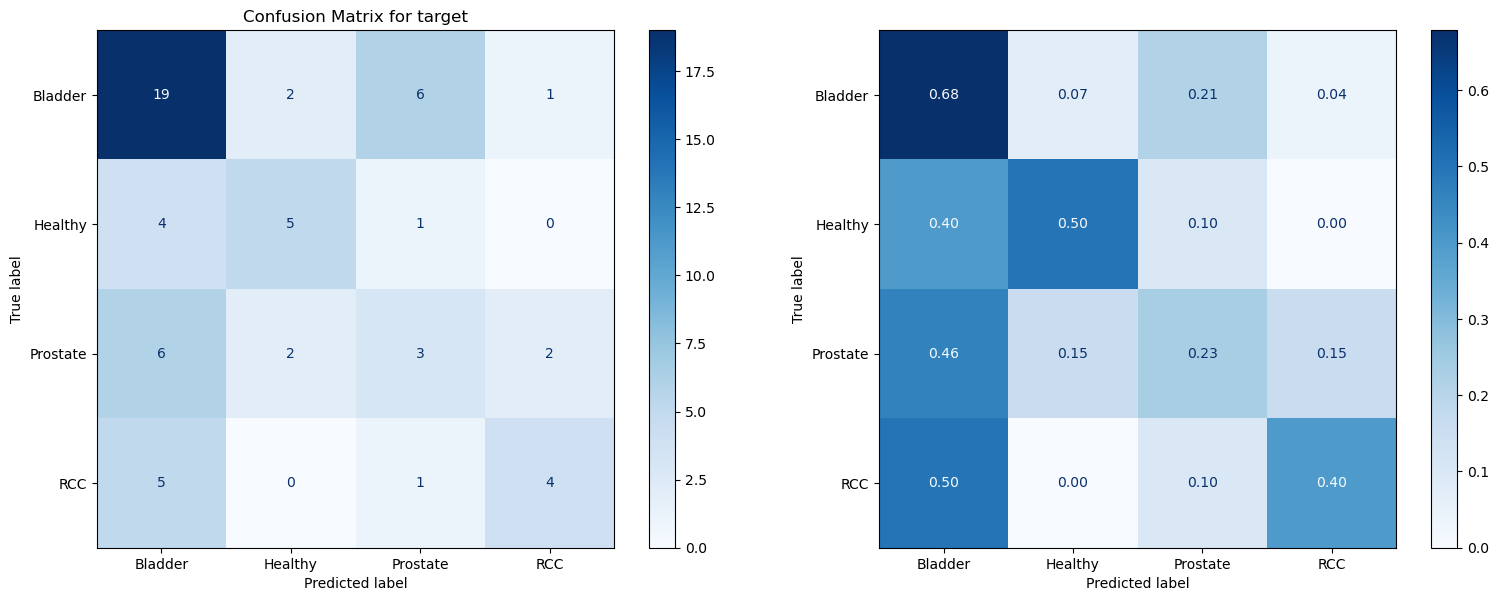

SVC(C=10, class_weight='balanced', gamma=0.001, probability=True,
    random_state=0)

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [31]:
models.train_model(
    CNA_train_df, CNA_test_df, 
    target_name='target', 
    model=SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=0), 
    param_grid=param_grid_svm,  # Ensure you define param_grid for SVM
    cv=5, 
    scoring='roc_auc_micro',
    search_method='grid',

    save_figures_path=Output_dir+'_/SVC_CNA_ROC', 
    save_folder=Output_dir+'_/SVC_CNA_ROC'       
    
)

Best hyperparameters found: {'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}
Cross-validated Accuracy: 0.5355


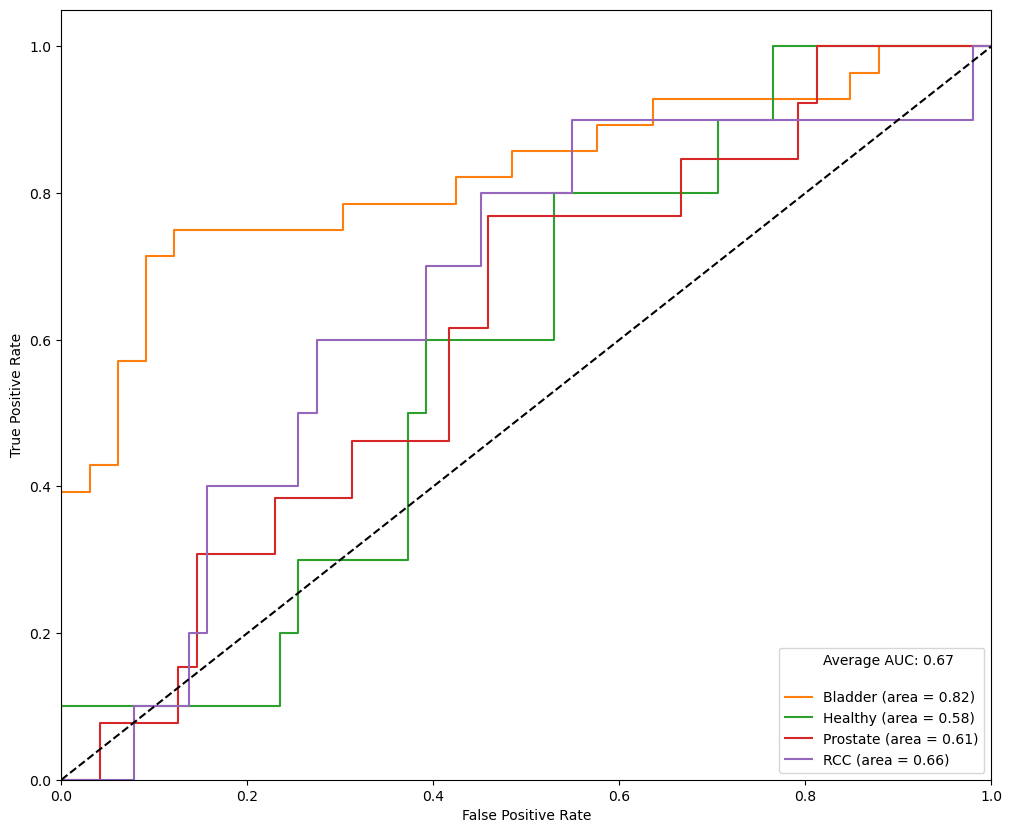

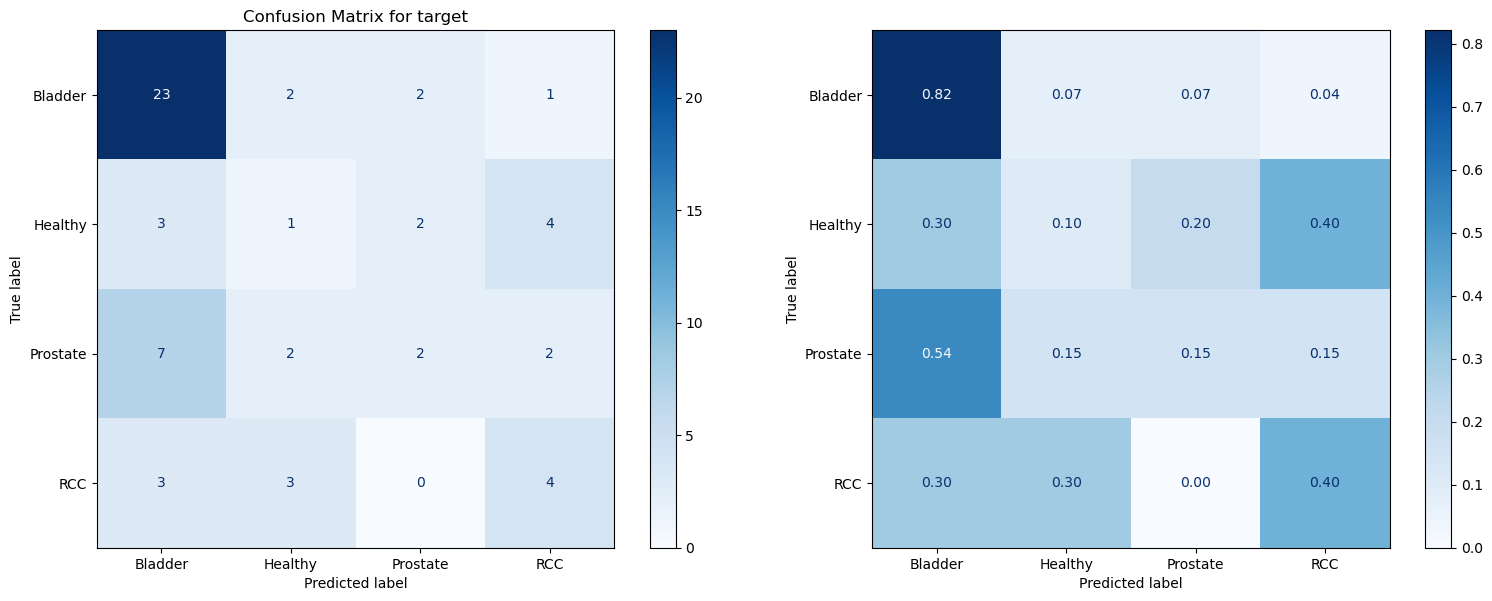

LogisticRegression(C=0.1, class_weight='balanced', max_iter=200, random_state=0,
                   solver='liblinear')

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [32]:


models.train_model(Ratio_train_df, Ratio_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 

            search_method='grid',
            save_figures_path=Output_dir+'_/Log_reg_Ratio_ROC', 
            save_folder=Output_dir+'_/Log_reg_Ratio_ROC'       
                  )

Best hyperparameters found: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Cross-validated Accuracy: 0.4929


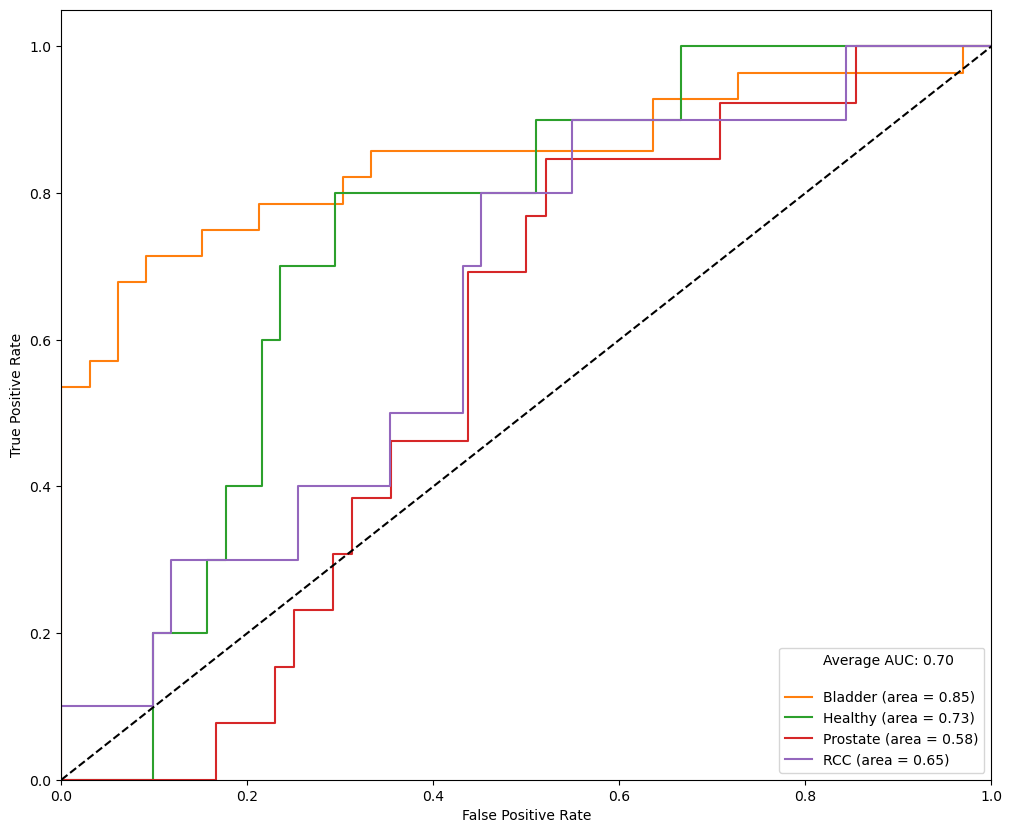

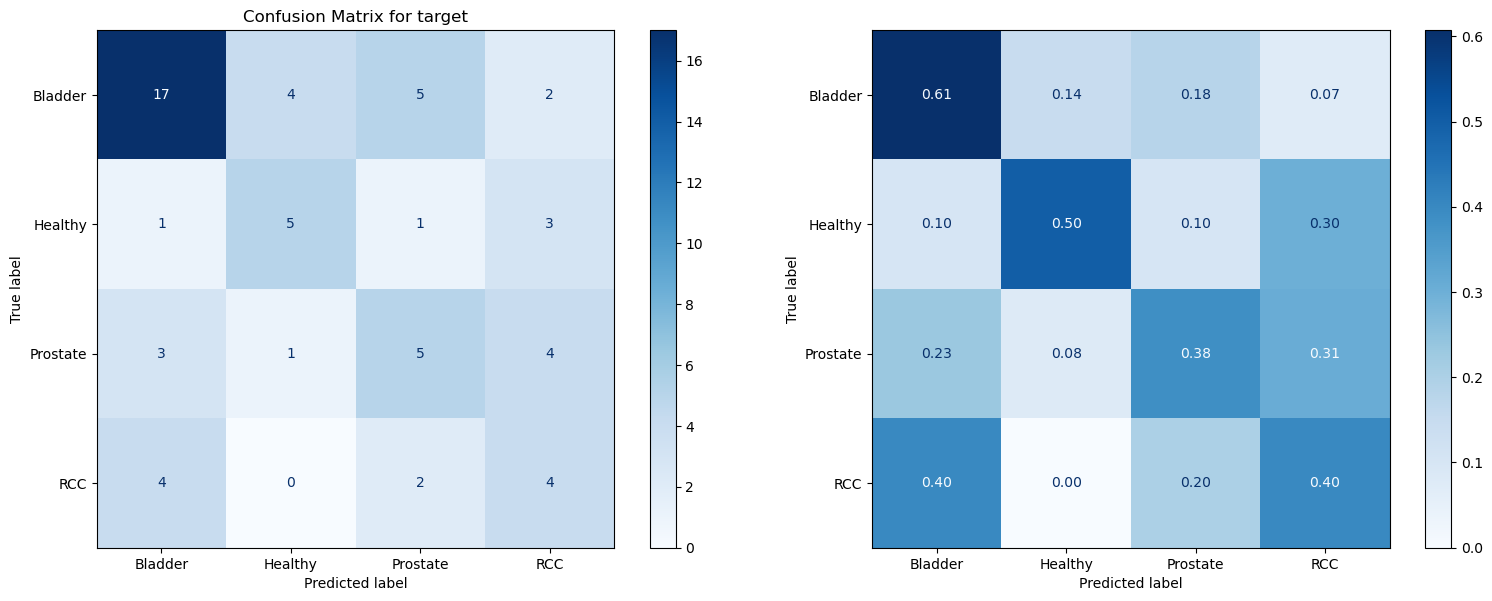

SVC(C=100, class_weight='balanced', gamma=0.01, probability=True,
    random_state=0)

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [33]:
models.train_model(
    Ratio_train_df, Ratio_test_df,
    target_name='target', 
    model=SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=0), 
    param_grid=param_grid_svm,  # Ensure you define param_grid for SVM
    cv=5, 
 
    search_method='grid',
    save_figures_path=Output_dir+'_/SVC_Ratio_ROC', 
    save_folder=Output_dir+'_/SVC_Ratio_ROC'       
)

Best hyperparameters found: {'C': 10, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}
Cross-validated Accuracy: 0.7667


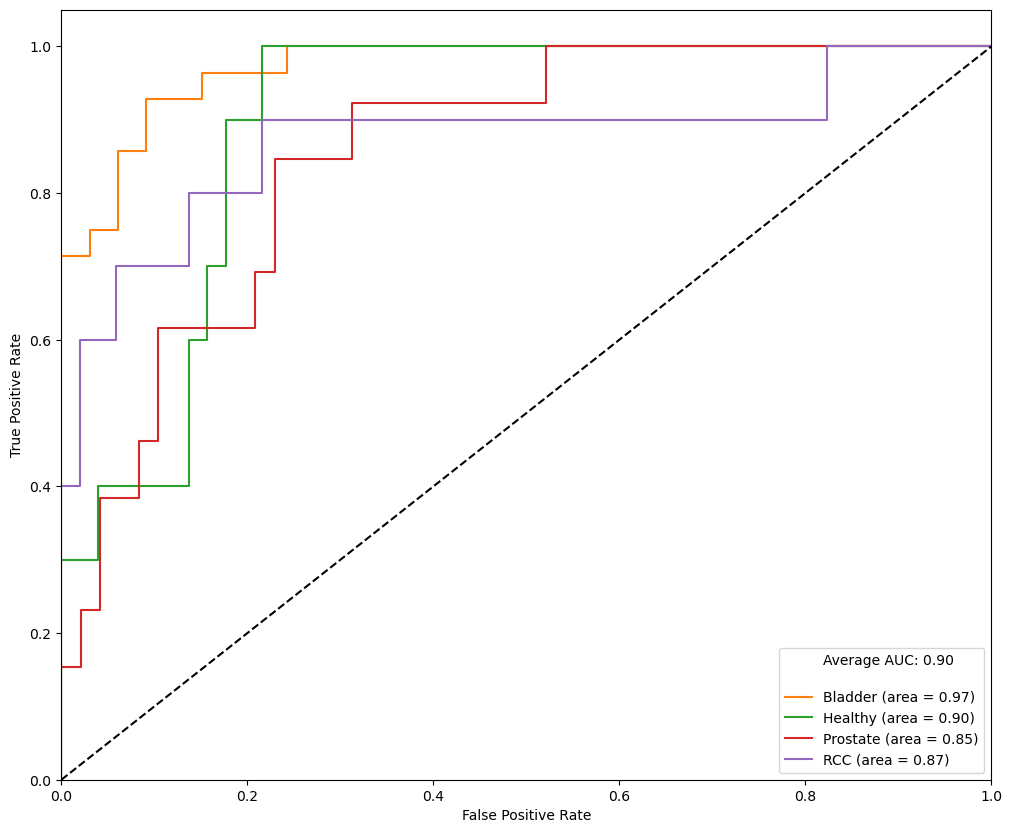

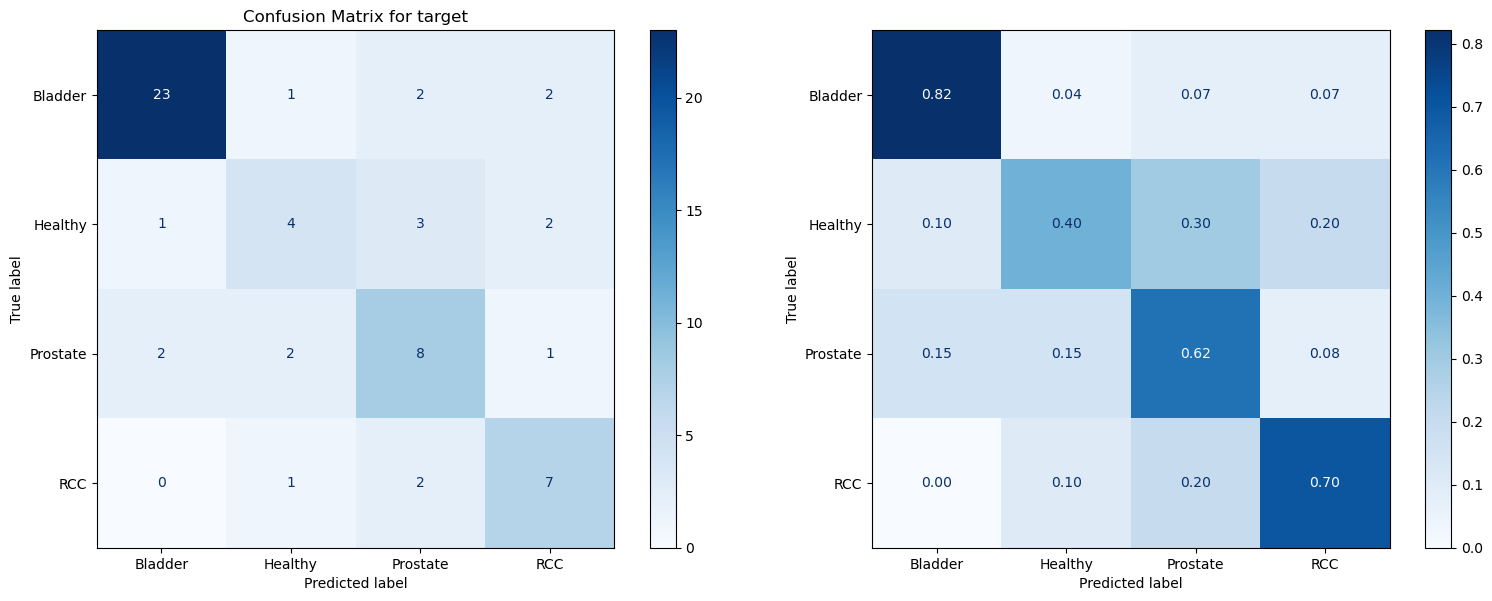

LogisticRegression(C=10, class_weight='balanced', max_iter=200, penalty='l1',
                   random_state=0, solver='liblinear')

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [34]:
models.train_model(EndMotif_train_df, EndMotif_test_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
          
            search_method='grid',
            save_auc = Output_dir+'_/Log_reg_Endmotif_ROC',
            save_figures_path=Output_dir+'_/Log_reg_EndMotif_ROC', 
            save_folder=Output_dir+'_/Log_reg_EndMotif_ROC'       
    )

Best hyperparameters found: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Cross-validated Accuracy: 0.6259


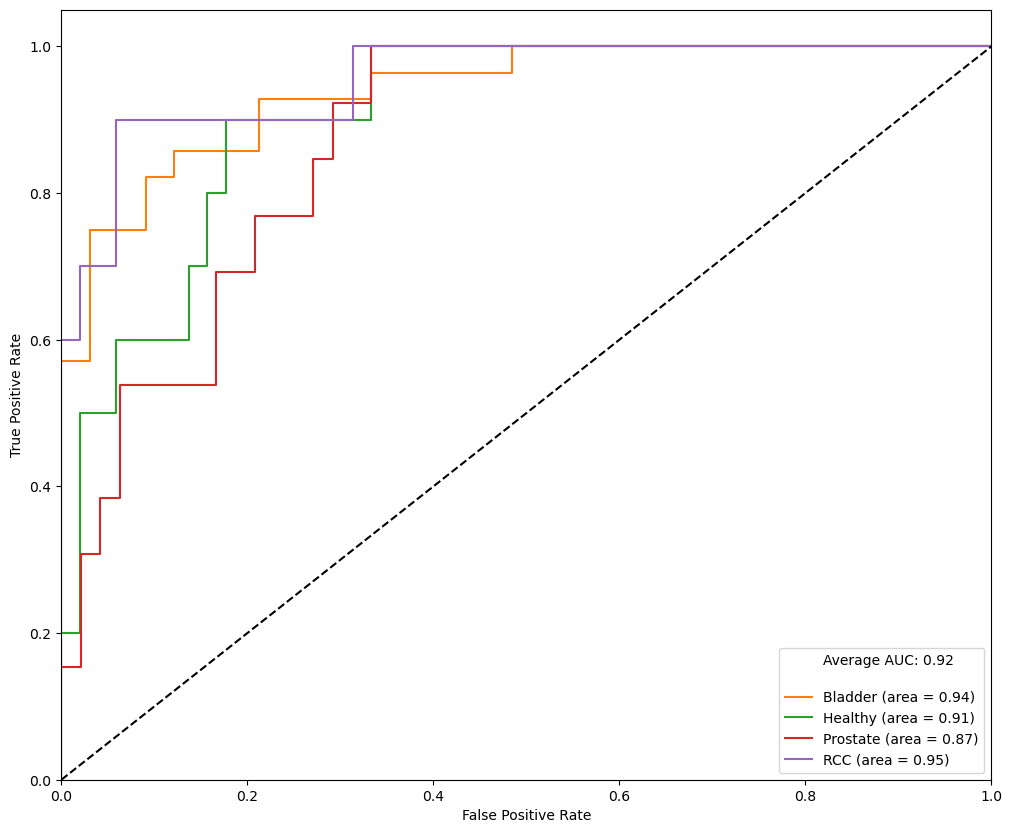

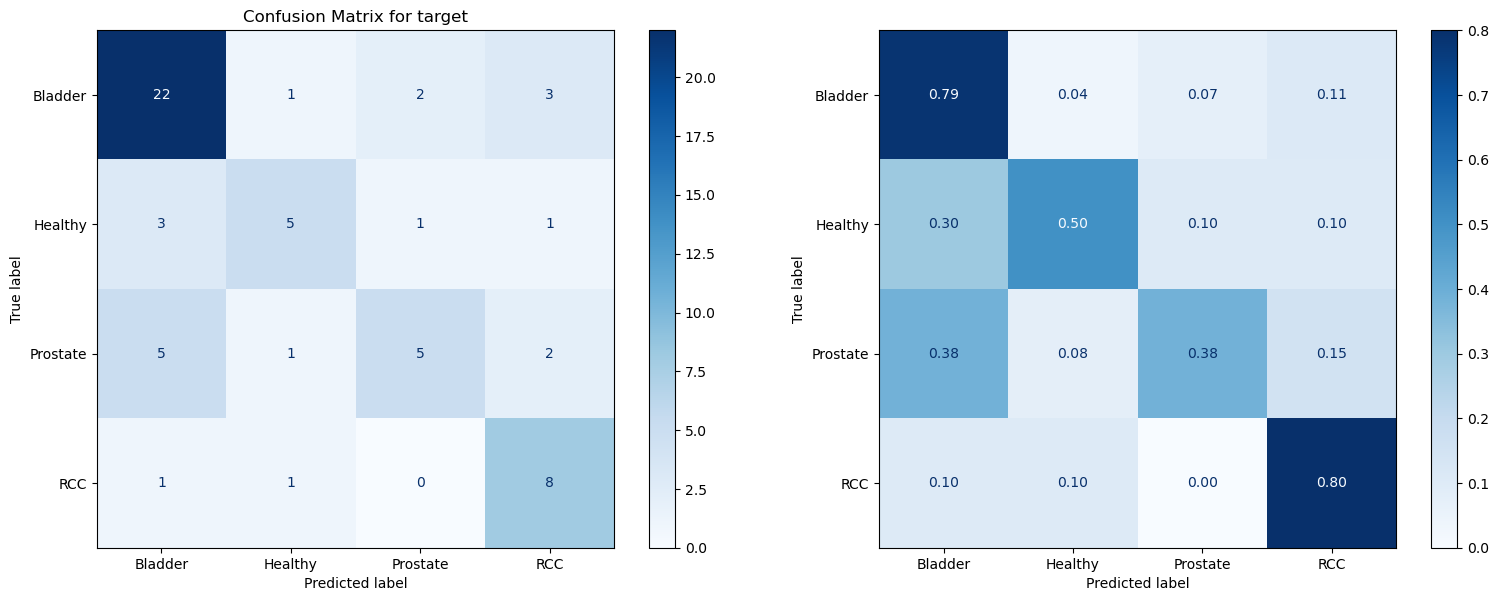

SVC(C=100, class_weight='balanced', probability=True, random_state=0)

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [35]:
models.train_model(
    EndMotif_train_df, EndMotif_test_df,
    target_name='target', 
    model=SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=0), 
    param_grid=param_grid_svm,  # Ensure you define param_grid for SVM
    cv=5, 
   
    search_method='grid',
    save_figures_path=Output_dir+'_/SVC_EndMotif_ROC', 
        save_folder=Output_dir+'_/SVC_EndMotif_ROC'       
)

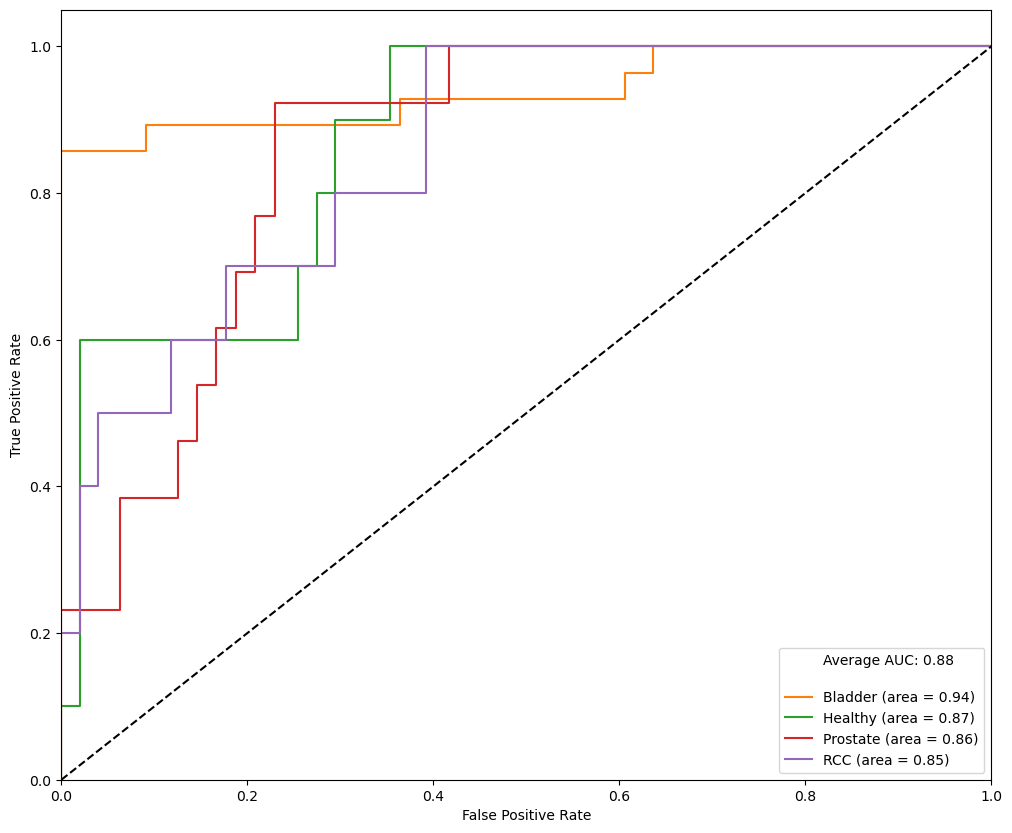

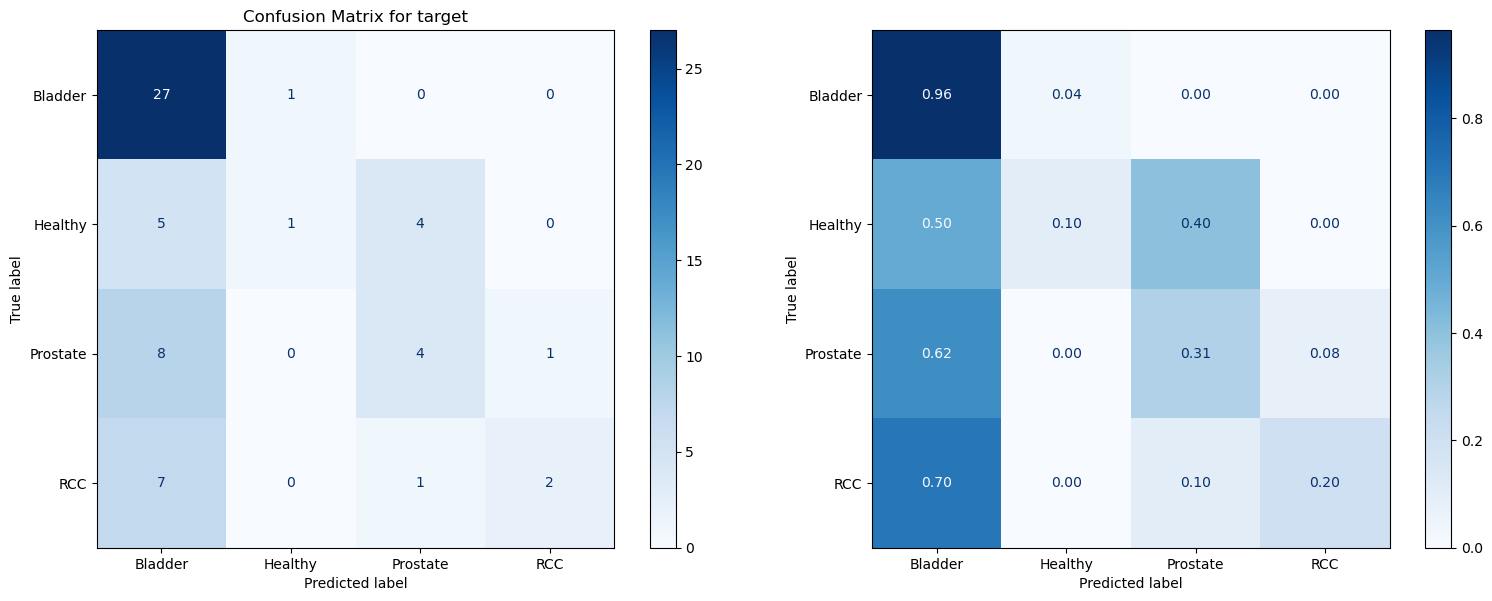

In [36]:
base_models = [model_CNA, model_Ratio, model_EndMotif]
train_dfs = [CNA_train_df, Ratio_train_df, EndMotif_train_df]
test_dfs = [CNA_test_df, Ratio_test_df, EndMotif_test_df]

meta_classifier = models.train_meta_classifier(base_models, train_dfs, test_dfs)

In [37]:
# from xgboost import XGBClassifier
# # Define your meta-classifier as XGBoost
# meta_classifier = XGBClassifier(random_state=0, n_estimators=100, learning_rate=0.1)

# Assuming base_models, train_dfs, and test_dfs are already defined
meta_classifier, y_meta_test_pred_decoded, y_meta_test = models.train_xgboost_meta_classifier(base_models, train_dfs, test_dfs)

# Output the true labels and the predicted labels
print("True labels:\n", y_meta_test.value_counts())
print("Predicted labels:\n", pd.Series(y_meta_test_pred_decoded).value_counts())

True labels:
 target
Bladder     28
Prostate    13
Healthy     10
RCC         10
Name: count, dtype: int64
Predicted labels:
 Bladder    33
RCC        24
Healthy     4
Name: count, dtype: int64


In [38]:
# model_CNA = models.train_model(CNA_train_df, CNA_test_df, model = RandomForestClassifier(random_state=0, n_estimators=2000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
# model_Ratio = models.train_model(Ratio_train_df, Ratio_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=2000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')
# model_EndMotif = models.train_model(EndMotif_train_df, EndMotif_test_df,  model = RandomForestClassifier(random_state=0, n_estimators=2000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid')



EndMotif_feature_importance = preprocessing.extract_feature_importances(model_EndMotif, EndMotif_train_df)

CNA_feature_importance = preprocessing.extract_feature_importances(model_CNA, CNA_train_df)

Ratio_feature_importance = preprocessing.extract_feature_importances(model_Ratio, Ratio_train_df)


In [39]:

print(EndMotif_feature_importance)

print(CNA_feature_importance)

print(Ratio_feature_importance)

           Feature  Importance
99   EndMotif_CGAT    0.015633
46   EndMotif_AGTG    0.012368
51   EndMotif_ATAT    0.011497
220  EndMotif_TCTA    0.010538
96   EndMotif_CGAA    0.010477
..             ...         ...
113  EndMotif_CTAC    0.000606
226  EndMotif_TGAG    0.000512
177  EndMotif_GTAC    0.000451
76   EndMotif_CATA    0.000370
237  EndMotif_TGTC    0.000331

[256 rows x 2 columns]
                                 Feature  Importance
299   CNA_chr8-CNA_59000001-CNA_60000000    0.008230
244   CNA_chr5-CNA_77000001-CNA_78000000    0.007971
177  CNA_chr20-CNA_54000001-CNA_55000000    0.007905
76   CNA_chr13-CNA_78000001-CNA_79000000    0.007885
141   CNA_chr2-CNA_67000001-CNA_68000000    0.007615
..                                   ...         ...
290     CNA_chr8-CNA_5000001-CNA_6000000    0.001228
59   CNA_chr12-CNA_65000001-CNA_66000000    0.001069
254     CNA_chr6-CNA_8000001-CNA_9000000    0.001030
234     CNA_chr5-CNA_3000001-CNA_4000000    0.000985
109    CNA_chr18-CNA_

In [40]:
feature_importances_dict = {
    'EndMotif': EndMotif_feature_importance,
    'CNA': CNA_feature_importance,
    'Ratio': Ratio_feature_importance
}

train_subset, test_subset = preprocessing.subset_top_k_features(train_df, test_df, k=256, feature_importances_dict=feature_importances_dict, target_name='target')

display(train_subset.head())
display(test_subset.head())

,EndMotif_AGGC,Ratio_chr8-Ratio_100000000-Ratio_105000000,CNA_chr14-CNA_87000001-CNA_88000000,CNA_chr8-CNA_60000001-CNA_61000000,CNA_chr16-CNA_79000001-CNA_80000000,Ratio_chr21-Ratio_35000000-Ratio_40000000,EndMotif_CTAC,EndMotif_CTTG,CNA_chr5-CNA_128000001-CNA_129000000,EndMotif_TTTT,...,Ratio_chr3-Ratio_70000000-Ratio_75000000,CNA_chr13-CNA_36000001-CNA_37000000,EndMotif_TCGC,EndMotif_ATTT,EndMotif_TGTC,CNA_chr8-CNA_79000001-CNA_80000000,EndMotif_ATGA,CNA_chr6-CNA_46000001-CNA_47000000,EndMotif_TTGC,target
PB-239_UC1,-0.105557,0.286320,-0.505536,-0.864244,-0.664482,0.121625,-0.661057,-0.803864,0.337180,0.755612,...,-0.183568,-0.341183,1.650153,-0.412455,-0.012686,-0.657260,-0.611035,-0.468051,1.603656,Prostate
PB-313_UC1,-0.150420,0.284742,-0.505537,-0.450200,-0.664483,-0.112104,-0.736390,-0.888012,-0.014061,0.749736,...,0.088347,-0.697417,-0.351287,-0.954779,0.995741,-0.657260,-0.445371,-0.468049,-1.442487,Prostate
RCC013_UC2,-0.267476,-0.059043,-0.505537,-0.864245,-0.664483,-0.075073,-0.101907,-0.225540,-0.800656,0.376297,...,0.275105,-0.697416,0.147260,-0.348986,-0.092117,-0.657259,0.020465,-0.468051,0.584250,RCC
PB-276_UC1,0.170423,-0.019661,-0.505536,-0.260738,0.880853,-0.102966,0.175907,0.516967,0.030640,-0.363000,...,0.142897,-0.274521,-0.632748,1.225266,-0.934270,-0.547059,0.607324,-0.468050,-0.414249,Prostate
WBC1206_UC1,-0.073230,0.094620,0.591758,0.327431,1.356976,-0.186129,-0.234610,0.404912,0.174685,1.053380,...,-0.701255,1.283060,0.217906,-0.687614,0.285762,1.008805,0.234200,-0.468050,0.239555,Bladder


,EndMotif_AGGC,Ratio_chr8-Ratio_100000000-Ratio_105000000,CNA_chr14-CNA_87000001-CNA_88000000,CNA_chr8-CNA_60000001-CNA_61000000,CNA_chr16-CNA_79000001-CNA_80000000,Ratio_chr21-Ratio_35000000-Ratio_40000000,EndMotif_CTAC,EndMotif_CTTG,CNA_chr5-CNA_128000001-CNA_129000000,EndMotif_TTTT,...,Ratio_chr3-Ratio_70000000-Ratio_75000000,CNA_chr13-CNA_36000001-CNA_37000000,EndMotif_TCGC,EndMotif_ATTT,EndMotif_TGTC,CNA_chr8-CNA_79000001-CNA_80000000,EndMotif_ATGA,CNA_chr6-CNA_46000001-CNA_47000000,EndMotif_TTGC,target
PB188_UC1,0.081759,-0.079040,-0.505537,-0.759306,-0.664481,-0.113552,-0.043950,0.143828,1.137426,-1.930120e-01,...,0.240934,-0.617512,-0.666766,0.583843,-0.420211,-0.657259,0.753038,-0.468049,-0.462467,Prostate
WBC1304_UC1,-0.412316,-0.055722,-0.021920,-0.329346,2.683207,-0.167769,-0.030919,0.588124,0.771880,-3.207963e-01,...,0.187868,1.911374,-0.626022,-0.748840,0.861415,0.619199,-0.452291,3.683208,-1.492070,Bladder
WBC1320_UC1,-0.778831,-0.101876,-0.505536,-0.864244,-0.664482,-0.039716,2.847188,0.534450,-0.800655,-1.108110e-01,...,0.051183,-0.697417,2.206456,2.593298,-0.931019,-0.657259,9.202618,-0.468050,4.573198,Bladder
WBC1243_UC1,0.176944,-0.003567,-0.505537,-0.864244,-0.664482,0.007317,0.076111,-0.045010,-0.800655,-4.703801e-07,...,-0.039237,-0.697417,0.072268,-0.416660,0.208023,-0.657259,0.077775,-0.468050,0.070313,Bladder
WBC1132_UC1,0.253984,-0.108121,-0.505537,-0.075905,-0.664482,-0.109149,0.086312,0.631715,-0.800655,-2.301509e-01,...,0.009264,-0.697416,-1.020618,0.238308,-0.051011,-0.657259,-0.424576,-0.468050,-0.686976,Bladder


Best hyperparameters found: {'C': 1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'lbfgs'}
Cross-validated Accuracy: 0.6759


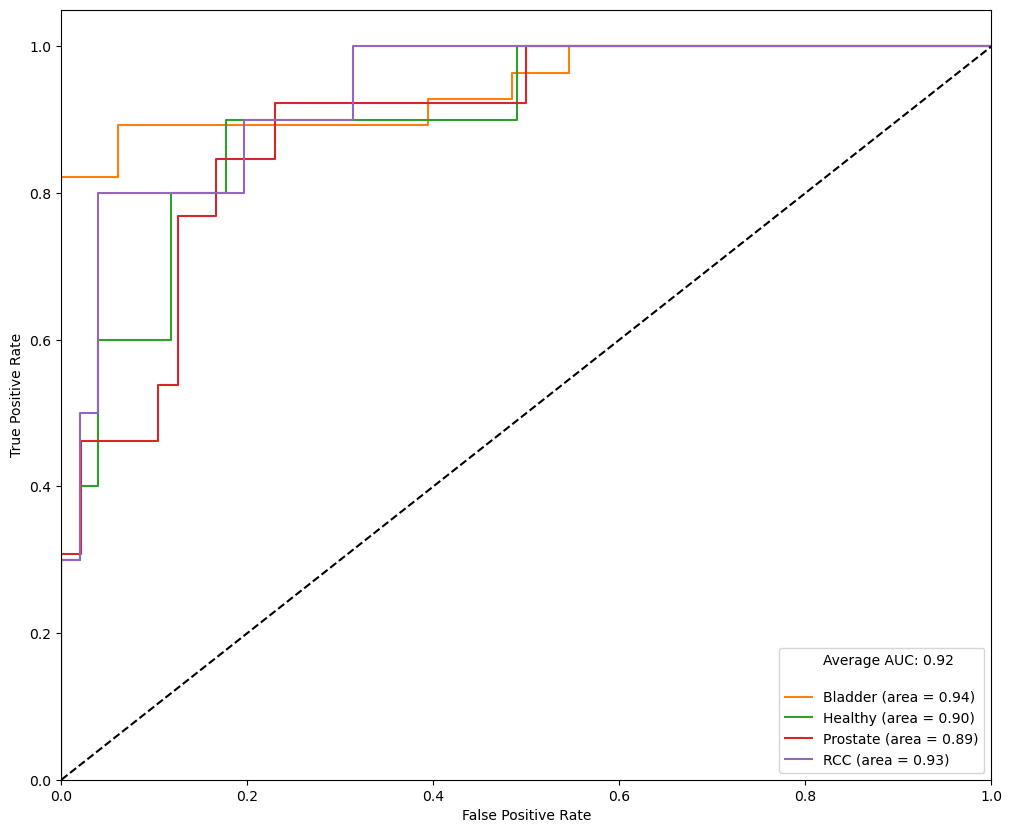

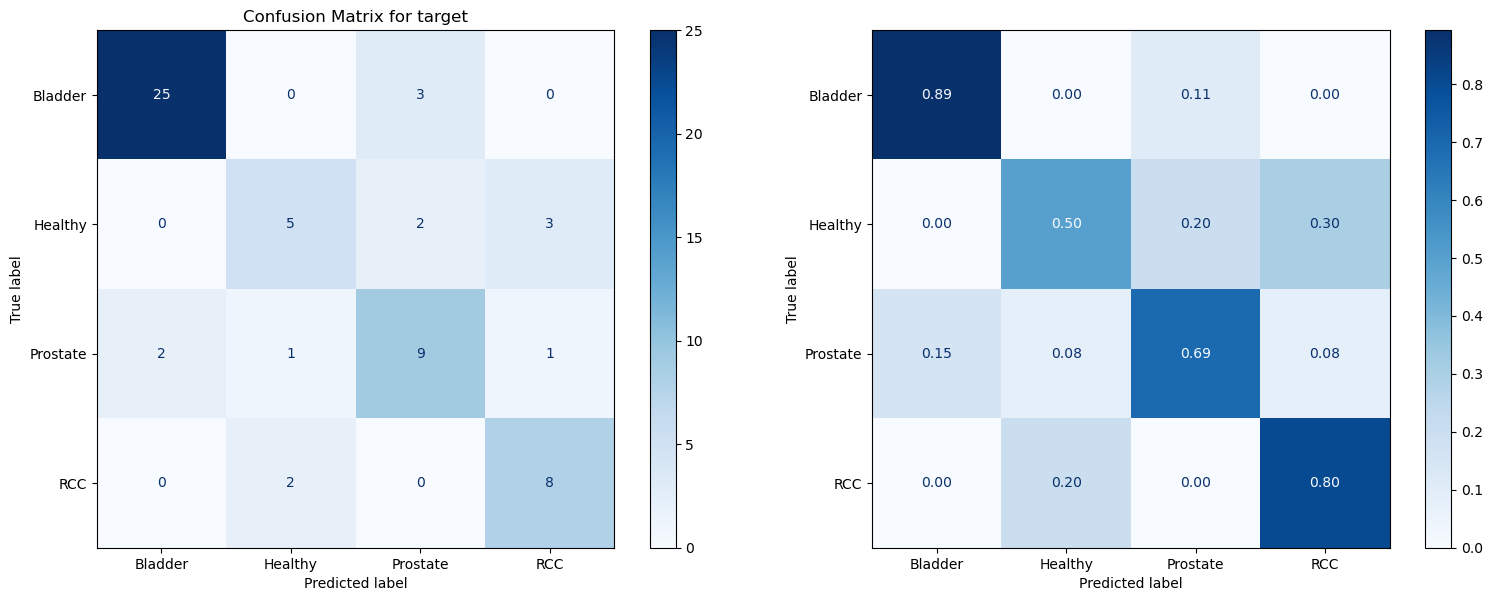

In [41]:
# Train with LogisticRegression and hyperparameter tuning using GridSearchCV
trained_log_reg_model = models.train_model(
        train_subset, 
        test_subset, 
        target_name='target', 
        model=LogisticRegression(random_state=0, class_weight='balanced'), 
        param_grid=param_grid_log_reg, 
        cv=5, 
        scoring='roc_auc_macro',
        search_method='grid',
        save_auc = Output_dir+'_/pan_fature_ROC'
)

In [42]:
# import joblib

# # Save the model to a file
# joblib.dump(trained_log_reg_model, Output_dir+'/trained_log_reg_model.pkl')

# train_df.to_csv(Output_dir+"/train_df.txt",sep='\t')
# test_df.to_csv(Output_dir+"/test_df.txt",sep='\t')
# train_subset.to_csv(Output_dir+"/train_subset.txt",sep='\t')
# test_subset.to_csv(Output_dir+"/train_subset.txt",sep='\t')

# LOOCV

In [43]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Load the Iris dataset
# iris = load_iris()

# # Create a DataFrame
# data_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
# data_iris['target'] = iris.target  # Add target column

# # Split the dataset into train and test sets
# iris_train_df, iris_test_df = train_test_split(data_iris, test_size=0.2, random_state=0, stratify=data_iris['target'])


# iris_dataset = models.combine_train_test(iris_train_df, iris_test_df)
# # Test the train_model_loocv function
# iris_model, iris_loocv_accuracy = models.train_model_loocv(iris_dataset, target_name='target')

# # Print the results
# print(f"Final model trained on train_df with LOOCV Accuracy: {iris_loocv_accuracy:.4f}")


In [44]:
# # Load the Breast Cancer dataset
# from sklearn.datasets import load_breast_cancer
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Load the Breast Cancer dataset
# breast = load_breast_cancer()

# # Create a DataFrame
# data_breast = pd.DataFrame(breast.data, columns=breast.feature_names)
# data_breast['target'] = breast.target  # Add target column

# # Replace numeric target with descriptive labels
# data_breast['target'] = data_breast['target'].map({0: 'malignant', 1: 'benign'})

# # Split the dataset into train and test sets
# breast_train_df, breast_test_df = train_test_split(data_breast, test_size=0.2, random_state=0, stratify=data_breast['target'])

# # Combine train and test sets for LOOCV
# breast_dataset = models.combine_train_test(breast_train_df, breast_test_df)

# # Test the train_model_loocv function
# breast_model, breast_loocv_accuracy = models.train_model_loocv(breast_dataset, target_name='target')

# # Print the results
# print(f"Final model trained on train_df with LOOCV Accuracy: {breast_loocv_accuracy:.4f}")


In [45]:
import pandas as pd

def subset_rows_by_target(df, target_values):
    """
    Subset rows of a DataFrame based on specific values in the 'target' column.

    Parameters:
    - df (pd.DataFrame): The DataFrame to subset.
    - target_values (list): A list of values to keep in the 'target' column.

    Returns:
    - pd.DataFrame: A new DataFrame with rows where 'target' is in target_values.
    """
    return df[df['target'].isin(target_values)]

# Example usage:
# data = {'target': ['Healthy', 'Bladder', 'Cancer', 'Healthy', 'Bladder'],
#         'value': [10, 20, 30, 40, 50]}
# df = pd.DataFrame(data)
# filtered_df = subset_rows_by_target(df, ['Healthy', 'Bladder'])
# print(filtered_df)


In [46]:


# Combine train and test sets for LOOCV
EndMotif_dataset = models.combine_train_test(EndMotif_train_df, EndMotif_test_df)

# Test the train_model_loocv function
#EndMotif_LOOCV_model, EndMotif_LOOCV_accuracy = 
_, _, EndMotif_LogReg_oof_df=models.train_model_loocv(EndMotif_dataset, target_name='target',model=LogisticRegression(random_state=0, class_weight='balanced'),save_figures_path=Output_dir+'_/LogReg_Endmotif_LOOCV_ROC', save_folder=Output_dir+'_/LogReg_Endmotif_LOOCV_ROC')

# Print the results
# print(f"Final model trained on train_df with LOOCV Accuracy: {EndMotif_LOOCV_accuracy:.4f}")

display(EndMotif_LogReg_oof_df.head())




LOOCV Accuracy: 0.7291


,True Label,Predicted Label,Probability_Bladder,Probability_Healthy,Probability_Prostate,Probability_RCC
Sample Index,,,,,,
PB-239_UC1,Prostate,Healthy,0.283192,0.566241,0.149124,0.001443
PB-313_UC1,Prostate,RCC,0.142759,0.073712,0.074910,0.708618
RCC013_UC2,RCC,RCC,0.187904,0.012184,0.196823,0.603088
PB-276_UC1,Prostate,Prostate,0.007261,0.001511,0.981322,0.009906
WBC1206_UC1,Bladder,Bladder,0.999142,0.000656,0.000180,0.000022


<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [47]:
# Test the train_model_loocv function
models.train_model_loocv(EndMotif_dataset, target_name='target',model=RandomForestClassifier(random_state=0,n_estimators=2000, class_weight='balanced'),save_figures_path=Output_dir+'_/RF_Endmotif_LOOCV_ROC', save_folder=Output_dir+'_/RF_Endmotif_LOOCV_ROC')



/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

LOOCV Accuracy: 0.6256


(RandomForestClassifier(class_weight='balanced', n_estimators=2000,
                        random_state=0),
 0.625615763546798,
              True Label Predicted Label  Probability_Bladder  \
 Sample Index                                                   
 PB-239_UC1     Prostate         Bladder               0.4260   
 PB-313_UC1     Prostate         Bladder               0.5675   
 RCC013_UC2          RCC         Bladder               0.4400   
 PB-276_UC1     Prostate        Prostate               0.1310   
 WBC1206_UC1     Bladder         Bladder               0.7255   
 ...                 ...             ...                  ...   
 BC016_UC1       Bladder         Bladder               0.8080   
 PB-196_UC1     Prostate        Prostate               0.2860   
 81              Healthy         Healthy               0.1505   
 RCC004_UC2          RCC         Healthy               0.1295   
 WBC1133_UC1     Bladder         Bladder               0.5765   
 
               Probabili

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [48]:
models.train_model_loocv(EndMotif_dataset, target_name='target',
    model=SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, class_weight='balanced'), 
    save_figures_path=Output_dir+'_/SVM_EndMotif_LOOCV_ROC', 
    save_folder=Output_dir+'_/SVM_EndMotif_LOOCV_ROC')

LOOCV Accuracy: 0.5714


(SVC(class_weight='balanced', probability=True),
 0.5714285714285714,
              True Label Predicted Label  Probability_Bladder  \
 Sample Index                                                   
 PB-239_UC1     Prostate        Prostate             0.427967   
 PB-313_UC1     Prostate         Bladder             0.697530   
 RCC013_UC2          RCC             RCC             0.316872   
 PB-276_UC1     Prostate        Prostate             0.105507   
 WBC1206_UC1     Bladder         Bladder             0.783694   
 ...                 ...             ...                  ...   
 BC016_UC1       Bladder         Bladder             0.903850   
 PB-196_UC1     Prostate        Prostate             0.295279   
 81              Healthy         Healthy             0.067672   
 RCC004_UC2          RCC         Healthy             0.052562   
 WBC1133_UC1     Bladder         Bladder             0.651619   
 
               Probability_Healthy  Probability_Prostate  Probability_RCC  
 Sample

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [49]:
Ratio_dataset = models.combine_train_test(Ratio_train_df, Ratio_test_df)
# Test the train_model_loocv function
_, _, Ratio_LogReg_oof_df = models.train_model_loocv(Ratio_dataset, target_name='target',model=LogisticRegression(random_state=0, class_weight='balanced'),save_figures_path=Output_dir+'_/LogReg_Ratio_LOOCV_ROC', save_folder=Output_dir+'_/LogReg_Ratio_LOOCV_ROC')

# Print the results
#print(f"Final model trained on train_df with LOOCV Accuracy: {Ratio_LOOCV_accuracy:.4f}")

LOOCV Accuracy: 0.4581


<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [50]:
models.train_model_loocv(Ratio_dataset, target_name='target',model=RandomForestClassifier(random_state=0,n_estimators=2000, class_weight='balanced'),save_figures_path=Output_dir+'_/RF_Ratio_LOOCV_ROC', save_folder=Output_dir+'_/RF_Ratio_LOOCV_ROC')


LOOCV Accuracy: 0.5369


(RandomForestClassifier(class_weight='balanced', n_estimators=2000,
                        random_state=0),
 0.5369458128078818,
              True Label Predicted Label  Probability_Bladder  \
 Sample Index                                                   
 PB-239_UC1     Prostate         Bladder               0.5835   
 PB-313_UC1     Prostate         Bladder               0.5975   
 RCC013_UC2          RCC         Bladder               0.3430   
 PB-276_UC1     Prostate             RCC               0.2450   
 WBC1206_UC1     Bladder         Bladder               0.5710   
 ...                 ...             ...                  ...   
 BC016_UC1       Bladder         Bladder               0.3505   
 PB-196_UC1     Prostate        Prostate               0.2075   
 81              Healthy         Healthy               0.3505   
 RCC004_UC2          RCC         Bladder               0.3670   
 WBC1133_UC1     Bladder         Bladder               0.6450   
 
               Probabil

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [51]:
models.train_model_loocv(Ratio_dataset, target_name='target',
    model=SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, class_weight='balanced'), 
    save_figures_path=Output_dir+'_/SVM_Ratio_LOOCV_ROC', 
    save_folder=Output_dir+'_/SVM_Ratio_LOOCV_ROC')

LOOCV Accuracy: 0.2167


(SVC(class_weight='balanced', probability=True),
 0.21674876847290642,
              True Label Predicted Label  Probability_Bladder  \
 Sample Index                                                   
 PB-239_UC1     Prostate             RCC             0.495731   
 PB-313_UC1     Prostate         Bladder             0.448190   
 RCC013_UC2          RCC             RCC             0.473548   
 PB-276_UC1     Prostate             RCC             0.452225   
 WBC1206_UC1     Bladder             RCC             0.449621   
 ...                 ...             ...                  ...   
 BC016_UC1       Bladder             RCC             0.443984   
 PB-196_UC1     Prostate             RCC             0.468371   
 81              Healthy             RCC             0.470465   
 RCC004_UC2          RCC             RCC             0.480712   
 WBC1133_UC1     Bladder             RCC             0.454056   
 
               Probability_Healthy  Probability_Prostate  Probability_RCC  
 Sampl

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [52]:
Arm_file = '/Users/irf3irf3/Desktop/offline_workspace/Jessica/R code for bladder vs. healthy models/arm_z_wide.tsv'

Arm_df = pd.read_csv(Arm_file, sep='\t')
Arm_df = Arm_df.set_index('library')
Arm_df.rename(columns={'cohort': 'target'}, inplace=True)
Arm_df = Arm_df[Arm_df['split'].isin(['testing', 'training'])]
Arm_df.index.name = None
Arm_df = Arm_df.drop(columns=['split'])
print(Arm_df.shape)
display(Arm_df.head())

(203, 39)


,target,chr1_p,chr1_q,chr10_p,chr10_q,chr11_p,chr11_q,chr12_p,chr12_q,chr13_q,...,chr5_p,chr5_q,chr6_p,chr6_q,chr7_p,chr7_q,chr8_p,chr8_q,chr9_p,chr9_q
58,Healthy,0.500638,0.481548,-0.410989,0.848811,-0.218577,0.824577,0.649369,-0.405411,0.029293,...,-0.263070,-0.191412,0.609609,-0.420965,-0.786807,-0.330025,-0.402745,-0.713632,-0.284287,0.108390
73,Healthy,-1.083426,-1.220784,0.459364,0.366229,1.666293,-0.584459,0.152188,-0.704706,0.642475,...,1.484744,-0.756864,-1.000383,1.054155,0.408653,1.292797,0.072355,0.748582,0.807086,0.277831
74,Healthy,-0.420803,0.051099,1.188064,-0.764085,-0.576497,-2.138650,-0.094162,-0.353201,0.220072,...,-0.125466,0.630959,0.631229,0.197558,0.130784,-0.146538,-0.379365,0.138085,0.162191,-0.578078
81,Healthy,-1.398996,1.308646,-0.794303,0.732416,3.011589,1.921797,-1.770148,-0.809331,0.325861,...,1.979131,-0.189816,-2.545631,1.817232,1.264974,2.246687,1.569387,1.580092,0.393157,0.338279
83,Healthy,-0.033880,0.633287,-0.678556,0.435361,0.383254,0.720053,0.868606,-0.358796,0.112183,...,0.986982,2.086188,0.603034,0.294714,0.672683,0.055100,-1.005939,0.745358,0.468220,-0.347326


In [53]:
train_Arm_df = Arm_df.loc[EndMotif_train_df.index]
test_Arm_df = Arm_df.loc[EndMotif_test_df.index]

In [54]:
train_Arm_df.head()

,target,chr1_p,chr1_q,chr10_p,chr10_q,chr11_p,chr11_q,chr12_p,chr12_q,chr13_q,...,chr5_p,chr5_q,chr6_p,chr6_q,chr7_p,chr7_q,chr8_p,chr8_q,chr9_p,chr9_q
PB-239_UC1,Prostate,0.395912,0.084472,0.991147,-0.558419,-0.820959,-0.506717,0.751183,0.999640,-0.335369,...,-0.197527,0.960184,1.123298,-0.333888,-0.377407,-0.424558,-0.192892,-0.512019,-0.372708,0.001615
PB-313_UC1,Prostate,1.746834,1.419477,1.777188,1.111027,-0.140450,0.189469,-0.222863,0.241000,-2.521236,...,-0.776267,0.079301,0.939728,-2.477857,2.395976,1.169761,0.536479,-1.630026,-1.636916,1.299319
RCC013_UC2,RCC,-0.186499,-0.002612,0.141360,-0.561717,-0.099356,-0.128605,0.567616,0.366596,0.041231,...,0.135967,0.514409,0.431152,0.404718,0.182106,0.062694,0.489958,0.444744,0.367659,-0.138455
PB-276_UC1,Prostate,-0.227455,-0.612089,3.464421,8.532234,-0.910559,-0.043903,0.166407,-0.414537,-0.225221,...,-0.338094,-0.854964,-0.078576,-0.610783,0.370088,0.683710,-1.676101,-1.106191,-0.253420,0.234429
WBC1206_UC1,Bladder,0.243719,0.565629,-2.110266,-4.039961,0.299883,1.154417,-0.568041,-1.634742,0.333342,...,2.198721,-0.376270,-0.416295,-0.376649,1.410362,-0.035462,-0.704297,3.509128,-0.674680,0.380309


In [55]:
print(EndMotif_train_df.shape)
print(EndMotif_test_df.shape)
EndMotif_train_df.head()#, EndMotif_test_df

(142, 257)
(61, 257)


,EndMotif_AAAA,EndMotif_AAAC,EndMotif_AAAG,EndMotif_AAAT,EndMotif_AACA,EndMotif_AACC,EndMotif_AACG,EndMotif_AACT,EndMotif_AAGA,EndMotif_AAGC,...,EndMotif_TTCT,EndMotif_TTGA,EndMotif_TTGC,EndMotif_TTGG,EndMotif_TTGT,EndMotif_TTTA,EndMotif_TTTC,EndMotif_TTTG,EndMotif_TTTT,target
PB-239_UC1,0.181216,-0.220420,-0.742860,-0.496816,-0.023397,0.867226,1.658317,0.037385,-0.050250,0.114759,...,0.814944,1.337263,1.603656,1.506599,1.402876,0.371878,0.713188,1.032038,0.755612,Prostate
PB-313_UC1,1.205527,-0.198503,-0.265584,-0.420027,1.610842,0.462894,-1.416194,-0.672767,0.355304,-1.144913,...,-0.456051,-1.468181,-1.442487,-0.824880,-0.548748,-0.942561,-1.373168,-1.598712,0.749736,Prostate
RCC013_UC2,0.285944,-0.142912,0.498993,-0.243929,-0.458092,-0.364940,0.412530,-0.386885,0.801981,0.360776,...,0.681972,0.437633,0.584250,0.475660,0.526173,0.228439,0.650224,0.554093,0.376297,RCC
PB-276_UC1,-0.218743,1.008185,0.515303,1.171091,1.155498,1.131669,-0.004493,1.303444,0.460291,0.228054,...,0.533453,-0.158562,-0.414249,-0.069308,0.085248,0.672944,0.220867,0.114180,-0.363000,Prostate
WBC1206_UC1,1.006391,-0.605221,-0.698392,-0.049018,-0.176601,-1.208643,0.380541,-0.639033,2.254814,0.437643,...,2.385980,0.762182,0.239555,-0.150900,1.323597,1.370349,0.639580,0.479573,1.053380,Bladder


Best hyperparameters found: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Cross-validated Accuracy: 0.5635


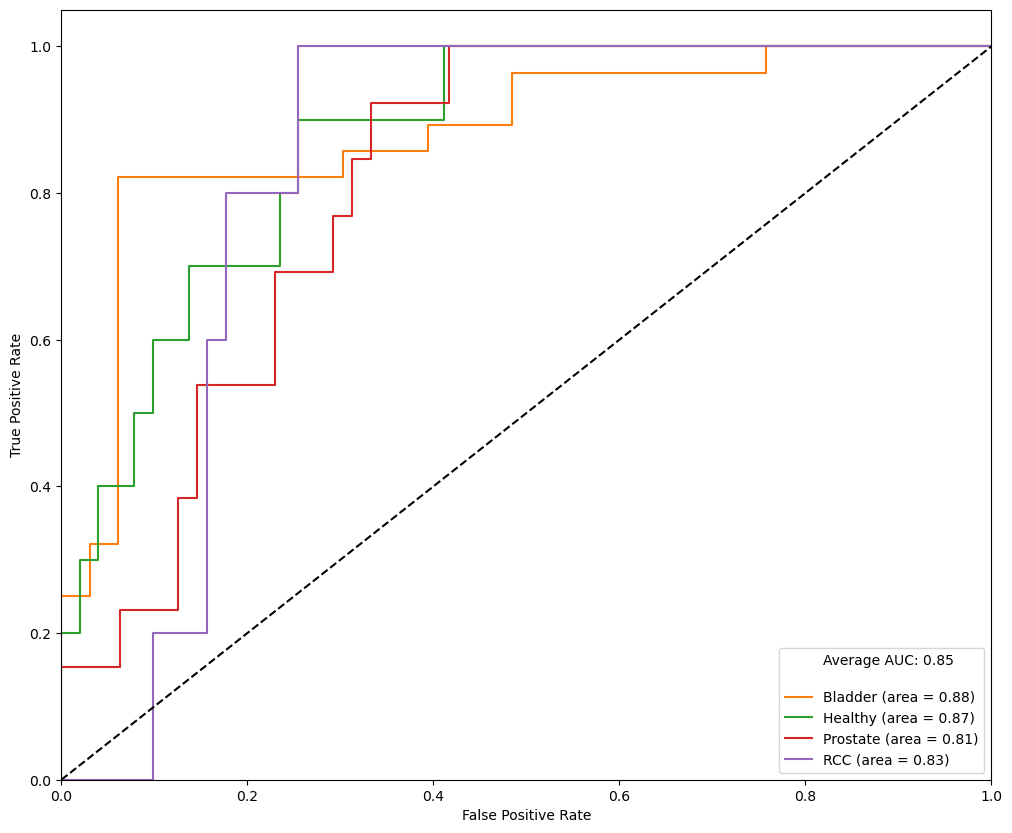

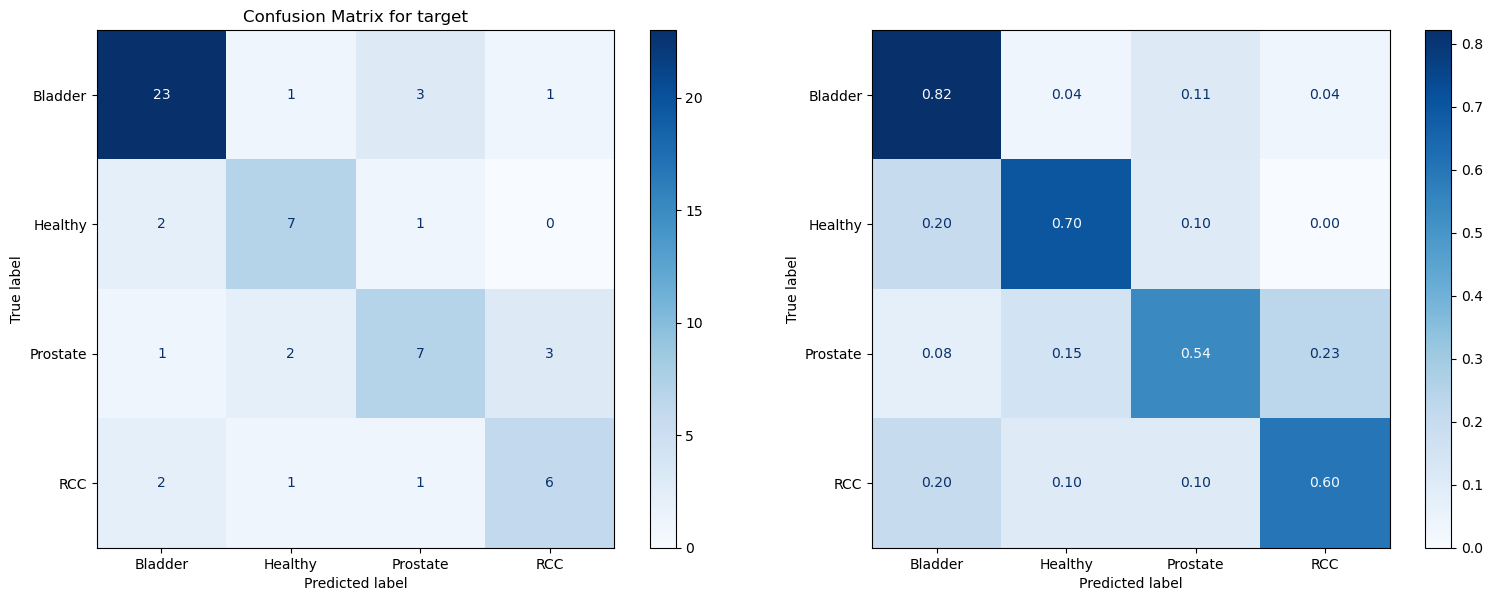

SVC(C=100, class_weight='balanced', gamma=0.01, probability=True,
    random_state=0)

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [56]:
models.train_model(
    train_Arm_df, test_Arm_df,
    target_name='target', 
    model=SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=0), 
    param_grid=param_grid_svm,  # Ensure you define param_grid for SVM
    cv=5, 
    search_method='grid',
    save_figures_path=Output_dir+'_/SVC_Arm_ROC', 
    save_folder=Output_dir+'_/SVC_Arm_ROC'
)

Best hyperparameters found: {'C': 1, 'l1_ratio': 0.5, 'max_iter': 200, 'penalty': 'elasticnet', 'solver': 'saga'}
Cross-validated Accuracy: 0.6044


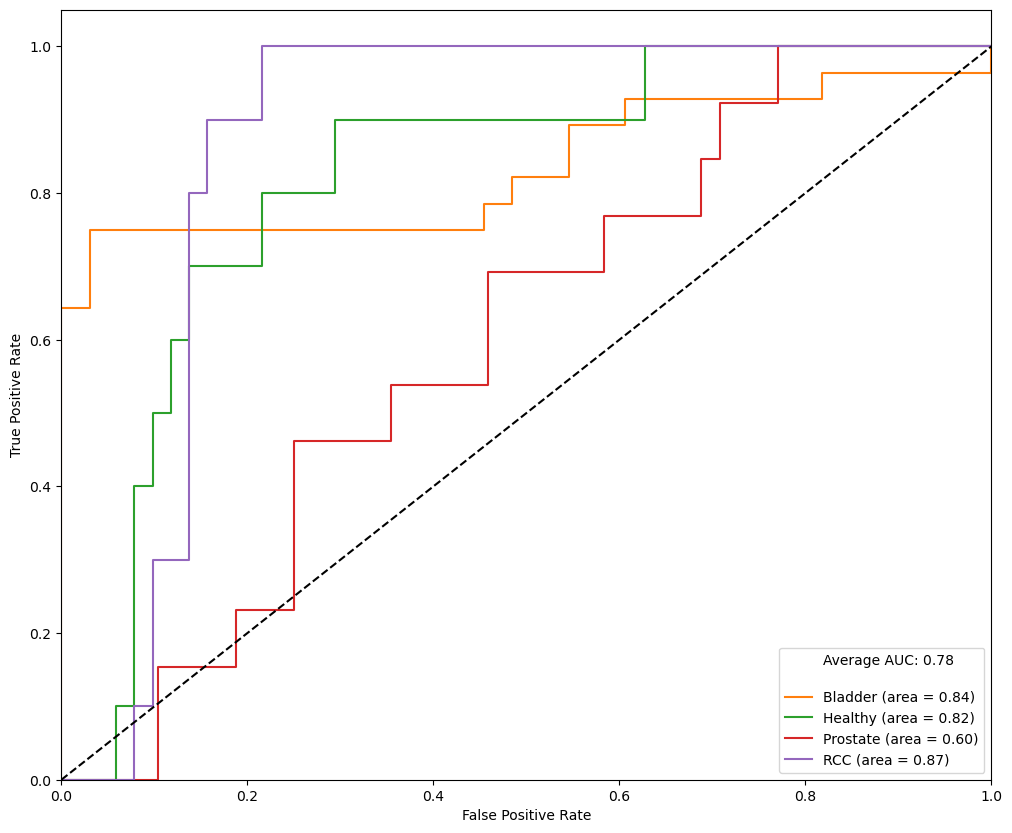

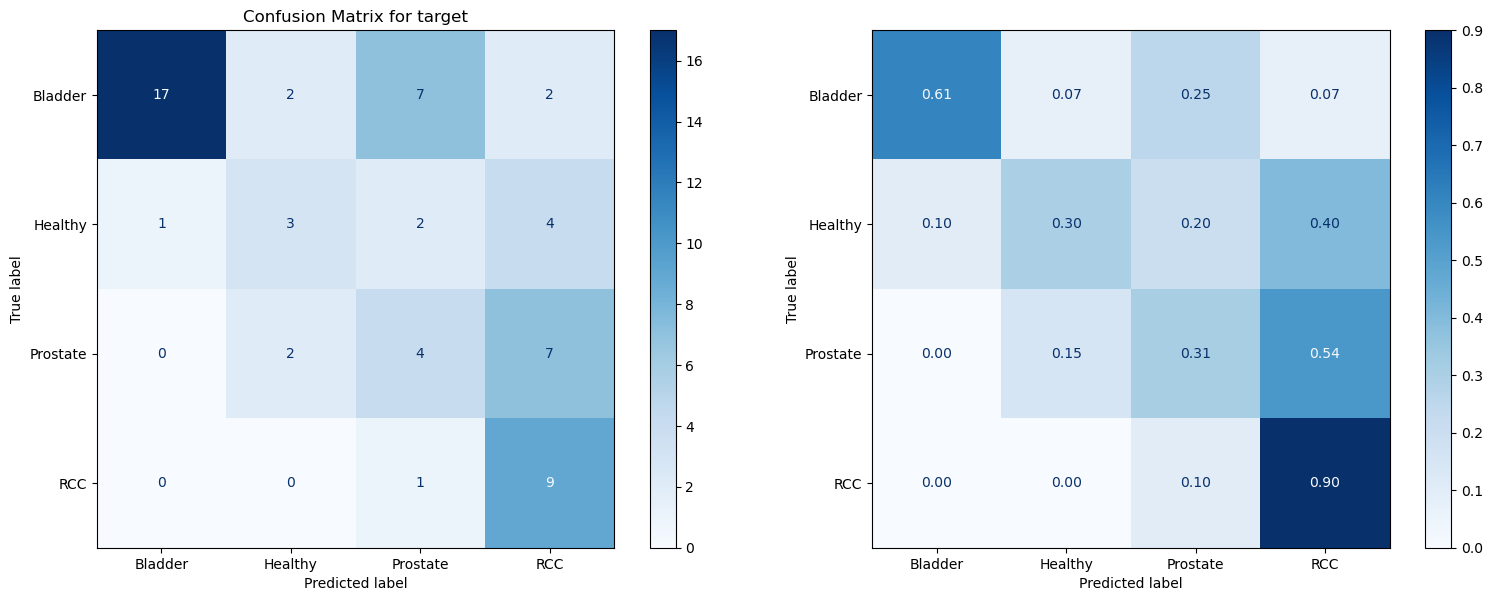

LogisticRegression(C=1, class_weight='balanced', l1_ratio=0.5, max_iter=200,
                   penalty='elasticnet', random_state=0, solver='saga')

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [57]:
models.train_model(train_Arm_df, test_Arm_df, model=LogisticRegression(random_state=0, class_weight='balanced'), 
            param_grid=param_grid_log_reg, 
            cv=5, 
   
            search_method='grid',
            save_figures_path=Output_dir+'_/Log_reg_Arm_ROC', 
            save_folder=Output_dir+'_/Log_reg_Arm_ROC'
                   
                  )

Best hyperparameters found: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 5000}
Cross-validated Accuracy: 0.5768


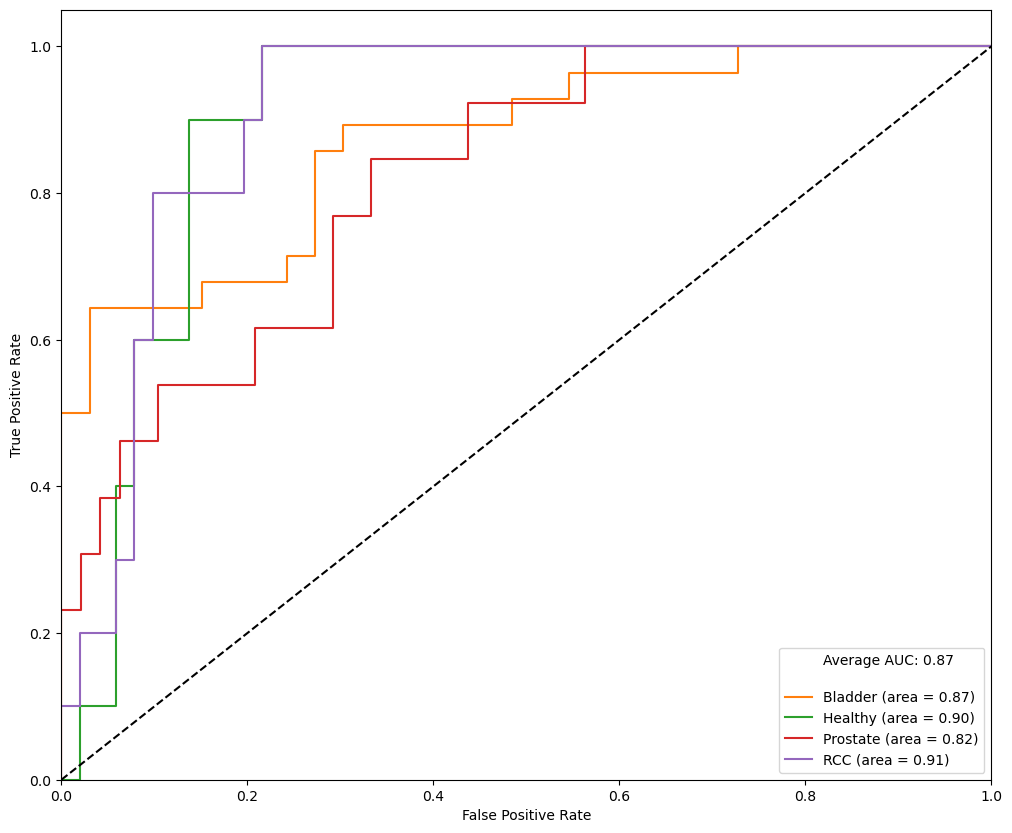

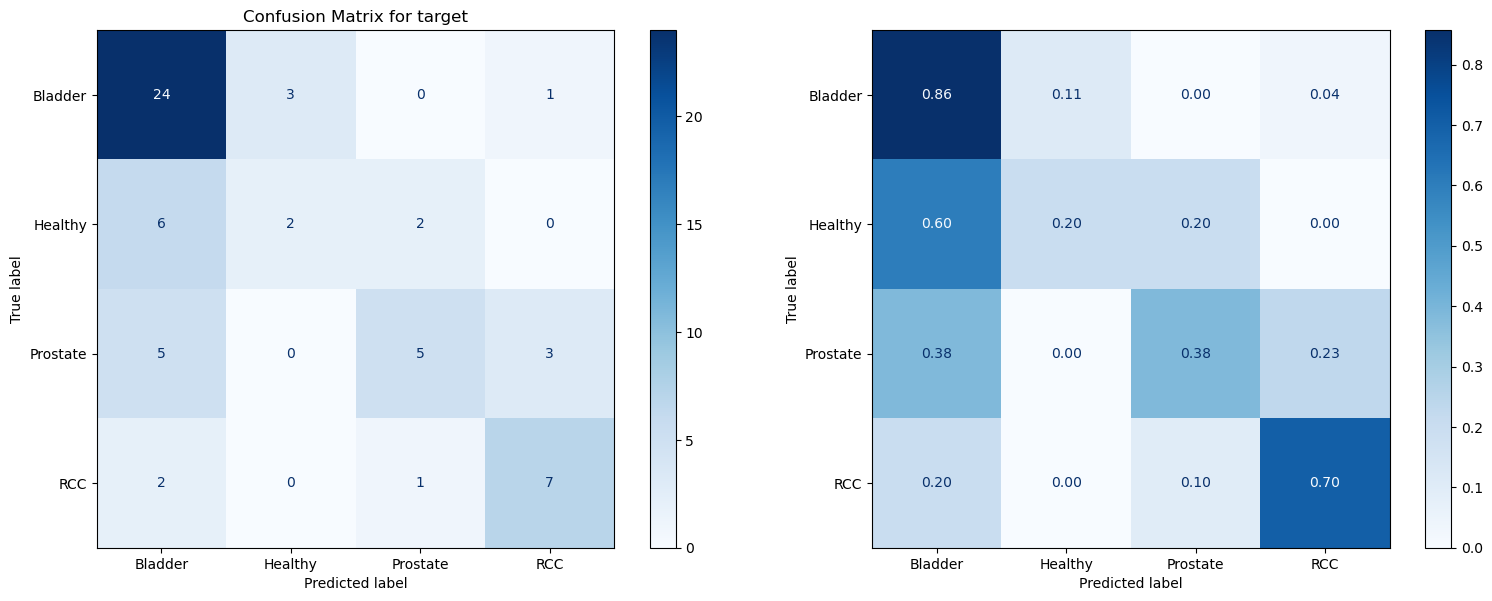

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=5000,
                       random_state=0)

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [58]:
models.train_model(train_Arm_df, test_Arm_df, model = RandomForestClassifier(random_state=0, n_estimators=2000, class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='roc_auc_micro', search_method='grid',
                save_figures_path=Output_dir+'_/RF_Arm_ROC', 
                save_folder=Output_dir+'_/RF_Arm_ROC')





In [59]:
# Test the train_model_loocv function
_, _, Arm_LogReg_oof_df= models.train_model_loocv(Arm_df, target_name='target',model=LogisticRegression(random_state=0, class_weight='balanced'), save_figures_path=Output_dir+'_/LogReg_Arm_LOOCV_ROC', save_folder=Output_dir+'_/LogReg_Arm_LOOCV_ROC')

# Print the results
#print(f"Final model trained on train_df with LOOCV Accuracy: {Arm_LOOCV_accuracy:.4f}")

LOOCV Accuracy: 0.6059


<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [60]:
models.train_model_loocv(Arm_df, target_name='target',model=RandomForestClassifier(random_state=0,n_estimators=2000, class_weight='balanced'), save_figures_path=Output_dir+'_/RF_Arm_LOOCV_ROC', save_folder=Output_dir+'_/RF_Arm_LOOCV_ROC')


/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/irf3irf3/miniconda3/envs/myenv/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

LOOCV Accuracy: 0.5911


(RandomForestClassifier(class_weight='balanced', n_estimators=2000,
                        random_state=0),
 0.5911330049261084,
              True Label Predicted Label  Probability_Bladder  \
 Sample Index                                                   
 58              Healthy         Healthy               0.2030   
 73              Healthy         Healthy               0.2370   
 74              Healthy         Bladder               0.4950   
 81              Healthy         Bladder               0.3305   
 83              Healthy             RCC               0.2835   
 ...                 ...             ...                  ...   
 WBC1315_UC1     Bladder         Bladder               0.8615   
 WBC1317_UC1     Bladder         Bladder               0.7600   
 WBC1320_UC1     Bladder         Bladder               0.5370   
 WBC1322_UC1     Bladder         Bladder               0.4770   
 WBC1324_UC1     Bladder         Bladder               0.4660   
 
               Probabil

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [61]:
models.train_model_loocv(
    Arm_df, 
    target_name='target',
    model=SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, class_weight='balanced'), 
    save_figures_path=Output_dir+'_/SVM_Arm_LOOCV_ROC', 
    save_folder=Output_dir+'_/SVM_Arm_LOOCV_ROC'
)

LOOCV Accuracy: 0.4089


(SVC(class_weight='balanced', probability=True),
 0.4088669950738916,
              True Label Predicted Label  Probability_Bladder  \
 Sample Index                                                   
 58              Healthy         Healthy             0.274154   
 73              Healthy             RCC             0.272943   
 74              Healthy         Healthy             0.307169   
 81              Healthy             RCC             0.352679   
 83              Healthy             RCC             0.273117   
 ...                 ...             ...                  ...   
 WBC1315_UC1     Bladder         Bladder             0.971484   
 WBC1317_UC1     Bladder             RCC             0.770423   
 WBC1320_UC1     Bladder         Healthy             0.322153   
 WBC1322_UC1     Bladder        Prostate             0.854966   
 WBC1324_UC1     Bladder             RCC             0.281503   
 
               Probability_Healthy  Probability_Prostate  Probability_RCC  
 Sample

<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

# XGDB meta classifier

In [62]:
display(Arm_LogReg_oof_df.head())
display(EndMotif_LogReg_oof_df.head())
display(Ratio_LogReg_oof_df.head())

,True Label,Predicted Label,Probability_Bladder,Probability_Healthy,Probability_Prostate,Probability_RCC
Sample Index,,,,,,
58,Healthy,Healthy,0.025869,0.857580,0.052903,0.063648
73,Healthy,Healthy,0.054531,0.673529,0.249540,0.022400
74,Healthy,Healthy,0.155330,0.430239,0.151402,0.263029
81,Healthy,Healthy,0.321257,0.637552,0.037191,0.004000
83,Healthy,RCC,0.056773,0.159118,0.177600,0.606510


,True Label,Predicted Label,Probability_Bladder,Probability_Healthy,Probability_Prostate,Probability_RCC
Sample Index,,,,,,
PB-239_UC1,Prostate,Healthy,0.283192,0.566241,0.149124,0.001443
PB-313_UC1,Prostate,RCC,0.142759,0.073712,0.074910,0.708618
RCC013_UC2,RCC,RCC,0.187904,0.012184,0.196823,0.603088
PB-276_UC1,Prostate,Prostate,0.007261,0.001511,0.981322,0.009906
WBC1206_UC1,Bladder,Bladder,0.999142,0.000656,0.000180,0.000022


,True Label,Predicted Label,Probability_Bladder,Probability_Healthy,Probability_Prostate,Probability_RCC
Sample Index,,,,,,
PB-239_UC1,Prostate,Bladder,0.666995,0.157117,0.039473,0.136416
PB-313_UC1,Prostate,Bladder,0.942269,0.003833,0.007775,0.046123
RCC013_UC2,RCC,Bladder,0.378107,0.287324,0.191264,0.143305
PB-276_UC1,Prostate,Prostate,0.127136,0.272285,0.390387,0.210192
WBC1206_UC1,Bladder,RCC,0.432065,0.028466,0.032268,0.507201


In [63]:
# Creating copies with prefixed column names
Arm_LogReg_oof_prefix = Arm_LogReg_oof_df.add_prefix("Arm_").copy()
EndMotif_LogReg_oof_prefix = EndMotif_LogReg_oof_df.add_prefix("EndMotif_").copy()
Ratio_LogReg_oof_prefix = Ratio_LogReg_oof_df.add_prefix("Ratio_").copy()

# Concatenating and reindexing
AllLogReg_predictions = pd.concat([Arm_LogReg_oof_prefix, EndMotif_LogReg_oof_prefix, Ratio_LogReg_oof_prefix], axis=1).reindex(Arm_LogReg_oof_prefix.index)


AllLogReg_predictions = AllLogReg_predictions.drop(columns=['Arm_Predicted Label','EndMotif_True Label','EndMotif_Predicted Label','Ratio_True Label','Ratio_Predicted Label'], errors='ignore')

AllLogReg_predictions = AllLogReg_predictions.rename(columns={'Arm_True Label':'target'})
display(AllLogReg_predictions.head())
print(AllLogReg_predictions.shape)
print(Ratio_LogReg_oof_df.shape)

,target,Arm_Probability_Bladder,Arm_Probability_Healthy,Arm_Probability_Prostate,Arm_Probability_RCC,EndMotif_Probability_Bladder,EndMotif_Probability_Healthy,EndMotif_Probability_Prostate,EndMotif_Probability_RCC,Ratio_Probability_Bladder,Ratio_Probability_Healthy,Ratio_Probability_Prostate,Ratio_Probability_RCC
Sample Index,,,,,,,,,,,,,
58,Healthy,0.025869,0.857580,0.052903,0.063648,3.507316e-02,0.157234,5.755335e-01,0.232159,0.034331,0.233665,0.267173,0.464831
73,Healthy,0.054531,0.673529,0.249540,0.022400,3.469783e-02,0.777401,6.749950e-04,0.187227,0.009134,0.766547,0.128938,0.095381
74,Healthy,0.155330,0.430239,0.151402,0.263029,7.471935e-03,0.484905,2.963782e-01,0.211244,0.131799,0.069240,0.290667,0.508294
81,Healthy,0.321257,0.637552,0.037191,0.004000,6.968824e-03,0.524522,2.506631e-03,0.466002,0.128015,0.498412,0.163373,0.210200
83,Healthy,0.056773,0.159118,0.177600,0.606510,2.908269e-18,0.000094,5.107378e-13,0.999906,0.282648,0.105119,0.269208,0.343025


(203, 13)
(203, 6)


In [64]:
from xgboost import XGBClassifier
_,_,_=models.train_model_loocv_xgb(
    AllLogReg_predictions, 
    target_name='target',
    model=XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss'),
    save_figures_path=Output_dir+'_/XGB_AllThree_LOOCV_ROC',
    save_folder=Output_dir+'_/XGB_AllThree_LOOCV_ROC'
)

LOOCV Accuracy: 0.7143


<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [65]:

columns_to_drop = [col for col in AllLogReg_predictions.columns if col.startswith('Ratio_')]
End_Arm_LogReg_predictions = AllLogReg_predictions.drop(columns=columns_to_drop)
display(End_Arm_LogReg_predictions.head())
print(End_Arm_LogReg_predictions.shape)

,target,Arm_Probability_Bladder,Arm_Probability_Healthy,Arm_Probability_Prostate,Arm_Probability_RCC,EndMotif_Probability_Bladder,EndMotif_Probability_Healthy,EndMotif_Probability_Prostate,EndMotif_Probability_RCC
Sample Index,,,,,,,,,
58,Healthy,0.025869,0.857580,0.052903,0.063648,3.507316e-02,0.157234,5.755335e-01,0.232159
73,Healthy,0.054531,0.673529,0.249540,0.022400,3.469783e-02,0.777401,6.749950e-04,0.187227
74,Healthy,0.155330,0.430239,0.151402,0.263029,7.471935e-03,0.484905,2.963782e-01,0.211244
81,Healthy,0.321257,0.637552,0.037191,0.004000,6.968824e-03,0.524522,2.506631e-03,0.466002
83,Healthy,0.056773,0.159118,0.177600,0.606510,2.908269e-18,0.000094,5.107378e-13,0.999906


(203, 9)


In [66]:
_,_,_ = models.train_model_loocv_xgb(
    End_Arm_LogReg_predictions, 
    target_name='target',
    model=XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss'),
    save_figures_path=Output_dir+'_/XGB_End_Arm_LOOCV_ROC',
    save_folder=Output_dir+'_/XGB_End_Arm_LOOCV_ROC'
)

LOOCV Accuracy: 0.6897


<Figure size 1200x1000 with 0 Axes>

<Figure size 1600x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

## Methylation

In [67]:
Methylation_file = '/Users/irf3irf3/Desktop/offline_workspace/data/Fragma_post_processing/Fragma_Ready_fragma_all_combined_all_files_zeroCols_17/Fragma_Ready_fragma_all_combined_all_files_zeroCols_17.txt_MLready.txt'
Methylation = pd.read_csv(Methylation_file, sep= '\t',index_col = 0)
display(Methylation.head())

,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1324_UC1,WBC1324_UC2,WBC1324_UC3,WBC1324_UC4,WBC1324_UC5,WBC1325_UC2,WBC1325_UC3,WBC1325_UC4,WBC1325_UC5,WBC1325_UC5b
chr1,0.626002,0.654504,0.645899,0.627955,0.622958,0.617221,0.689909,0.634675,0.634377,0.646275,...,0.674772,0.644341,0.687726,0.659194,0.623645,0.558710,0.745681,0.605728,0.696986,0.707744
chr10,0.637852,0.696757,0.744109,0.669921,0.497885,0.670195,0.604813,0.632781,0.716436,0.617620,...,0.653220,0.660110,0.660005,0.635586,0.742245,0.636713,0.695690,0.597674,0.546090,0.624558
chr11,0.622373,0.600044,0.700232,0.730766,0.693530,0.658466,0.668572,0.680544,0.717314,0.670539,...,0.652941,0.745586,0.690002,0.626425,0.602448,0.562023,0.623370,0.662643,0.598797,0.689188
chr12,0.632227,0.700886,0.631206,0.680546,0.695113,0.701478,0.701054,0.663275,0.649167,0.635321,...,0.626524,0.696376,0.647632,0.629690,0.697862,0.652204,0.638225,0.642166,0.732959,0.609866
chr13,0.754300,0.577800,0.619875,0.610532,0.710550,0.597664,0.560604,0.672094,0.600517,0.619344,...,0.724589,0.537723,0.628761,0.726064,0.698412,0.645931,0.670404,0.696611,0.680675,0.641121


In [68]:

Methylation_common_columns = Methylation.columns.intersection(common_columns_list)
Methylation = Methylation[Methylation_common_columns]
print(Methylation.shape)
display(Methylation.head())

(22, 200)


,58,73,74,81,83,BC001_UC1,BC002_UC1,BC003_UC1,BC004_UC1,BC005_UC1,...,WBC1310_UC1,WBC1311_UC1,WBC1312_UC1,WBC1313_UC1,WBC1314_UC1,WBC1315_UC1,WBC1317_UC1,WBC1320_UC1,WBC1322_UC1,WBC1324_UC1
chr1,0.626002,0.654504,0.645899,0.627955,0.622958,0.617221,0.689909,0.634675,0.634377,0.646275,...,0.627756,0.596927,0.608523,0.591306,0.632004,0.599523,0.590578,0.615560,0.572568,0.674772
chr10,0.637852,0.696757,0.744109,0.669921,0.497885,0.670195,0.604813,0.632781,0.716436,0.617620,...,0.688129,0.592434,0.634793,0.573678,0.596365,0.569548,0.617074,0.589912,0.568651,0.653220
chr11,0.622373,0.600044,0.700232,0.730766,0.693530,0.658466,0.668572,0.680544,0.717314,0.670539,...,0.647330,0.594878,0.618971,0.585010,0.635118,0.766693,0.602695,0.620386,0.572970,0.652941
chr12,0.632227,0.700886,0.631206,0.680546,0.695113,0.701478,0.701054,0.663275,0.649167,0.635321,...,0.654624,0.637357,0.635153,0.612067,0.644051,0.568339,0.651475,0.616313,0.582004,0.626524
chr13,0.754300,0.577800,0.619875,0.610532,0.710550,0.597664,0.560604,0.672094,0.600517,0.619344,...,0.606511,0.587114,0.602784,0.601576,0.597085,0.764866,0.598971,0.627099,0.557631,0.724589


In [69]:
print(Methylation_common_columns.tolist())

['58', '73', '74', '81', '83', 'BC001_UC1', 'BC002_UC1', 'BC003_UC1', 'BC004_UC1', 'BC005_UC1', 'BC006_UC1', 'BC008_UC1', 'BC009_UC1', 'BC010_UC1', 'BC011_UC1', 'BC014_UC1', 'BC015_UC1', 'BC016_UC1', 'BC017_UC1', 'BC018_UC1', 'BC019_UC1', 'BC020_UC1', 'BC021_UC1', 'BC022_UC1', 'BC023_UC1', 'BC024_UC1', 'BC026_UC1', 'BC027_UC1', 'BC028_UC1', 'BC029_UC1', 'NU102', 'NU103', 'NU10', 'NU13', 'NU15', 'NU16', 'NU18', 'NU19', 'NU1', 'NU24', 'NU2', 'NU31', 'NU33', 'NU36', 'NU37', 'NU39', 'NU3', 'NU55', 'NU5', 'NU68', 'NU69', 'NU70', 'NU71', 'NU74', 'NU75', 'NU83', 'NU90', 'NU97', 'Nu21', 'PB-162_UC1', 'PB-177_UC1', 'PB-196_UC1', 'PB-198_UC1', 'PB-209_UC1', 'PB-226_UC1', 'PB-239_UC1', 'PB-270_UC1', 'PB-276_UC1', 'PB-278_UC1', 'PB-280_UC1', 'PB-284_UC1', 'PB-305_UC1', 'PB-306_UC1', 'PB-313_UC1', 'PB-324_UC1', 'PB-365_UC1', 'PB-377_UC1', 'PB-394_UC1', 'PB-397_UC1', 'PB032_UC1', 'PB046_UC1', 'PB056_UC1', 'PB069_UC1', 'PB108_UC1', 'PB132_UC1', 'PB142_UC1', 'PB163_UC1', 'PB165_UC1', 'PB188_UC1', 'PB2

In [70]:
Methylation = preprocessing.preprocess_dataframe(Methylation)
display(Methylation.head())

,chr1,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,...,chr21,chr22,chr3,chr4,chr5,chr6,chr7,chr8,chr9,target
58,0.626002,0.637852,0.622373,0.632227,0.754300,0.601061,0.720729,0.672309,0.720660,0.756882,...,0.733641,0.718638,0.703512,0.653409,0.645972,0.757365,0.696335,0.708875,0.770840,Healthy
73,0.654504,0.696757,0.600044,0.700886,0.577800,0.656390,0.670892,0.765984,0.773346,0.876692,...,0.659926,0.615818,0.537919,0.567699,0.626610,0.674951,0.554877,0.691914,0.732863,Healthy
74,0.645899,0.744109,0.700232,0.631206,0.619875,0.696472,0.685865,0.647475,0.674811,0.623273,...,0.685175,0.616344,0.755423,0.543333,0.699782,0.718097,0.627712,0.776353,0.698205,Healthy
81,0.627955,0.669921,0.730766,0.680546,0.610532,0.749924,0.583591,0.722228,0.630313,0.599595,...,0.392803,0.576716,0.646839,0.571958,0.671794,0.706148,0.689300,0.640409,0.485234,Healthy
83,0.622958,0.497885,0.693530,0.695113,0.710550,0.626908,0.756601,0.520546,0.610087,0.755221,...,0.642508,0.411527,0.542681,0.532845,0.605013,0.571313,0.772285,0.566798,0.320135,Healthy


In [71]:
Methylation_standardized = preprocessing.standardize_dataframe(Methylation)
display(Methylation_standardized.head())

,chr1,chr10,chr11,chr12,chr13,chr14,chr15,chr16,chr17,chr18,...,chr21,chr22,chr3,chr4,chr5,chr6,chr7,chr8,chr9,target
58,-0.297325,-0.140159,-0.334051,-0.237338,1.335498,-0.700279,0.771343,0.311983,1.460927,0.920472,...,0.684214,0.887266,0.972624,0.096815,-0.050792,1.814613,0.983252,1.115975,1.528756,Healthy
73,0.372377,0.939708,-0.692864,1.031928,-0.939400,0.115331,0.197559,1.662663,2.485839,1.867215,...,0.081070,-0.151035,-1.802492,-1.252203,-0.371368,0.420365,-1.743268,0.854762,1.056667,Healthy
74,0.170198,1.807773,0.917125,-0.256218,-0.397098,0.706175,0.369938,-0.046099,0.569001,-0.135307,...,0.287657,-0.145716,1.842582,-1.635714,0.840106,1.150289,-0.339423,2.155165,0.625831,Healthy
81,-0.251417,0.447727,1.407802,0.655902,-0.517517,1.494112,-0.807572,1.031753,-0.296632,-0.322410,...,-2.104547,-0.545892,0.022869,-1.185169,0.376726,0.948139,0.847647,0.061563,-2.021626,Healthy
83,-0.368831,-2.706091,0.809425,0.925208,0.771612,-0.319261,1.184354,-1.876245,-0.690104,0.907350,...,-0.061447,-2.214008,-1.722686,-1.800791,-0.728940,-1.332923,2.447122,-1.072076,-4.073969,Healthy


LOOCV Accuracy: 0.4100


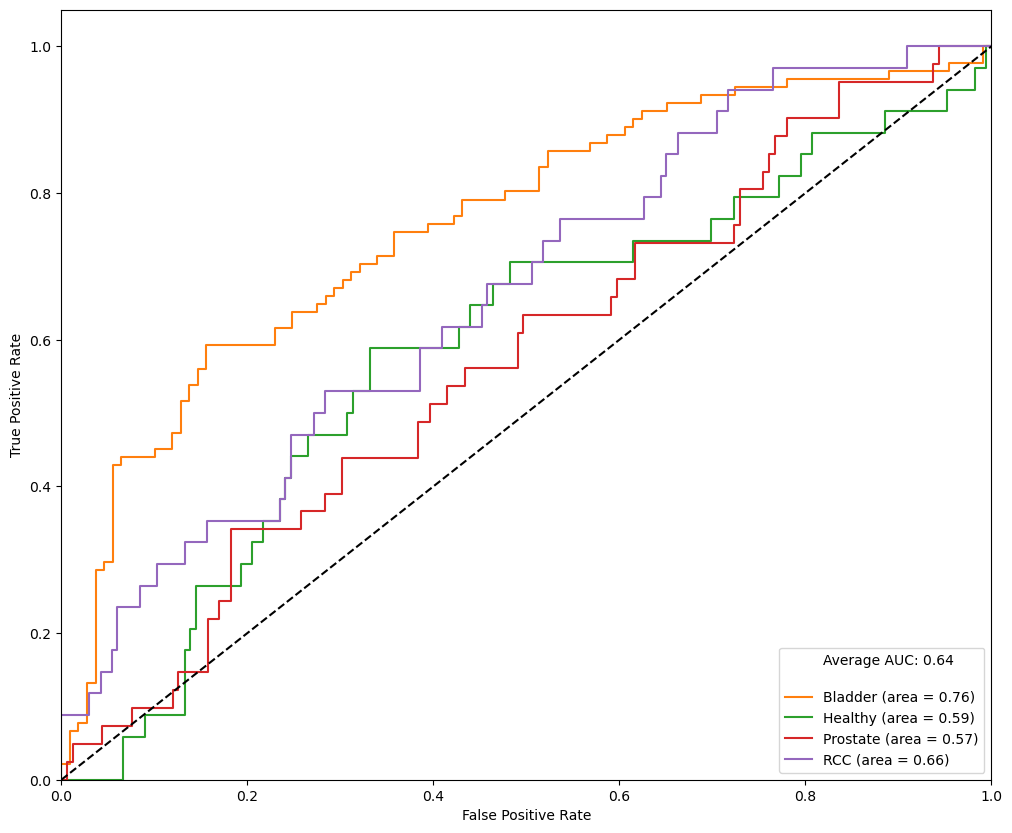

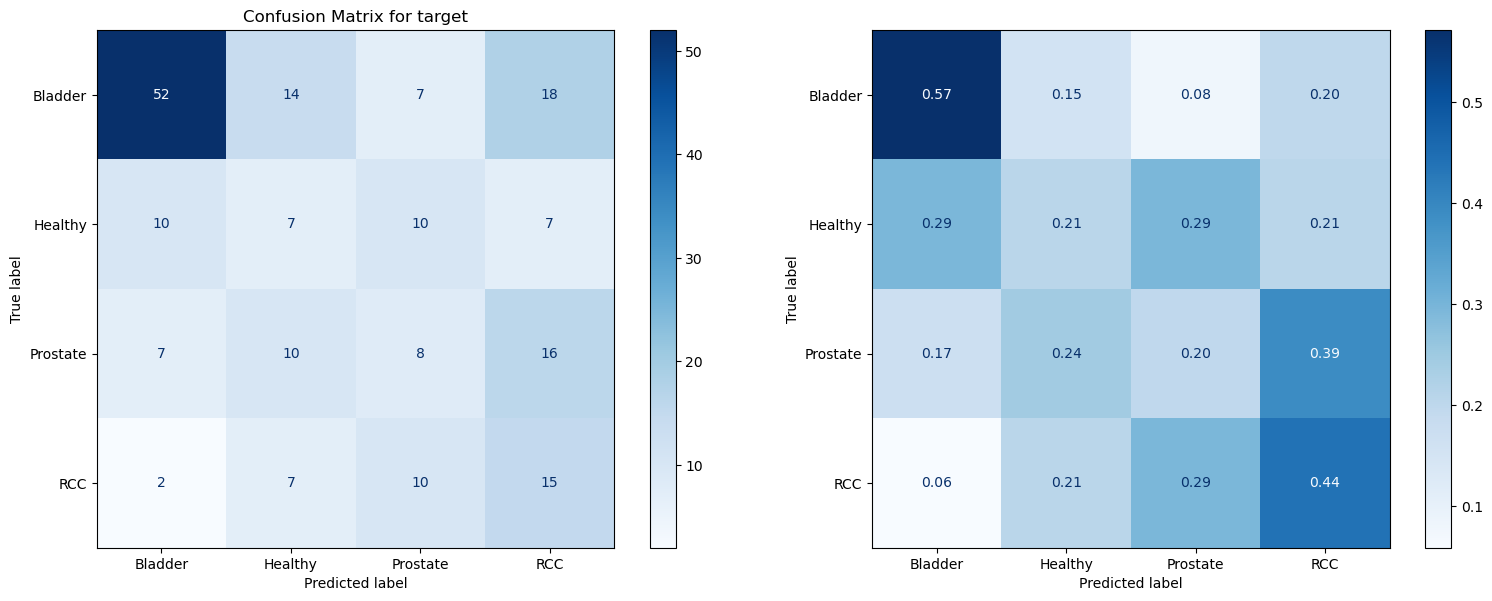

In [73]:
# Test the train_model_loocv function
_,_,_ = models.train_model_loocv(Methylation, target_name='target',model=LogisticRegression(random_state=0, class_weight='balanced')) 

# Print the results
#print(f"Final model trained on train_df with LOOCV Accuracy: {Methylation_LOOCV_accuracy:.4f}")

LOOCV Accuracy: 0.3850


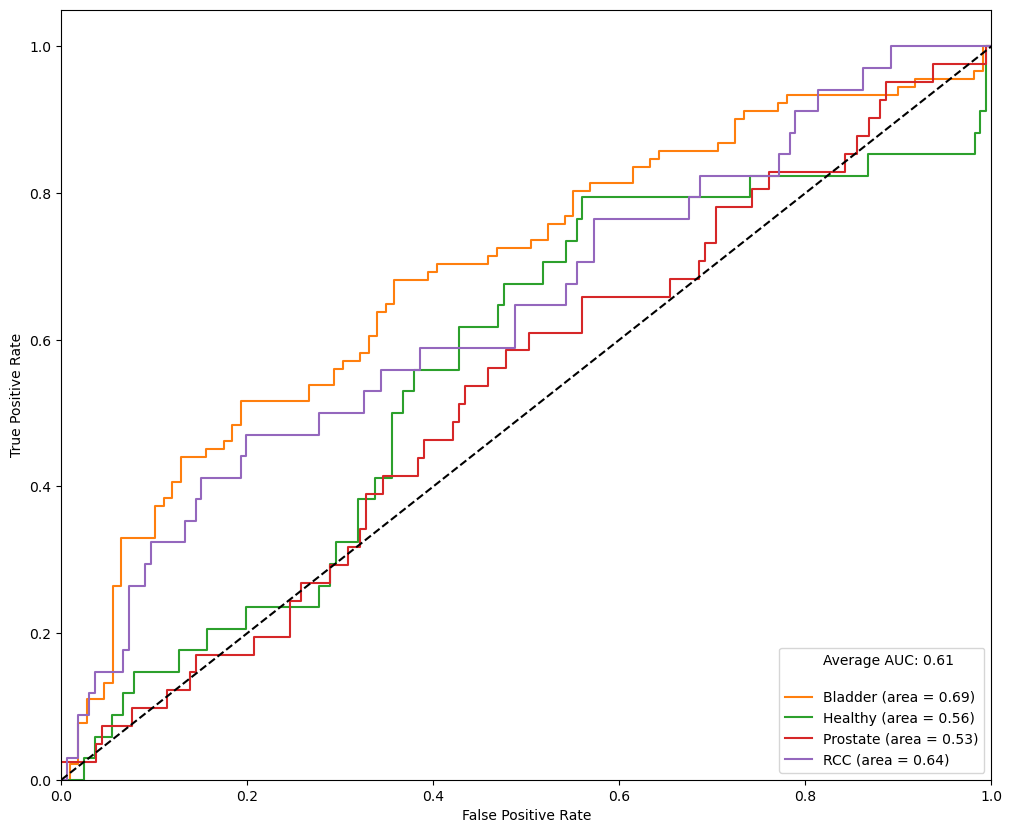

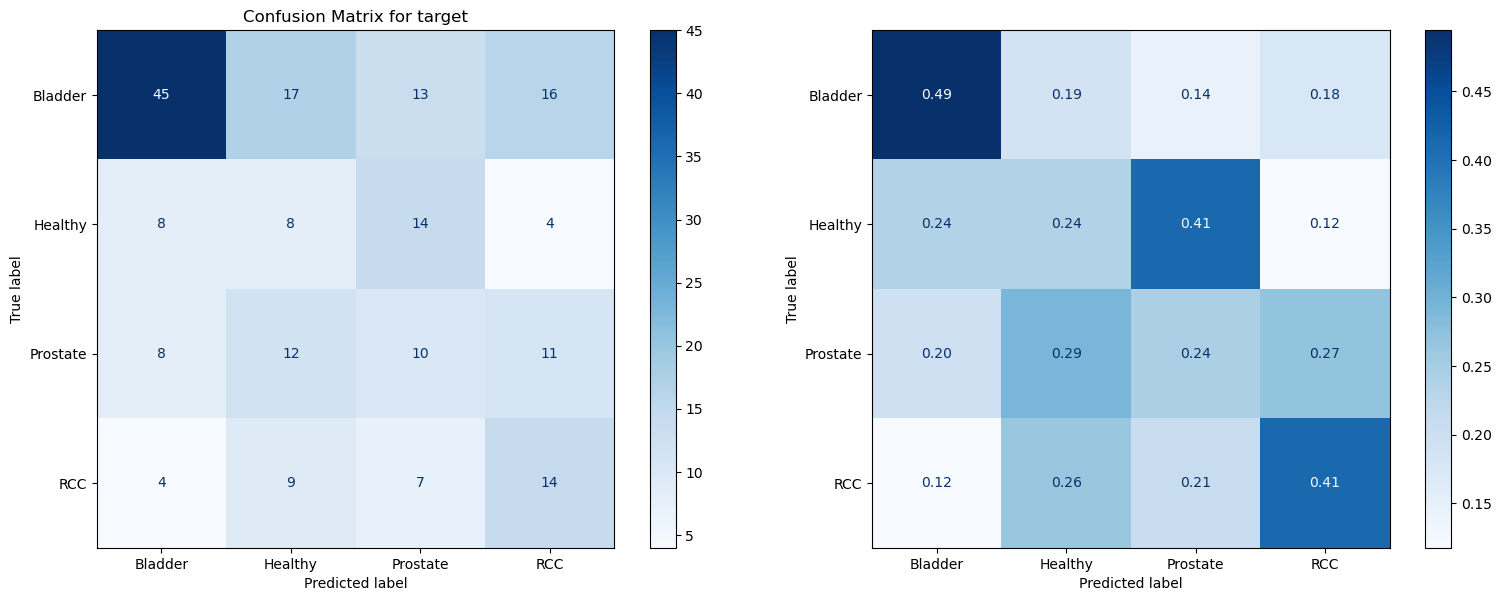

In [75]:
# Test the train_model_loocv function
_, _,_ = models.train_model_loocv(Methylation_standardized, target_name='target',model=LogisticRegression(random_state=0, class_weight='balanced')) 

# Print the results
#print(f"Final model trained on train_df with LOOCV Accuracy: {Methylation_standardized_LOOCV_accuracy:.4f}")

# Binary: Bladder vs Healthy

In [76]:
target_values = ['Bladder','Healthy']

LOOCV Accuracy: 0.9291


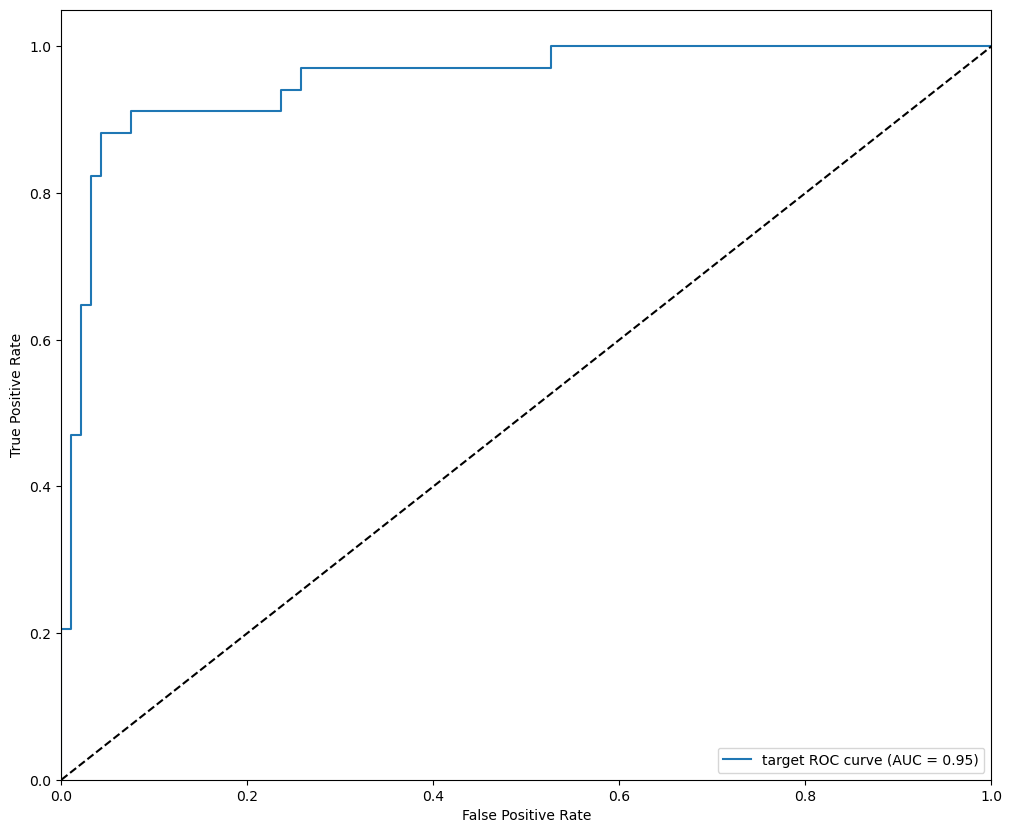

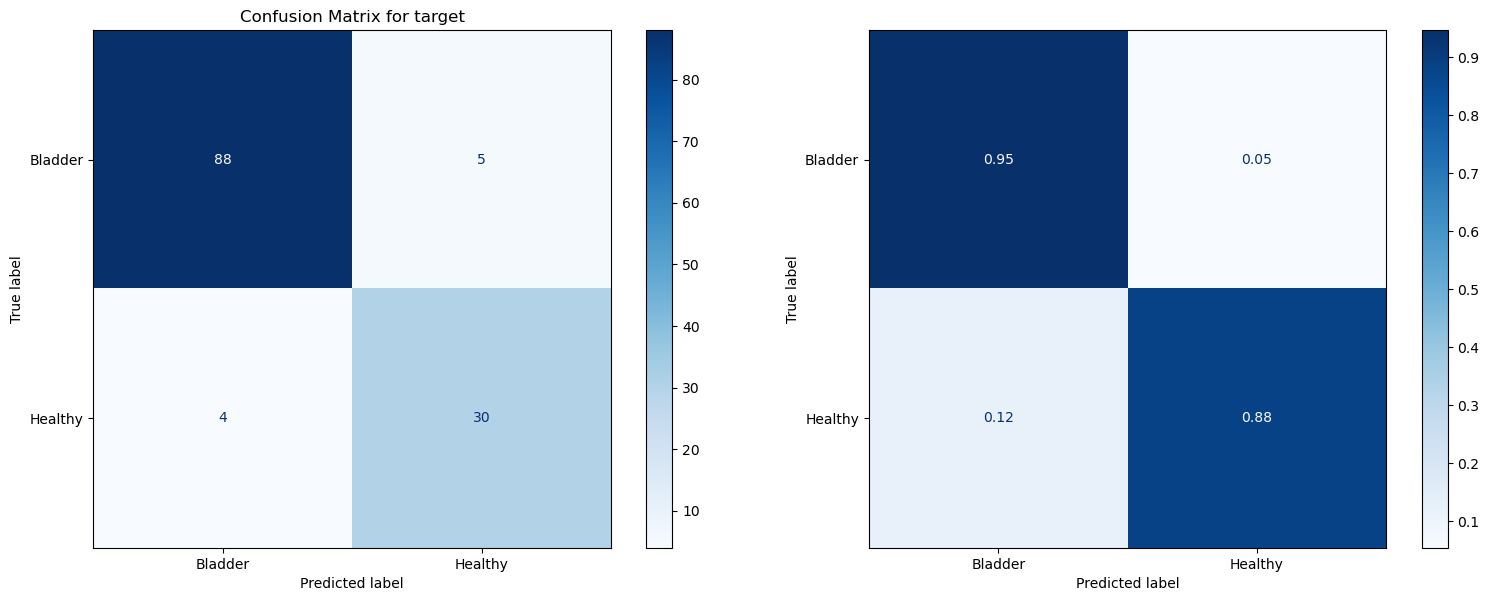

Final model trained on train_df with LOOCV Accuracy: 0.9291


In [78]:
# Combine train and test sets for LOOCV
EndMotif_dataset_binary = subset_rows_by_target(EndMotif_dataset, target_values)

# Test the train_model_loocv function
EndMotif_binary_LOOCV_model, EndMotif_binary_LOOCV_accuracy,_ = models.train_model_loocv(EndMotif_dataset_binary, target_name='target',model=LogisticRegression(random_state=0, class_weight='balanced'))

# Print the results
print(f"Final model trained on train_df with LOOCV Accuracy: {EndMotif_binary_LOOCV_accuracy:.4f}")

LOOCV Accuracy: 0.7795


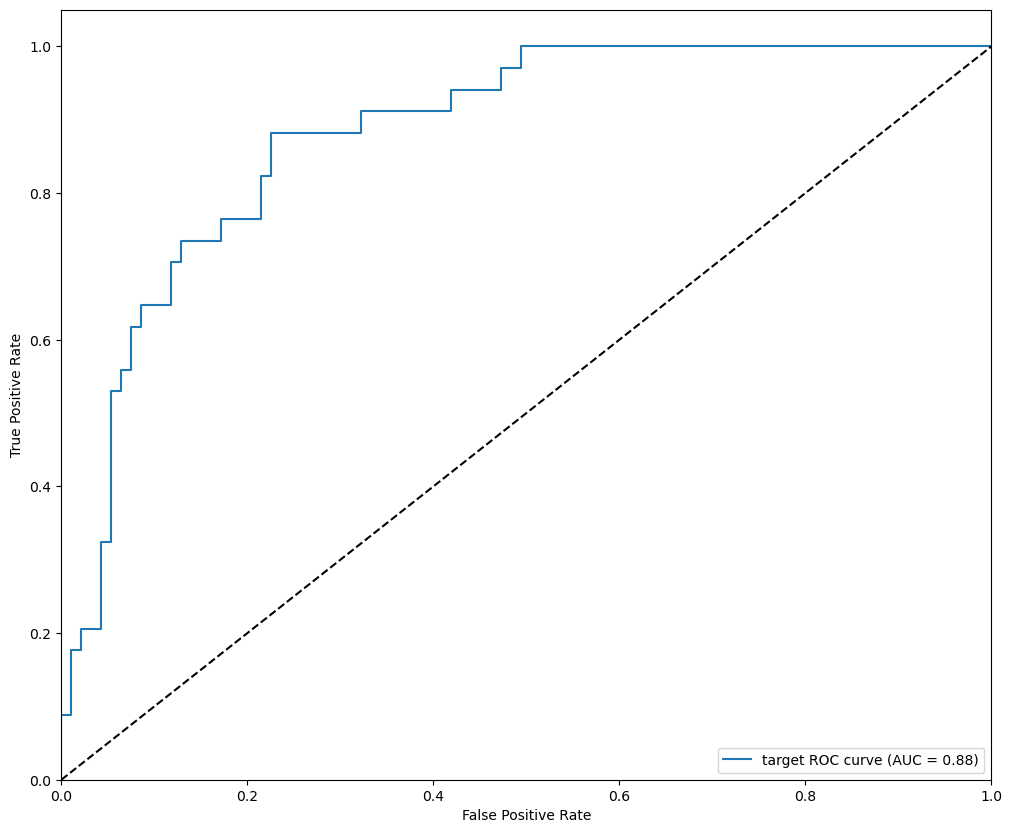

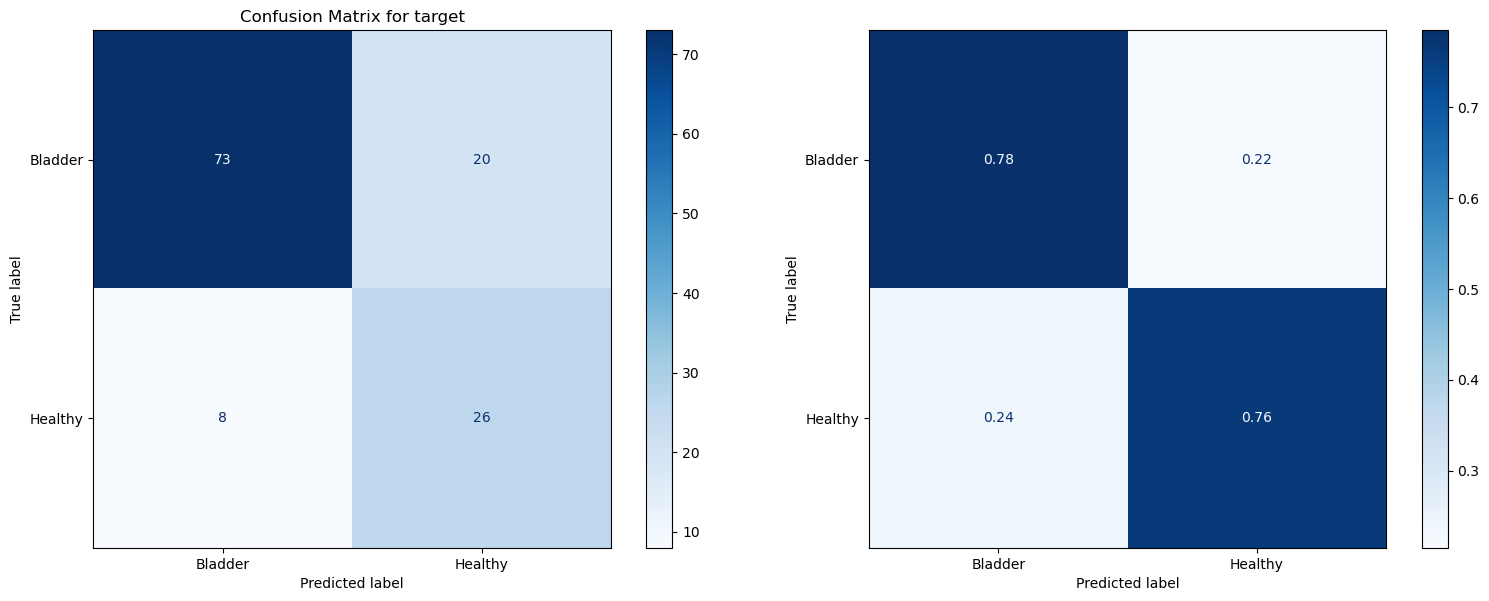

Final model trained on train_df with LOOCV Accuracy: 0.7795


In [79]:
# Combine train and test sets for LOOCV
Ratio_dataset_binary = subset_rows_by_target(Ratio_dataset, target_values)

# Test the train_model_loocv function
Ratio_binary_LOOCV_model, Ratio_binary_LOOCV_accuracy,_ = models.train_model_loocv(Ratio_dataset_binary, target_name='target',model=LogisticRegression(random_state=0, class_weight='balanced'))

# Print the results
print(f"Final model trained on train_df with LOOCV Accuracy: {Ratio_binary_LOOCV_accuracy:.4f}")

In [80]:

# NESTED CV
#EndMotif_binary_nestedCV_model, EndMotif_binary_nestedCV_accuracy = models.train_model_nested_cv(EndMotif_dataset_binary, target_name='target',model=LogisticRegression(random_state=0, class_weight='balanced'), param_grid=param_grid_log_reg)

# Print the results
#print(f"Final model trained on train_df with LOOCV Accuracy: {EndMotif_binary_nestedCV_accuracy:.4f}")

LOOCV Accuracy: 0.8425


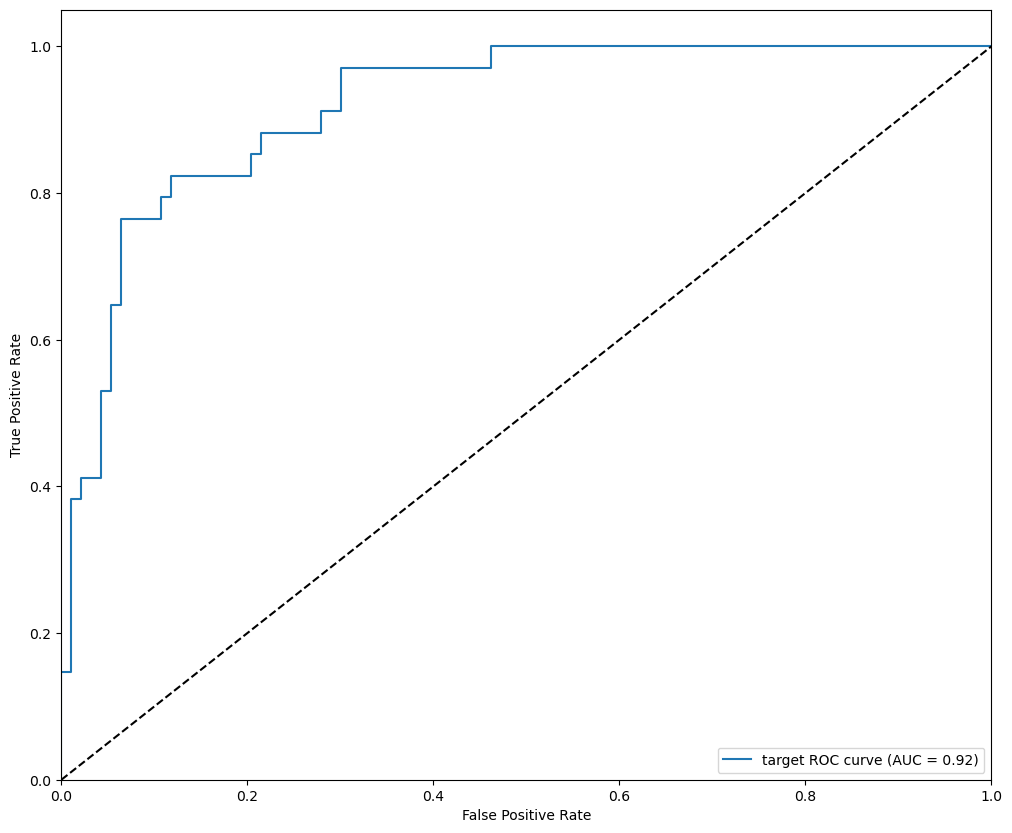

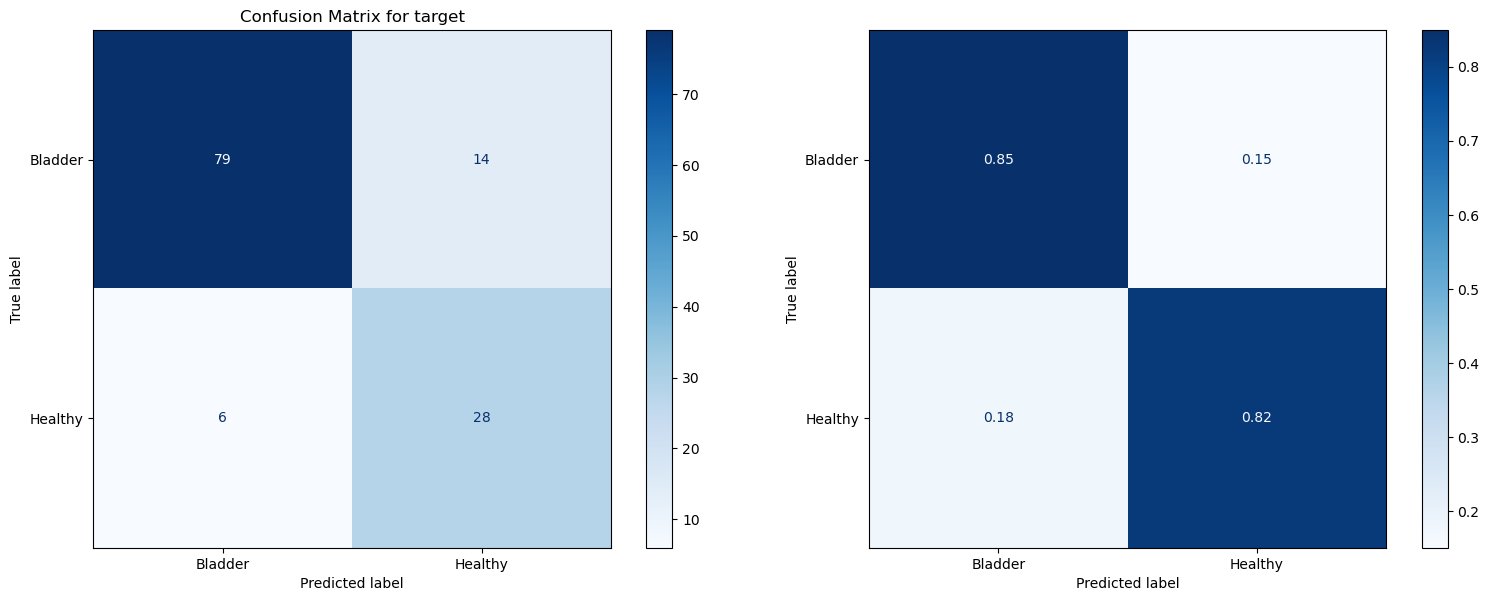

Final model trained on train_df with LOOCV Accuracy: 0.8425


In [81]:
# Combine train and test sets for LOOCV
Arm_dataset_binary = subset_rows_by_target(Arm_df, target_values)

# Test the train_model_loocv function
Arm_binary_LOOCV_model, Arm_binary_LOOCV_accuracy,_ = models.train_model_loocv(Arm_dataset_binary, target_name='target',model=LogisticRegression(random_state=0, class_weight='balanced'))

# Print the results
print(f"Final model trained on train_df with LOOCV Accuracy: {Arm_binary_LOOCV_accuracy:.4f}")

LOOCV Accuracy: 0.6480


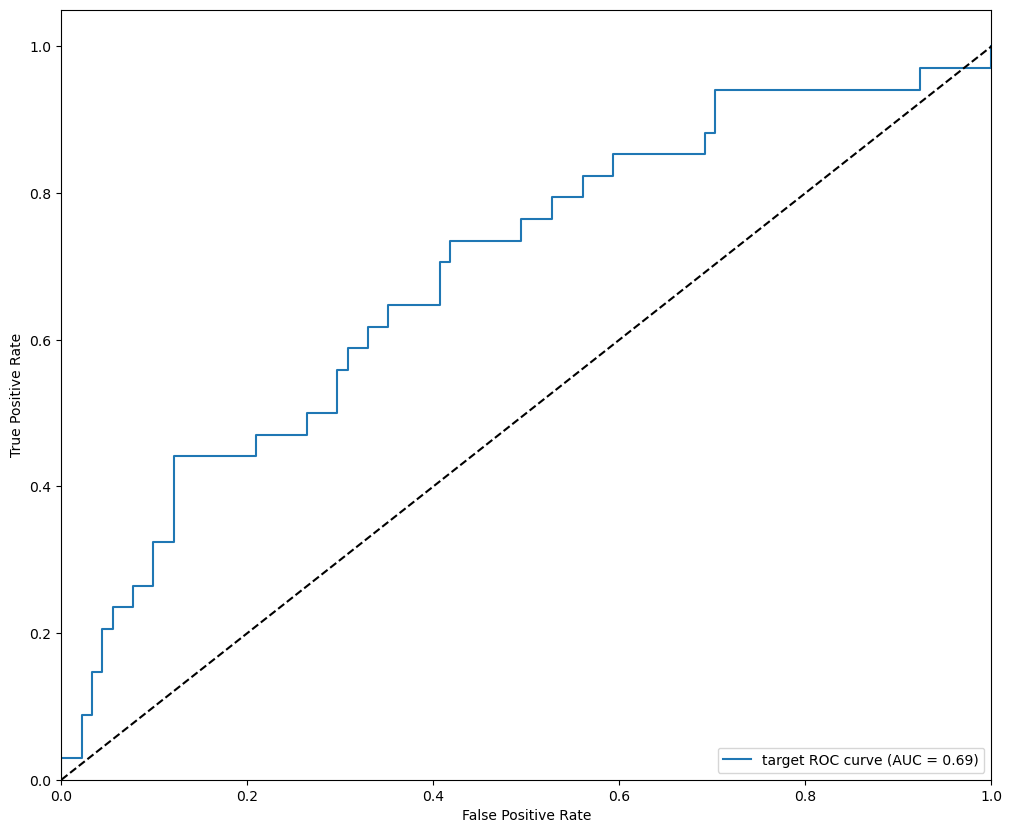

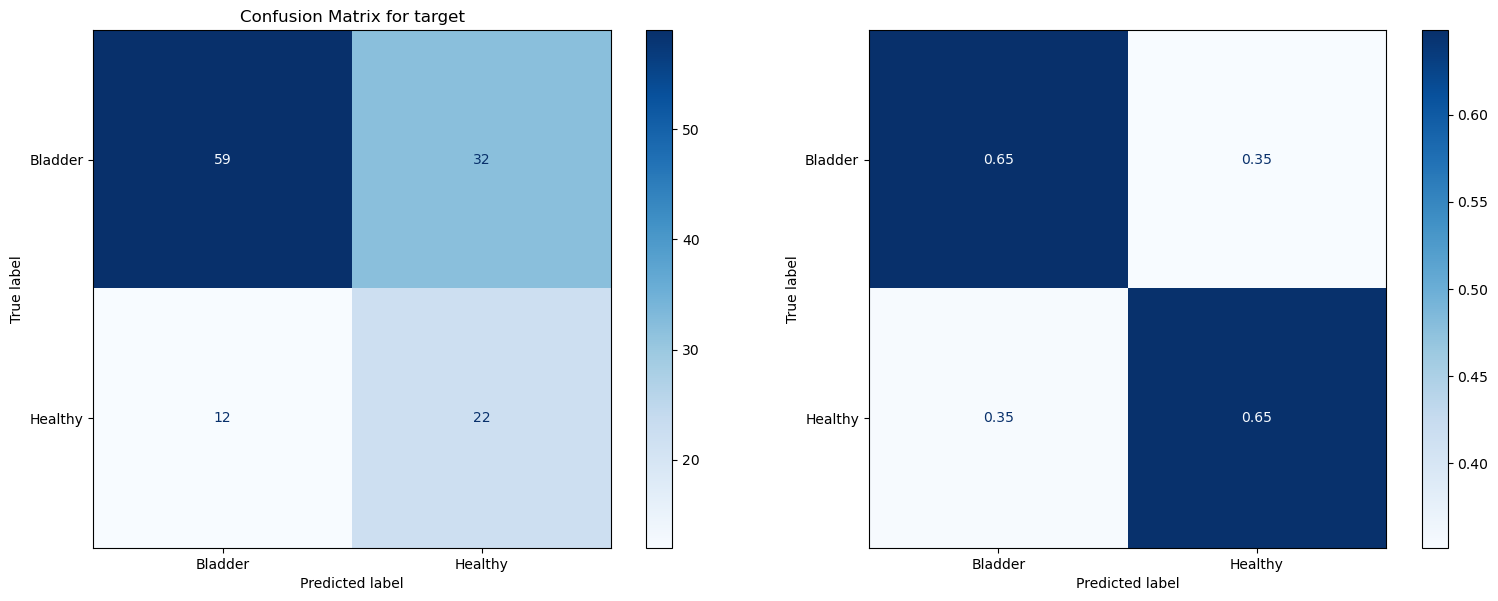

Final model trained on train_df with LOOCV Accuracy: 0.6480


In [82]:
# Combine train and test sets for LOOCV
Methylation_binary = subset_rows_by_target(Methylation, target_values)

# Test the train_model_loocv function
Methylation_binary_LOOCV_model, Methylation_binary_LOOCV_accuracy,_ = models.train_model_loocv(Methylation_binary, target_name='target',model=LogisticRegression(random_state=0, class_weight='balanced'))

# Print the results
print(f"Final model trained on train_df with LOOCV Accuracy: {Methylation_binary_LOOCV_accuracy:.4f}")

In [83]:
import sys
sys.exit()

SystemExit: 

# Biological Significance
## End motif

In [ ]:
EndMotif_feature_importance.head()

In [ ]:
EndMotif_feature_importance.tail()

In [ ]:
#train_df, test_df
train_df.head()

In [ ]:
import Biological_significace as Biosig
import os
import pandas as pd
from statsmodels.stats.multitest import multipletests

def save_plots_and_create_summary(df, feature_df, target_name='target', save_dir=None):
    """
    This function generates and saves box plots for each feature listed in the 'Feature' column of feature_df,
    saves the plots using the plot_feature_boxplot_with_anova function, and creates a summary DataFrame containing
    the F-statistic, p-value, and Benjamini-Hochberg (BH) corrected p-values for each feature.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the features and target.
    feature_df (pd.DataFrame): A DataFrame with a column named 'Feature' listing the features to analyze.
    target_name (str): The name of the target column in df, default is 'target'.
    save_dir (str): The directory where the plots and summary will be saved. This is a required argument.
    
    Returns:
    pd.DataFrame: A DataFrame containing the F-statistic, p-value, and BH-corrected p-value for each feature.
    """
    if not save_dir:
        raise ValueError("The save_dir argument is required.")
    
    # Check if the directory already exists, if so, raise an error
    if os.path.exists(save_dir):
        raise FileExistsError(f"The directory '{save_dir}' already exists. Please choose a different directory or remove it.")
    
    # Create the save directory
    os.makedirs(save_dir)
    
    summary = []
    class_order= ['Bladder','Prostate','RCC','Healthy']
    
    for feature in feature_df['Feature']:
        # Define the save path for each plot
        save_path = os.path.join(save_dir, f"{feature}_boxplot.png")
        
        # Generate and save the plot, and get the F-statistic and p-value
        f_stat, p_value = Biosig.plot_feature_boxplot_with_kruskal(df, feature, target_name=target_name, save_path=save_path, class_order= class_order)
        
        # Append the results to the summary list
        summary.append({
            'Feature': feature,
            'F-statistic': f_stat,
            'p-value': p_value
        })
    
    # Create a summary DataFrame from the list
    summary_df = pd.DataFrame(summary)
    
    # Perform Benjamini-Hochberg correction
    _, bh_corrected_pvals, _, _ = multipletests(summary_df['p-value'], method='fdr_bh')
    
    # Add the BH-corrected p-values to the DataFrame
    summary_df['BH-corrected p-value'] = bh_corrected_pvals
    
    # Save the summary DataFrame as a CSV file in the save directory
    summary_csv_path = os.path.join(save_dir, 'summary.csv')
    summary_df.to_csv(summary_csv_path, index=False)
    
    # Return the summary DataFrame
    return summary_df


In [ ]:

Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_AATA')
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_AATA',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_AGTG',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_CGAA',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_TCTA',class_order= ['Bladder','Prostate','RCC','Healthy'])
Biosig.plot_feature_boxplot_with_anova(train_df, 'EndMotif_TGTG',class_order= ['Bladder','Prostate','RCC','Healthy'])

In [ ]:
EndMotif_Bio = save_plots_and_create_summary(train_df, EndMotif_feature_importance,  save_dir=Output_dir+'/EdMotif_traindf_KruskalWallis/')
display(EndMotif_Bio.head())